# Problem Statement

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

 

For many incumbent operators, retaining high profitable customers is the number one business goal.

 

To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

 

In this project, you will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

 

## Steps to be followed

1. Data Understanding
2. Data Cleaning
3. Filtering High Value Customers
4. Creating target Variable
5. Deriving New Features
6. Handling Missing values
7. Data Visualization-Univariate Analysis
6. Data Visualization- Bivariate Analysis
7. Outlier Detection
8. Data Preparation
9. Data Modeling and Eavlaution
    - Non-Interpretable Models
    - Interpretable Models
10. Conclusion

## **1. Data Understanding**

In [1]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
  color: black !important;
}
</style>

In [2]:
#Importing Data Reading and Processing Libraries
import pandas as pd
import numpy as np

#Imporitng Data Visualization Libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Importing Data Preparation and Modeling Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, GridSearchCV,StratifiedKFold
from sklearn.metrics import accuracy_score, recall_score, classification_report,confusion_matrix,roc_auc_score,roc_curve
from sklearn.decomposition import PCA

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

#Importing Warning Libraries
import warnings
warnings.filterwarnings("ignore")

#Importing Miscellaneous Libraries
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)
pd.set_option('display.width', None)

# Import the StandardScaler()
from sklearn.preprocessing import StandardScaler

#Improting the PCA module
from sklearn.decomposition import PCA

# For Hopkins test
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan

# For clustering 
## using KMeans ##
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

## using Hierarchical ##
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

# Importing required packages for visualization
from IPython.display import Image 
import six
from six import StringIO  
import graphviz
import pydot, graphviz
from sklearn.svm import SVC

# Other sklearn packages
import sklearn.metrics as metrics
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

from datetime import date,datetime
import math
import multiprocessing

In [3]:
#Loading the Dataset

df = pd.read_csv('train.csv')
df.head()

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0   0        109             0.0             0.0             0.0   
1   1        109             0.0             0.0             0.0   
2   2        109             0.0             0.0             0.0   
3   3        109             0.0             0.0             0.0   
4   4        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8   arpu_6  \
0            6/30/2014            7/31/2014            8/31/2014   31.277   
1            6/30/2014            7/31/2014            8/31/2014    0.000   
2            6/30/2014            7/31/2014            8/31/2014   60.806   
3            6/30/2014            7/31/2014            8/31/2014  156.362   
4            6/30/2014            7/31/2014            8/31/2014  240.708   

    arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
0   87.009    7.527        48.58       124.38         1.29         32.24   
1  122.787   42.953         0.00         0.00         0.00          0.00   
2  103.176    0.000         0.53        15.93         0.00         53.99   
3  205.260  111.095         7.26        16.01         0.00         68.76   
4  128.191  101.565        21.28         4.83         6.13         56.99   

   offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0         96.68          2.33           0.00            0.0            0.0   
1         25.99         30.89           0.00            0.0            0.0   
2         82.05          0.00           0.00            0.0            0.0   
3         78.48         50.23           0.00            0.0            0.0   
4         38.11          9.63          53.64            0.0            0.0   

   roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
0           0.00            0.0           0.00              2.23   
1           0.00            0.0           0.00              0.00   
2           0.00            0.0           0.00              0.53   
3           0.00            0.0           1.63              6.99   
4          15.73            0.0           0.00             10.16   

   loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
0              0.00              0.28              5.29             16.04   
1              0.00              0.00              0.00              0.00   
2             12.98              0.00             24.11              0.00   
3              3.94              0.00             37.91             44.89   
4              4.83              6.13             36.74             19.88   

   loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
0              2.33              0.00              0.00              0.00   
1              0.00              0.00              0.00              0.00   
2              0.00              0.00              0.00              0.00   
3             23.63              0.00              0.00              0.00   
4              4.61             11.99              1.23              5.01   

   loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
0              0.00              0.00              0.00          7.53   
1              0.00             22.01             29.79          0.00   
2              2.14              0.00              0.00         24.64   
3              0.00              0.00              8.03         44.91   
4              0.00              9.85              0.00         58.91   

   loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
0         16.04          2.61             46.34            124.38   
1          0.00          0.00              0.00              0.00   
2         12.98          0.00              0.00              2.94   
3         48.84         23.63              0.26             12.06   
4         25.94         15.76              0.00              0.00   

   std_og_t2t_mo

In [4]:
df.shape

(69999, 172)

In [5]:
df.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 172 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    id                        int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    arpu_6                    float64
 9    arpu_7                    float64
 10   arpu_8                    float64
 11   onnet_mou_6               float64
 12   onnet_mou_7               float64
 13   onnet_mou_8               float64
 14   offnet_mou_6              float64
 15   offnet_mou_7              float64
 16   offnet_mou_8              float64
 17   roam_ic_mou_6             float64
 18   roam_ic_mou_7             float64
 19   roam_ic_mou_8             float64
 20   roam

In [6]:
#Lets check how the data is spread
df.describe()

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count  69999.000000    69999.0         69297.0         69297.0   
mean   34999.000000      109.0             0.0             0.0   
std    20207.115084        0.0             0.0             0.0   
min        0.000000      109.0             0.0             0.0   
25%    17499.500000      109.0             0.0             0.0   
50%    34999.000000      109.0             0.0             0.0   
75%    52498.500000      109.0             0.0             0.0   
max    69998.000000      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8   onnet_mou_6  \
count         69297.0  69999.000000  69999.000000  69999.000000  67231.000000   
mean              0.0    283.134365    278.185912    278.858826    133.153275   
std               0.0    334.213918    344.366927    351.924315    299.963093   
min               0.0  -2258.709000  -1289.715000   -945.808000      0.000000   
25%               0.0     93.581000     86.714000     84.095000      7.410000   
50%               0.0    197.484000    191.588000    192.234000     34.110000   
75%               0.0    370.791000    365.369500    369.909000    119.390000   
max               0.0  27731.088000  35145.834000  33543.624000   7376.710000   

        onnet_mou_7   onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
count  67312.000000  66296.000000  67231.000000  67312.000000  66296.000000   
mean     133.894438    132.978257    198.874771    197.153383    196.543577   
std      311.277193    311.896596    316.818355    322.482226    324.089234   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        6.675000      6.410000     34.860000     32.240000     31.575000   
50%       32.280000     32.100000     96.480000     91.885000     91.800000   
75%      115.837500    115.060000    232.990000    227.630000    229.345000   
max     8157.780000  10752.560000   8362.360000   7043.980000  14007.340000   

       roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  \
count   67231.000000   67312.000000   66296.000000   67231.000000   
mean        9.765435       7.014568       7.004892      14.186457   
std        57.374429      55.960985      53.408135      73.469261   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max      2850.980000    4155.830000    4169.810000    3775.110000   

       roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   67312.000000   66296.000000      67231.000000      67312.000000   
mean        9.842191       9.771783         46.904854         46.166503   
std        58.511894      64.618388        150.971758        154.739002   
min         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          1.660000          1.650000   
50%         0.000000       0.000000         11.910000         11.580000   
75%         0.000000       0.000000         40.740000         39.760000   
max      2812.040000    5337.040000       6431.330000       7400.660000   

       loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  \
count      66296.000000      67231.000000      67312.000000      66296.000000   
mean          45.686109         93.238231         90.799240         91.121447   
std          153.716880        162.046699        153.852597        152.997805   
min            0.000000          0.000000          0.000000          0.000000   
25%            1.610000          9.920000         10.090000          9.830000   
50%           11.740000         41.030000         40.170000         40.350000   
75%           39.895000        110.430000        107.540000        109.245000   
max        10752.560000       4696

In [7]:
df['circle_id'].unique()

array([109], dtype=int64)

In [8]:
X = df.drop(['circle_id'],1).iloc[:,:-1]
y = df.iloc[:,-1]

X.shape, y.shape

((69999, 170), (69999,))

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((55999, 170), (14000, 170), (55999,), (14000,))

In [10]:
df = X_train

In [11]:
df.head()

id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
65322  65322             0.0             0.0             0.0   
60877  60877             0.0             0.0             0.0   
31092  31092             0.0             0.0             0.0   
6975    6975             0.0             0.0             0.0   
66150  66150             0.0             0.0             0.0   

      last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
65322            6/30/2014            7/31/2014            8/31/2014   
60877            6/30/2014            7/31/2014            8/31/2014   
31092            6/30/2014            7/31/2014            8/31/2014   
6975             6/30/2014            7/31/2014            8/31/2014   
66150            6/30/2014            7/31/2014            8/31/2014   

         arpu_6   arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
65322  1095.527  912.776  199.711        92.51        43.99         3.01   
60877   486.841  385.488    9.310       790.73       535.53        17.34   
31092   218.836  299.707  161.408        39.48        73.76        17.61   
6975      0.000    0.000  324.948          NaN          NaN       124.63   
66150   136.903  165.826  136.412        34.54        58.59        32.14   

       offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
65322       2646.76       2318.66        410.53            0.0           0.00   
60877         28.98         15.21          4.98            0.0           1.56   
31092        180.61        233.23        124.89            0.0           0.00   
6975            NaN           NaN        364.04            NaN            NaN   
66150         85.33         94.39        102.98            0.0           0.00   

       roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
65322           0.00            0.0           0.00          31.64   
60877           0.69            0.0           3.94          22.33   
31092           3.11            0.0           0.00          21.78   
6975            0.00            NaN            NaN           0.55   
66150           0.00            0.0           0.00           0.00   

       loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
65322             13.13              2.13              2.58            105.04   
60877             59.66             15.93              0.00             28.98   
31092              0.00              0.00              0.00              2.43   
6975                NaN               NaN             22.91               NaN   
66150             34.54             58.59             32.14             85.33   

       loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
65322             47.48              4.68               0.0               0.0   
60877             10.33              0.00               0.0               0.0   
31092             10.21             18.06               0.0               0.0   
6975                NaN             22.48               NaN               NaN   
66150             94.39            100.53               0.0               0.0   

       loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
65322              0.00               0.0               0.0              0.00   
60877              0.00               0.0               0.0              0.48   
31092              0.00               0.0               0.0              0.00   
6975               0.00               NaN               NaN              0.00   
66150              0.63               0.0               0.0              1.81   

       loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
65322        118.18         49.61          7.26             79.38   
60877         88.64         26.26          0.00            731.06   
31092          2.43         10.21         18.06             39.48   
6975            NaN           NaN         45.39               NaN   
66150        119.88        

##  2.**Data cleaning**

In [12]:
# There are some columns representing volume based users have month specified in their name, while all other columns have used numbers `6,7,8,9` indicating month name
month = ['aug_vbc_3g','jul_vbc_3g','jun_vbc_3g','sep_vbc_3g']
df = df.rename(columns = {'aug_vbc_3g':'3g_vbc_8','jul_vbc_3g':'3g_vbc_7','jun_vbc_3g':'3g_vbc_6','sep_vbc_3g':'3g_vbc_9'})


In [13]:
# Converting the date columns to date time format

date_col= [col for col in df.columns if 'date' in col]

for i in df[date_col]:
    df[i] = pd.to_datetime(df[i])


Columns that have just one unique value for all the customers do not really imply anything. Hence removing columns with zero variance from our dataset.

In [14]:
# Dropping columns that have only one unique values for all the leads.
cols = []
for i in df.columns:
    if df[i].nunique() ==1:
        cols.append(i)
df = df.drop(cols,1)
df.head()

id    arpu_6   arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  \
65322  65322  1095.527  912.776  199.711        92.51        43.99   
60877  60877   486.841  385.488    9.310       790.73       535.53   
31092  31092   218.836  299.707  161.408        39.48        73.76   
6975    6975     0.000    0.000  324.948          NaN          NaN   
66150  66150   136.903  165.826  136.412        34.54        58.59   

       onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
65322         3.01       2646.76       2318.66        410.53            0.0   
60877        17.34         28.98         15.21          4.98            0.0   
31092        17.61        180.61        233.23        124.89            0.0   
6975        124.63           NaN           NaN        364.04            NaN   
66150        32.14         85.33         94.39        102.98            0.0   

       roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  \
65322           0.00           0.00            0.0           0.00   
60877           1.56           0.69            0.0           3.94   
31092           0.00           3.11            0.0           0.00   
6975             NaN           0.00            NaN            NaN   
66150           0.00           0.00            0.0           0.00   

       roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  \
65322          31.64             13.13              2.13              2.58   
60877          22.33             59.66             15.93              0.00   
31092          21.78              0.00              0.00              0.00   
6975            0.55               NaN               NaN             22.91   
66150           0.00             34.54             58.59             32.14   

       loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  \
65322            105.04             47.48              4.68               0.0   
60877             28.98             10.33              0.00               0.0   
31092              2.43             10.21             18.06               0.0   
6975                NaN               NaN             22.48               NaN   
66150             85.33             94.39            100.53               0.0   

       loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  \
65322               0.0              0.00               0.0               0.0   
60877               0.0              0.00               0.0               0.0   
31092               0.0              0.00               0.0               0.0   
6975                NaN              0.00               NaN               NaN   
66150               0.0              0.63               0.0               0.0   

       loc_og_t2c_mou_8  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  \
65322              0.00        118.18         49.61          7.26   
60877              0.48         88.64         26.26          0.00   
31092              0.00          2.43         10.21         18.06   
6975               0.00           NaN           NaN         45.39   
66150              1.81        119.88        152.99        133.31   

       std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  \
65322             79.38             41.86              0.00           2541.71   
60877            731.06            515.64              0.00              0.00   
31092             39.48             73.76             13.73            178.14   
6975                NaN               NaN            101.71               NaN   
66150              0.00              0.00              0.00              0.00   

       std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  \
65322           2271.18            374.63               0.0               0.0   
60877              3.11              0.00               0.0               0.0   
31092            222.98             88.93               0.0               0.0   
6975                NaN       

In [15]:
df.shape

(55999, 158)

Let us check if there are any categorical columns in our dataset. We can check that by finding if any columns have just 2 unique values `1` & `0`. These values analogous to `yes` & `no` respectively.

In [16]:
# Let us create a seperate category for categorical columns
cat_cols = []

for i in df.columns:
    if df[i].nunique()==2:
        cat_cols.append(i)
cat_cols 

['night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'fb_user_6',
 'fb_user_7',
 'fb_user_8']

- ### Sachet recharge
`sachet recharge` are Service schemes with validity smaller than a month. This means that the days of recahrge in sachet recharge should be less than 30. Any service schemes beyond 29 days should mean that the client has done a monyhly recharge or the entry is wrong. Let us `cap the values beyond 29 days` by the highest number of days recharge below 30 days.

In [17]:
df['sachet_2g_6'] = df['sachet_2g_6'].clip(0,28)
df['sachet_2g_7'] = df['sachet_2g_7'].clip(0,29)
df['sachet_2g_8'] = df['sachet_2g_8'].clip(0,29)
df['sachet_3g_7'] = df['sachet_3g_7'].clip(0,24)
df['sachet_3g_8'] = df['sachet_3g_8'].clip(0,29)

In [18]:
df.shape

(55999, 158)

In [19]:
df.head()

id    arpu_6   arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  \
65322  65322  1095.527  912.776  199.711        92.51        43.99   
60877  60877   486.841  385.488    9.310       790.73       535.53   
31092  31092   218.836  299.707  161.408        39.48        73.76   
6975    6975     0.000    0.000  324.948          NaN          NaN   
66150  66150   136.903  165.826  136.412        34.54        58.59   

       onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
65322         3.01       2646.76       2318.66        410.53            0.0   
60877        17.34         28.98         15.21          4.98            0.0   
31092        17.61        180.61        233.23        124.89            0.0   
6975        124.63           NaN           NaN        364.04            NaN   
66150        32.14         85.33         94.39        102.98            0.0   

       roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  \
65322           0.00           0.00            0.0           0.00   
60877           1.56           0.69            0.0           3.94   
31092           0.00           3.11            0.0           0.00   
6975             NaN           0.00            NaN            NaN   
66150           0.00           0.00            0.0           0.00   

       roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  \
65322          31.64             13.13              2.13              2.58   
60877          22.33             59.66             15.93              0.00   
31092          21.78              0.00              0.00              0.00   
6975            0.55               NaN               NaN             22.91   
66150           0.00             34.54             58.59             32.14   

       loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  \
65322            105.04             47.48              4.68               0.0   
60877             28.98             10.33              0.00               0.0   
31092              2.43             10.21             18.06               0.0   
6975                NaN               NaN             22.48               NaN   
66150             85.33             94.39            100.53               0.0   

       loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  \
65322               0.0              0.00               0.0               0.0   
60877               0.0              0.00               0.0               0.0   
31092               0.0              0.00               0.0               0.0   
6975                NaN              0.00               NaN               NaN   
66150               0.0              0.63               0.0               0.0   

       loc_og_t2c_mou_8  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  \
65322              0.00        118.18         49.61          7.26   
60877              0.48         88.64         26.26          0.00   
31092              0.00          2.43         10.21         18.06   
6975               0.00           NaN           NaN         45.39   
66150              1.81        119.88        152.99        133.31   

       std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  \
65322             79.38             41.86              0.00           2541.71   
60877            731.06            515.64              0.00              0.00   
31092             39.48             73.76             13.73            178.14   
6975                NaN               NaN            101.71               NaN   
66150              0.00              0.00              0.00              0.00   

       std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  \
65322           2271.18            374.63               0.0               0.0   
60877              3.11              0.00               0.0               0.0   
31092            222.98             88.93               0.0               0.0   
6975                NaN       

In [20]:
# Now Checking Null values
null = round(100*(df.isnull().sum()/len(df.index)),2).sort_values(ascending = False)
null = null[null!=0]
null

count_rech_3g_6             74.97
max_rech_data_6             74.97
arpu_2g_6                   74.97
arpu_3g_6                   74.97
count_rech_2g_6             74.97
av_rech_amt_data_6          74.97
total_rech_data_6           74.97
fb_user_6                   74.97
night_pck_user_6            74.97
date_of_last_rech_data_6    74.97
count_rech_2g_7             74.53
night_pck_user_7            74.53
av_rech_amt_data_7          74.53
max_rech_data_7             74.53
arpu_3g_7                   74.53
count_rech_3g_7             74.53
total_rech_data_7           74.53
fb_user_7                   74.53
arpu_2g_7                   74.53
date_of_last_rech_data_7    74.53
fb_user_8                   73.74
max_rech_data_8             73.74
date_of_last_rech_data_8    73.74
night_pck_user_8            73.74
total_rech_data_8           73.74
count_rech_2g_8             73.74
arpu_2g_8                   73.74
arpu_3g_8                   73.74
av_rech_amt_data_8          73.74
count_rech_3g_

  ### b) Imputation of missing values

 - #### Recharge columns in Good and Action Phase

In [21]:
# Let us observe missing values in recharge columns 
rech_col = [i for i in df.columns if 'rech' in i]
rech_6_col = [i for i in rech_col if '6' in i]
rech_7_col = [i for i in rech_col if '7' in i]
rech_8_col = [i for i in rech_col if '8' in i]

`Recharge columns for month- 6(June)`

In [22]:
# Let us observe missing values in recharge columns in the month of june(6)
rech_6 = pd.DataFrame(df[rech_6_col])

# adding some other columns describing data usage of customer in june(6)
vol_col = df[["vol_2g_mb_6",'vol_3g_mb_6']]

rech_6 = pd.concat([rech_6,vol_col], axis = 1) 
rech_6.head(10)

total_rech_num_6  total_rech_amt_6  max_rech_amt_6 date_of_last_rech_6  \
65322                17              1254             110          2014-06-29   
60877                18               576              50          2014-06-29   
31092                 9               250              50          2014-06-27   
6975                  2                 0               0          2014-06-17   
66150                10               150              30          2014-06-29   
9407                  3                20              20          2014-06-15   
49822                 3                50              50          2014-06-12   
57079                 9               222              44          2014-06-25   
42273                 3                20              20          2014-06-12   
45882                 5               120              30          2014-06-27   

      date_of_last_rech_data_6  total_rech_data_6  max_rech_data_6  \
65322               2014-06-04                1.0             17.0   
60877                      NaT                NaN              NaN   
31092                      NaT                NaN              NaN   
6975                       NaT                NaN              NaN   
66150                      NaT                NaN              NaN   
9407                       NaT                NaN              NaN   
49822                      NaT                NaN              NaN   
57079               2014-06-14                1.0             23.0   
42273                      NaT                NaN              NaN   
45882                      NaT                NaN              NaN   

       count_rech_2g_6  count_rech_3g_6  av_rech_amt_data_6  vol_2g_mb_6  \
65322              1.0              0.0                17.0        76.18   
60877              NaN              NaN                 NaN         0.00   
31092              NaN              NaN                 NaN         0.00   
6975               NaN              NaN                 NaN         0.00   
66150              NaN              NaN                 NaN         0.00   
9407               NaN              NaN                 NaN         0.00   
49822              NaN              NaN                 NaN         0.00   
57079              1.0              0.0                23.0         0.00   
42273              NaN              NaN                 NaN         0.00   
45882              NaN              NaN                 NaN         0.00   

       vol_3g_mb_6  
65322          0.0  
60877          0.0  
31092          0.0  
6975           0.0  
66150          0.0  
9407           0.0  
49822          0.0  
57079          0.0  
42273          0.0  
45882          0.0

`Recharge columns for month- 7(July)`

In [23]:
# Similarly Let us observe missing values in recharge columns for the month of july(7)

rech_7_col

['total_rech_num_7',
 'total_rech_amt_7',
 'max_rech_amt_7',
 'date_of_last_rech_7',
 'date_of_last_rech_data_7',
 'total_rech_data_7',
 'max_rech_data_7',
 'count_rech_2g_7',
 'count_rech_3g_7',
 'av_rech_amt_data_7']

In [24]:
rech_7 = pd.DataFrame(df[rech_7_col])

# adding some other columns describing data usage of customer in july
vol_col = df[["vol_2g_mb_7",'vol_3g_mb_7']]

rech_7 = pd.concat([rech_7,vol_col], axis = 1) 
rech_7.head(10)

total_rech_num_7  total_rech_amt_7  max_rech_amt_7 date_of_last_rech_7  \
65322                16              1126             130          2014-07-31   
60877                18               445              50          2014-07-25   
31092                12               340              50          2014-07-31   
6975                  1                 0               0          2014-07-06   
66150                13               190              20          2014-07-31   
9407                  4                40              20          2014-07-18   
49822                12               310              50          2014-07-31   
57079                 7               150              30          2014-07-31   
42273                27               426              36          2014-07-29   
45882                 5               110              30          2014-07-29   

      date_of_last_rech_data_7  total_rech_data_7  max_rech_data_7  \
65322                      NaT                NaN              NaN   
60877               2014-07-04                1.0             25.0   
31092                      NaT                NaN              NaN   
6975                       NaT                NaN              NaN   
66150                      NaT                NaN              NaN   
9407                       NaT                NaN              NaN   
49822                      NaT                NaN              NaN   
57079                      NaT                NaN              NaN   
42273                      NaT                NaN              NaN   
45882                      NaT                NaN              NaN   

       count_rech_2g_7  count_rech_3g_7  av_rech_amt_data_7  vol_2g_mb_7  \
65322              NaN              NaN                 NaN         0.00   
60877              1.0              0.0                25.0       110.28   
31092              NaN              NaN                 NaN         0.00   
6975               NaN              NaN                 NaN         0.00   
66150              NaN              NaN                 NaN         0.00   
9407               NaN              NaN                 NaN         0.00   
49822              NaN              NaN                 NaN         0.00   
57079              NaN              NaN                 NaN         0.00   
42273              NaN              NaN                 NaN         0.00   
45882              NaN              NaN                 NaN         0.00   

       vol_3g_mb_7  
65322          0.0  
60877          0.0  
31092          0.0  
6975           0.0  
66150          0.0  
9407           0.0  
49822          0.0  
57079          0.0  
42273          0.0  
45882          0.0

`Recharge columns for month- 8(August)`

In [25]:
# Similarly Let us observe missing values in recharge columns in the month of August(8)

rech_8_col

['total_rech_num_8',
 'total_rech_amt_8',
 'max_rech_amt_8',
 'date_of_last_rech_8',
 'date_of_last_rech_data_8',
 'total_rech_data_8',
 'max_rech_data_8',
 'count_rech_2g_8',
 'count_rech_3g_8',
 'av_rech_amt_data_8']

In [26]:
rech_8 = pd.DataFrame(df[rech_8_col])

# adding some other columns describing data usage of customer in August
vol_col = df[["vol_2g_mb_8",'vol_3g_mb_8']]

rech_8 = pd.concat([rech_8,vol_col], axis = 1) 
rech_8.head(10)

total_rech_num_8  total_rech_amt_8  max_rech_amt_8 date_of_last_rech_8  \
65322                 6               160             130          2014-08-26   
60877                 1                 0               0          2014-08-06   
31092                 7               185              65          2014-08-20   
6975                  8               396             130          2014-08-31   
66150                 8               150              30          2014-08-27   
9407                  6                90              30          2014-08-28   
49822                13               200              30          2014-08-30   
57079                 9               398             128          2014-08-29   
42273                 5               295             154          2014-08-07   
45882                 4               120              30          2014-08-28   

      date_of_last_rech_data_8  total_rech_data_8  max_rech_data_8  \
65322                      NaT                NaN              NaN   
60877                      NaT                NaN              NaN   
31092                      NaT                NaN              NaN   
6975                       NaT                NaN              NaN   
66150                      NaT                NaN              NaN   
9407                       NaT                NaN              NaN   
49822                      NaT                NaN              NaN   
57079                      NaT                NaN              NaN   
42273               2014-08-07                2.0            154.0   
45882                      NaT                NaN              NaN   

       count_rech_2g_8  count_rech_3g_8  av_rech_amt_data_8  vol_2g_mb_8  \
65322              NaN              NaN                 NaN         0.00   
60877              NaN              NaN                 NaN         0.00   
31092              NaN              NaN                 NaN         0.00   
6975               NaN              NaN                 NaN         0.00   
66150              NaN              NaN                 NaN         0.00   
9407               NaN              NaN                 NaN         0.00   
49822              NaN              NaN                 NaN         0.00   
57079              NaN              NaN                 NaN         0.00   
42273              1.0              1.0               255.0       364.35   
45882              NaN              NaN                 NaN         0.00   

       vol_3g_mb_8  
65322         0.00  
60877         0.00  
31092         0.00  
6975          0.00  
66150         0.00  
9407          0.00  
49822         0.00  
57079         0.00  
42273      1025.83  
45882         0.00

In [27]:
df.head()

id    arpu_6   arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  \
65322  65322  1095.527  912.776  199.711        92.51        43.99   
60877  60877   486.841  385.488    9.310       790.73       535.53   
31092  31092   218.836  299.707  161.408        39.48        73.76   
6975    6975     0.000    0.000  324.948          NaN          NaN   
66150  66150   136.903  165.826  136.412        34.54        58.59   

       onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
65322         3.01       2646.76       2318.66        410.53            0.0   
60877        17.34         28.98         15.21          4.98            0.0   
31092        17.61        180.61        233.23        124.89            0.0   
6975        124.63           NaN           NaN        364.04            NaN   
66150        32.14         85.33         94.39        102.98            0.0   

       roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  \
65322           0.00           0.00            0.0           0.00   
60877           1.56           0.69            0.0           3.94   
31092           0.00           3.11            0.0           0.00   
6975             NaN           0.00            NaN            NaN   
66150           0.00           0.00            0.0           0.00   

       roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  \
65322          31.64             13.13              2.13              2.58   
60877          22.33             59.66             15.93              0.00   
31092          21.78              0.00              0.00              0.00   
6975            0.55               NaN               NaN             22.91   
66150           0.00             34.54             58.59             32.14   

       loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  \
65322            105.04             47.48              4.68               0.0   
60877             28.98             10.33              0.00               0.0   
31092              2.43             10.21             18.06               0.0   
6975                NaN               NaN             22.48               NaN   
66150             85.33             94.39            100.53               0.0   

       loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  \
65322               0.0              0.00               0.0               0.0   
60877               0.0              0.00               0.0               0.0   
31092               0.0              0.00               0.0               0.0   
6975                NaN              0.00               NaN               NaN   
66150               0.0              0.63               0.0               0.0   

       loc_og_t2c_mou_8  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  \
65322              0.00        118.18         49.61          7.26   
60877              0.48         88.64         26.26          0.00   
31092              0.00          2.43         10.21         18.06   
6975               0.00           NaN           NaN         45.39   
66150              1.81        119.88        152.99        133.31   

       std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  \
65322             79.38             41.86              0.00           2541.71   
60877            731.06            515.64              0.00              0.00   
31092             39.48             73.76             13.73            178.14   
6975                NaN               NaN            101.71               NaN   
66150              0.00              0.00              0.00              0.00   

       std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  \
65322           2271.18            374.63               0.0               0.0   
60877              3.11              0.00               0.0               0.0   
31092            222.98             88.93               0.0               0.0   
6975                NaN       

In [28]:
# Now Checking Null values
null = round(100*(df.isnull().sum()/len(df.index)),2).sort_values(ascending = False)
null = null[null!=0]
null

count_rech_3g_6             74.97
max_rech_data_6             74.97
arpu_2g_6                   74.97
arpu_3g_6                   74.97
count_rech_2g_6             74.97
av_rech_amt_data_6          74.97
total_rech_data_6           74.97
fb_user_6                   74.97
night_pck_user_6            74.97
date_of_last_rech_data_6    74.97
count_rech_2g_7             74.53
night_pck_user_7            74.53
av_rech_amt_data_7          74.53
max_rech_data_7             74.53
arpu_3g_7                   74.53
count_rech_3g_7             74.53
total_rech_data_7           74.53
fb_user_7                   74.53
arpu_2g_7                   74.53
date_of_last_rech_data_7    74.53
fb_user_8                   73.74
max_rech_data_8             73.74
date_of_last_rech_data_8    73.74
night_pck_user_8            73.74
total_rech_data_8           73.74
count_rech_2g_8             73.74
arpu_2g_8                   73.74
arpu_3g_8                   73.74
av_rech_amt_data_8          73.74
count_rech_3g_

 - #### Imputing Categorical columns

In [29]:
# Let us impute the missing values in categorical columns by (-1). 
df[cat_cols] = df[cat_cols].apply(lambda x: x.fillna(-1)) 
df[cat_cols] = df[cat_cols].astype('str')
df[cat_cols].head()

night_pck_user_6 night_pck_user_7 night_pck_user_8 fb_user_6 fb_user_7  \
65322              0.0             -1.0             -1.0       1.0      -1.0   
60877             -1.0              0.0             -1.0      -1.0       1.0   
31092             -1.0             -1.0             -1.0      -1.0      -1.0   
6975              -1.0             -1.0             -1.0      -1.0      -1.0   
66150             -1.0             -1.0             -1.0      -1.0      -1.0   

      fb_user_8  
65322      -1.0  
60877      -1.0  
31092      -1.0  
6975       -1.0  
66150      -1.0

In [30]:
# Now Checking Null values
null = round(100*(df.isnull().sum()/len(df.index)),2).sort_values(ascending = False)
null = null[null!=0]
null

max_rech_data_6             74.97
arpu_3g_6                   74.97
date_of_last_rech_data_6    74.97
arpu_2g_6                   74.97
count_rech_3g_6             74.97
av_rech_amt_data_6          74.97
total_rech_data_6           74.97
count_rech_2g_6             74.97
count_rech_2g_7             74.53
av_rech_amt_data_7          74.53
max_rech_data_7             74.53
arpu_3g_7                   74.53
total_rech_data_7           74.53
arpu_2g_7                   74.53
date_of_last_rech_data_7    74.53
count_rech_3g_7             74.53
count_rech_3g_8             73.74
max_rech_data_8             73.74
total_rech_data_8           73.74
date_of_last_rech_data_8    73.74
count_rech_2g_8             73.74
arpu_2g_8                   73.74
arpu_3g_8                   73.74
av_rech_amt_data_8          73.74
loc_ic_t2f_mou_8             5.29
roam_ic_mou_8                5.29
std_og_mou_8                 5.29
isd_og_mou_8                 5.29
offnet_mou_8                 5.29
spl_og_mou_8  

- ### Dropping columns with missing values more than 40%

The average revenue per user for both the phases - good & action phase, have more than 40% missing values. Since our study revolves around the identification of customers that are likely to churn taking into account only usage based churn, we can safely drop these columns without affecting our study.

In [31]:
miss = round(100*(df.isnull().sum()/len(df.index)),2).sort_values(ascending = False) 

# Let us not delete data from 9th month
miss = pd.DataFrame(miss[miss >= 40])
threshold_col = miss.index

df = df.drop(threshold_col,1)

In [32]:
df.shape

(55999, 134)

 - #### Let us observe outgoing minutes of usage for local, standard, special and others

`month-june(6)`

In [33]:
# From the business domain knowledge, we know that total_og column is the addition of local , standard, special andd other outgoing calls
og_call_6 = ['loc_og_mou_6','std_og_mou_6','isd_og_mou_6','spl_og_mou_6','og_others_6','total_og_mou_6']
total_og_6 = df[og_call_6]
# filtering only those clients who have made no outgoing calls
total_og_6.loc[total_og_6['total_og_mou_6']==0].head()

loc_og_mou_6  std_og_mou_6  isd_og_mou_6  spl_og_mou_6  og_others_6  \
6975            NaN           NaN           NaN           NaN          NaN   
57370           0.0           0.0           0.0           0.0          0.0   
11250           NaN           NaN           NaN           NaN          NaN   
57441           0.0           0.0           0.0           0.0          0.0   
59489           NaN           NaN           NaN           NaN          NaN   

       total_og_mou_6  
6975              0.0  
57370             0.0  
11250             0.0  
57441             0.0  
59489             0.0

In [34]:
#Lets verify is our assumption right or not, sum of all outgoing calls is equal to the the tota_og_mou_6

df['outgoing_total_6'] = df['loc_og_mou_6']+ df['std_og_mou_6']+df['isd_og_mou_6']+df['spl_og_mou_6']+df['og_others_6']
df[['outgoing_total_6','total_og_mou_6']].dropna().corr()

outgoing_total_6  total_og_mou_6
outgoing_total_6               1.0             1.0
total_og_mou_6                 1.0             1.0

From above we can clearly see that these are correlated and hence when the total outgoing calls are zero, no outgoing calls have been made in that month. We can impute the missing values in the columns of local outgoing calls, standard outgoing calls, special outgoing calls & other outgoing calls by 0.

In [35]:
# Imputing by '0'
df[og_call_6] = df[og_call_6].fillna(0)

From the dataset, it is evident that local outgoing calls in `any month` are equal to the `sum of all the types of local outgoing calls` i.e. (T2T,T2M,T2F & T2C)

In [36]:
og_loc_6 = ['loc_og_t2t_mou_6','loc_og_t2m_mou_6','loc_og_t2f_mou_6','loc_og_t2c_mou_6','loc_og_mou_6']
loc_og_6 = df[og_loc_6]

# filtering only those clients who have made no local outgoing calls
loc_og_6.loc[loc_og_6 ['loc_og_mou_6']==0].head()

loc_og_t2t_mou_6  loc_og_t2m_mou_6  loc_og_t2f_mou_6  loc_og_t2c_mou_6  \
6975                NaN               NaN               NaN               NaN   
57370               0.0               0.0               0.0               0.0   
11250               NaN               NaN               NaN               NaN   
57441               0.0               0.0               0.0               0.0   
59489               NaN               NaN               NaN               NaN   

       loc_og_mou_6  
6975            0.0  
57370           0.0  
11250           0.0  
57441           0.0  
59489           0.0

In [37]:
#Lets verify is our assumption right or not, sum of all local outgoing calls is equal to the the total local outgoing call
#"loc_og_mou_6"

df['loc_outgoing_total_6'] = df['loc_og_t2t_mou_6']+ df['loc_og_t2m_mou_6']+df['loc_og_t2f_mou_6']+df['loc_og_t2c_mou_6']
df[['loc_outgoing_total_6','loc_og_mou_6']].dropna().corr().round()

loc_outgoing_total_6  loc_og_mou_6
loc_outgoing_total_6                   1.0           1.0
loc_og_mou_6                           1.0           1.0

From above we can clearly see that these are correlated and hence if the total local outgoing calls made in any month are zero, then it means that no type of local calls were made i.e. T2T,T2M,T2F & T2C

In [38]:
# Imputing by '0'
df[og_loc_6] = df[og_loc_6].fillna(0)

In [39]:
og_std_6 = ['std_og_t2t_mou_6','std_og_t2m_mou_6','std_og_t2f_mou_6','std_og_mou_6']
std_og_6 = df[og_std_6]
std_og_6.head()

std_og_t2t_mou_6  std_og_t2m_mou_6  std_og_t2f_mou_6  std_og_mou_6
65322             79.38           2541.71               0.0       2621.09
60877            731.06              0.00               0.0        731.06
31092             39.48            178.14               0.0        217.63
6975                NaN               NaN               NaN          0.00
66150              0.00              0.00               0.0          0.00

In [40]:
#Lets verify is our assumption right or not, sum of all std outgoing calls is equal to the the total std outgoing call
#"std_og_mou_6"

df['std_outgoing_total_6'] = df['std_og_t2t_mou_6']+ df['std_og_t2m_mou_6']+df['std_og_t2f_mou_6']
df[['std_outgoing_total_6','std_og_mou_6']].dropna().corr().round()

std_outgoing_total_6  std_og_mou_6
std_outgoing_total_6                   1.0           1.0
std_og_mou_6                           1.0           1.0

From above we can clearly see that these are correlated and hence if the total std outgoing calls made in any month are zero, then it means that no type of std calls were made i.e. T2T,T2M,T2F & T2C

In [41]:
# Imputing by '0'
df[og_std_6] = df[og_std_6].fillna(0)

`month-july(7)`

In [42]:
# From the business domain knowledge, we know that total_og column is the addition of local , standard, special and other outgoing calls
og_call_7 = ['loc_og_mou_7','std_og_mou_7','isd_og_mou_7','spl_og_mou_7','og_others_7','total_og_mou_7']
total_og_7 = df[og_call_7]
# filtering only those clients who have made no outgoing calls
total_og_7.loc[total_og_7['total_og_mou_7']==0].head()

loc_og_mou_7  std_og_mou_7  isd_og_mou_7  spl_og_mou_7  og_others_7  \
6975            NaN           NaN           NaN           NaN          NaN   
57370           0.0           0.0           0.0           0.0          0.0   
57070           0.0           0.0           0.0           0.0          0.0   
49893           NaN           NaN           NaN           NaN          NaN   
44312           NaN           NaN           NaN           NaN          NaN   

       total_og_mou_7  
6975              0.0  
57370             0.0  
57070             0.0  
49893             0.0  
44312             0.0

In [43]:
#Lets verify is our assumption right or not, sum of all outgoing calls is equal to the the tota_og_mou_7

df['outgoing_total_7'] = df['loc_og_mou_7']+ df['std_og_mou_7']+df['isd_og_mou_7']+df['spl_og_mou_7']+df['og_others_7']
df[['outgoing_total_7','total_og_mou_7']].dropna().corr()

outgoing_total_7  total_og_mou_7
outgoing_total_7               1.0             1.0
total_og_mou_7                 1.0             1.0

In [44]:
# Imputing by '0'
df[og_call_7] = df[og_call_7].fillna(0)

In [45]:
og_loc_7 = ['loc_og_t2t_mou_7','loc_og_t2m_mou_7','loc_og_t2f_mou_7','loc_og_t2c_mou_7','loc_og_mou_7']
loc_og_7 = df[og_loc_7]

# filtering only those clients who have made no local outgoing calls
loc_og_7.loc[loc_og_7 ['loc_og_mou_7']==0].head()

loc_og_t2t_mou_7  loc_og_t2m_mou_7  loc_og_t2f_mou_7  loc_og_t2c_mou_7  \
6975                NaN               NaN               NaN               NaN   
4605                0.0               0.0               0.0               0.0   
57370               0.0               0.0               0.0               0.0   
57070               0.0               0.0               0.0               0.0   
49893               NaN               NaN               NaN               NaN   

       loc_og_mou_7  
6975            0.0  
4605            0.0  
57370           0.0  
57070           0.0  
49893           0.0

In [46]:
#Lets verify is our assumption right or not, sum of all local outgoing calls is equal to the the total local outgoing call
#"loc_og_mou_7"

df['loc_outgoing_total_7'] = df['loc_og_t2t_mou_7']+ df['loc_og_t2m_mou_7']+df['loc_og_t2f_mou_7']+df['loc_og_t2c_mou_7']
df[['loc_outgoing_total_7','loc_og_mou_7']].dropna().corr().round()

loc_outgoing_total_7  loc_og_mou_7
loc_outgoing_total_7                   1.0           1.0
loc_og_mou_7                           1.0           1.0

In [47]:
# Imputing by '0'
df[og_loc_7] = df[og_loc_7].fillna(0)

In [48]:
og_std_7 = ['std_og_t2t_mou_7','std_og_t2m_mou_7','std_og_t2f_mou_7','std_og_mou_7']
std_og_7 = df[og_std_7]
std_og_7.head()

std_og_t2t_mou_7  std_og_t2m_mou_7  std_og_t2f_mou_7  std_og_mou_7
65322             41.86           2271.18               0.0       2313.04
60877            515.64              3.11               0.0        518.76
31092             73.76            222.98               0.0        296.74
6975                NaN               NaN               NaN          0.00
66150              0.00              0.00               0.0          0.00

In [49]:
#Lets verify is our assumption right or not, sum of all std outgoing calls is equal to the the total std outgoing call
#"std_og_mou_7"

df['std_outgoing_total_7'] = df['std_og_t2t_mou_7']+ df['std_og_t2m_mou_7']+df['std_og_t2f_mou_7']
df[['std_outgoing_total_7','std_og_mou_7']].dropna().corr()

std_outgoing_total_7  std_og_mou_7
std_outgoing_total_7                   1.0           1.0
std_og_mou_7                           1.0           1.0

In [50]:
# Imputing by '0'
df[og_std_7] = df[og_std_7].fillna(0)

`month-Aug(8)`

In [51]:
# From the business domain knowledge, we know that total_og column is the addition of local , standard, special and other outgoing calls
og_call_8 = ['loc_og_mou_8','std_og_mou_8','isd_og_mou_8','spl_og_mou_8','og_others_8','total_og_mou_8']
total_og_8 = df[og_call_8]
# filtering only those clients who have made no outgoing calls
total_og_8.loc[total_og_8['total_og_mou_8']==0].head()

loc_og_mou_8  std_og_mou_8  isd_og_mou_8  spl_og_mou_8  og_others_8  \
60877           0.0           0.0           0.0           0.0          0.0   
57070           0.0           0.0           0.0           0.0          0.0   
49893           NaN           NaN           NaN           NaN          NaN   
57656           0.0           0.0           0.0           0.0          0.0   
33079           0.0           0.0           0.0           0.0          0.0   

       total_og_mou_8  
60877             0.0  
57070             0.0  
49893             0.0  
57656             0.0  
33079             0.0

In [52]:
#Lets verify is our assumption right or not, sum of all outgoing calls is equal to the the tota_og_mou_8

df['outgoing_total_8'] = df['loc_og_mou_8']+ df['std_og_mou_8']+df['isd_og_mou_8']+df['spl_og_mou_8']+df['og_others_8']
df[['outgoing_total_8','total_og_mou_8']].dropna().corr()

outgoing_total_8  total_og_mou_8
outgoing_total_8               1.0             1.0
total_og_mou_8                 1.0             1.0

In [53]:
# Imputing by '0'
df[og_call_8] = df[og_call_8].fillna(0)

In [54]:
og_loc_8 = ['loc_og_t2t_mou_8','loc_og_t2m_mou_8','loc_og_t2f_mou_8','loc_og_t2c_mou_8','loc_og_mou_8']
loc_og_8 = df[og_loc_8]

# filtering only those clients who have made no local outgoing calls
loc_og_8.loc[loc_og_8 ['loc_og_mou_8']==0].head()

loc_og_t2t_mou_8  loc_og_t2m_mou_8  loc_og_t2f_mou_8  loc_og_t2c_mou_8  \
60877               0.0               0.0               0.0              0.48   
57070               0.0               0.0               0.0              0.00   
49893               NaN               NaN               NaN               NaN   
57656               0.0               0.0               0.0              0.00   
33079               0.0               0.0               0.0              0.00   

       loc_og_mou_8  
60877           0.0  
57070           0.0  
49893           0.0  
57656           0.0  
33079           0.0

In [55]:
#Lets verify is our assumption right or not, sum of all local outgoing calls is equal to the the total local outgoing call
#"loc_og_mou_8"

df['loc_outgoing_total_8'] = df['loc_og_t2t_mou_8']+ df['loc_og_t2m_mou_8']+df['loc_og_t2f_mou_8']+df['loc_og_t2c_mou_8']
df[['loc_outgoing_total_8','loc_og_mou_8']].dropna().corr().round()

loc_outgoing_total_8  loc_og_mou_8
loc_outgoing_total_8                   1.0           1.0
loc_og_mou_8                           1.0           1.0

In [56]:
# Imputing by '0'
df[og_loc_8] = df[og_loc_8].fillna(0)

In [57]:
og_std_8 = ['std_og_t2t_mou_8','std_og_t2m_mou_8','std_og_t2f_mou_8','std_og_mou_8']
std_og_8 = df[og_std_8]
std_og_8.head()

std_og_t2t_mou_8  std_og_t2m_mou_8  std_og_t2f_mou_8  std_og_mou_8
65322              0.00            374.63               0.0        374.63
60877              0.00              0.00               0.0          0.00
31092             13.73             88.93               0.0        102.66
6975             101.71            341.01               0.0        442.73
66150              0.00              0.00               0.0          0.00

In [58]:
#Lets verify is our assumption right or not, sum of all std outgoing calls is equal to the the total std outgoing call
#"std_og_mou_8"

df['std_outgoing_total_8'] = df['std_og_t2t_mou_8']+ df['std_og_t2m_mou_8']+df['std_og_t2f_mou_8']
df[['std_outgoing_total_8','std_og_mou_8']].dropna().corr()

std_outgoing_total_8  std_og_mou_8
std_outgoing_total_8                   1.0           1.0
std_og_mou_8                           1.0           1.0

In [59]:
# Imputing by '0'
df[og_std_8] = df[og_std_8].fillna(0)

 - #### Let us observe Incoming minutes of usage for local, standard, special and others

`month-june(6)`

In [60]:
# From the business domain knowledge, we know that total_ic column is the addition of local , standard, special andd other incoming calls
ic_call_6 = ['loc_ic_mou_6','std_ic_mou_6','isd_ic_mou_6','spl_ic_mou_6','ic_others_6','total_ic_mou_6']
total_ic_6 = df[ic_call_6]
# filtering only those clients who have made no outgoing calls
total_ic_6 .loc[total_ic_6 ['total_ic_mou_6']==0].head()

loc_ic_mou_6  std_ic_mou_6  isd_ic_mou_6  spl_ic_mou_6  ic_others_6  \
6975            NaN           NaN           NaN           NaN          NaN   
57370           0.0           0.0           0.0           0.0          0.0   
11250           NaN           NaN           NaN           NaN          NaN   
59489           NaN           NaN           NaN           NaN          NaN   
29560           0.0           0.0           0.0           0.0          0.0   

       total_ic_mou_6  
6975              0.0  
57370             0.0  
11250             0.0  
59489             0.0  
29560             0.0

In [61]:
#Lets verify is our assumption right or not, sum of all incoming calls is equal to the the tota_ic_mou_6

df['incoming_total_6'] = df['loc_ic_mou_6']+ df['std_ic_mou_6']+df['isd_ic_mou_6']+df['spl_ic_mou_6']+df['ic_others_6']
df[['incoming_total_6','total_ic_mou_6']].dropna().corr()

incoming_total_6  total_ic_mou_6
incoming_total_6               1.0             1.0
total_ic_mou_6                 1.0             1.0

From above we can clearly see that these are correlated and hence when the total incoming calls are zero, no outgoing calls have been made in that month. We can impute the missing values in the columns of local outgoing calls, standard outgoing calls, special incoming calls & other outgoing calls by 0.

In [62]:
# Imputing by '0'
df[ic_call_6] = df[ic_call_6].fillna(0)

In [63]:
ic_loc_6 = ['loc_ic_t2t_mou_6','loc_ic_t2m_mou_6','loc_ic_t2f_mou_6','loc_ic_mou_6']
loc_ic_6= df[ic_loc_6]

# filtering only those clients who have made no local outgoing calls
loc_ic_6.loc[loc_ic_6['loc_ic_mou_6']==0].head()

loc_ic_t2t_mou_6  loc_ic_t2m_mou_6  loc_ic_t2f_mou_6  loc_ic_mou_6
6975                NaN               NaN               NaN           0.0
57370               0.0               0.0               0.0           0.0
11250               NaN               NaN               NaN           0.0
57441               0.0               0.0               0.0           0.0
59489               NaN               NaN               NaN           0.0

In [64]:
#Lets verify is our assumption right or not, sum of all local outgoing calls is equal to the the total local outgoing call
#"loc_ic_mou_6"

df['loc_incoming_total_6'] = df['loc_ic_t2t_mou_6']+ df['loc_ic_t2m_mou_6']+df['loc_ic_t2f_mou_6']
df[['loc_incoming_total_6','loc_ic_mou_6']].dropna().corr()

loc_incoming_total_6  loc_ic_mou_6
loc_incoming_total_6                   1.0           1.0
loc_ic_mou_6                           1.0           1.0

In [65]:
# Imputing by '0'
df[ic_loc_6] = df[ic_loc_6].fillna(0)

From the dataset, it is evident that std incoming calls in `any month` are equal to the `sum of all the types of std incoming calls` i.e. (T2T,T2M,T2F & T2C)

In [66]:
ic_std_6 = ['std_ic_t2t_mou_6','std_ic_t2m_mou_6','std_ic_t2f_mou_6','std_ic_mou_6']
std_ic_6 = df[ic_std_6]
std_ic_6.head()

std_ic_t2t_mou_6  std_ic_t2m_mou_6  std_ic_t2f_mou_6  std_ic_mou_6
65322              0.00             29.59               0.0         29.59
60877             39.58              0.00               0.0         39.58
31092              9.85              8.46               0.0         18.31
6975                NaN               NaN               NaN          0.00
66150              0.00              0.00               0.0          0.00

In [67]:
#Lets verify is our assumption right or not, sum of all std outgoing calls is equal to the the total std outgoing call
#"std_ic_mou_6"

df['std_incoming_total_6'] = df['std_ic_t2t_mou_6']+ df['std_ic_t2m_mou_6']+df['std_ic_t2f_mou_6']
df[['std_incoming_total_6','std_ic_mou_6']].dropna().corr()

std_incoming_total_6  std_ic_mou_6
std_incoming_total_6                   1.0           1.0
std_ic_mou_6                           1.0           1.0

In [68]:
# Imputing by '0'
df[ic_std_6] = df[ic_std_6].fillna(0)

`month-july(7)`

In [69]:
# From the business domain knowledge, we know that total_ic column is the addition of local , standard, special andd other incoming calls
ic_call_7 = ['loc_ic_mou_7','std_ic_mou_7','isd_ic_mou_7','spl_ic_mou_7','ic_others_7','total_ic_mou_7']
total_ic_7 = df[ic_call_7]
# filtering only those clients who have made no outgoing calls
total_ic_7 .loc[total_ic_7 ['total_ic_mou_7']==0].head()

loc_ic_mou_7  std_ic_mou_7  isd_ic_mou_7  spl_ic_mou_7  ic_others_7  \
6975            NaN           NaN           NaN           NaN          NaN   
57370           0.0           0.0           0.0           0.0          0.0   
57070           0.0           0.0           0.0           0.0          0.0   
49893           NaN           NaN           NaN           NaN          NaN   
44312           NaN           NaN           NaN           NaN          NaN   

       total_ic_mou_7  
6975              0.0  
57370             0.0  
57070             0.0  
49893             0.0  
44312             0.0

In [70]:
#Lets verify is our assumption right or not, sum of all local incoming calls is equal to the the total local incoming call
#"loc_ic_mou_7"

df['loc_incoming_total_7'] = df['loc_ic_mou_7']+ df['std_ic_mou_7']+df['isd_ic_mou_7']+df['spl_ic_mou_7']+df['ic_others_7']
df[['loc_incoming_total_7','total_ic_mou_7']].dropna().corr()

loc_incoming_total_7  total_ic_mou_7
loc_incoming_total_7                   1.0             1.0
total_ic_mou_7                         1.0             1.0

From above we can clearly see that these are correlated and hence if the total local outgoing calls made in any month are zero, then it means that no type of local calls were made i.e. T2T,T2M,T2F & T2C

In [71]:
# Imputing by '0'
df[ic_call_7] = df[ic_call_7].fillna(0)

In [72]:
ic_loc_7 = ['loc_ic_t2t_mou_7','loc_ic_t2m_mou_7','loc_ic_t2f_mou_7','loc_ic_mou_7']
loc_ic_7= df[ic_loc_7]

# filtering only those clients who have made no local outgoing calls
loc_ic_7.loc[loc_ic_7['loc_ic_mou_7']==0].head()

loc_ic_t2t_mou_7  loc_ic_t2m_mou_7  loc_ic_t2f_mou_7  loc_ic_mou_7
6975                NaN               NaN               NaN           0.0
57370               0.0               0.0               0.0           0.0
57070               0.0               0.0               0.0           0.0
49893               NaN               NaN               NaN           0.0
44312               NaN               NaN               NaN           0.0

In [73]:
#Lets verify is our assumption right or not, sum of all local incoming calls is equal to the the total local incoming call
#"loc_ic_mou_7"

df['loc_incoming_total_7'] = df['loc_ic_t2t_mou_7']+ df['loc_ic_t2m_mou_7']+df['loc_ic_t2f_mou_7']
df[['loc_incoming_total_7','loc_ic_mou_7']].dropna().corr()

loc_incoming_total_7  loc_ic_mou_7
loc_incoming_total_7                   1.0           1.0
loc_ic_mou_7                           1.0           1.0

From above we can clearly see that these are correlated and hence if the total local outgoing calls made in any month are zero, then it means that no type of local calls were made i.e. T2T,T2M,T2F & T2C

In [74]:
# Imputing by '0'
df[ic_loc_7] = df[ic_loc_7].fillna(0)

From the dataset, it is evident that std incoming calls in `any month` are equal to the `sum of all the types of std incoming calls` i.e. (T2T,T2M,T2F & T2C)

In [75]:
ic_std_7 = ['std_ic_t2t_mou_7','std_ic_t2m_mou_7','std_ic_t2f_mou_7','std_ic_mou_7']
std_ic_7 = df[ic_std_7]
std_ic_7.head()

std_ic_t2t_mou_7  std_ic_t2m_mou_7  std_ic_t2f_mou_7  std_ic_mou_7
65322              0.00             15.36               0.0         15.36
60877             38.63              0.00               0.0         38.63
31092              3.63             45.89               0.0         49.53
6975                NaN               NaN               NaN          0.00
66150              0.00              0.00               0.0          0.00

In [76]:
#Lets verify is our assumption right or not, sum of all local incoming calls is equal to the the total local incoming call
#"std_ic_mou_7"

df['std_incoming_total_7'] = df['std_ic_t2t_mou_7']+ df['std_ic_t2m_mou_7']+df['std_ic_t2f_mou_7']
df[['std_incoming_total_7','std_ic_mou_7']].dropna().corr()

std_incoming_total_7  std_ic_mou_7
std_incoming_total_7                   1.0           1.0
std_ic_mou_7                           1.0           1.0

In [77]:
# Imputing by '0'
df[ic_std_7] = df[ic_std_7].fillna(0)

`month-Aug(8)`

In [78]:
# From the business domain knowledge, we know that total_ic column is the addition of local , standard, special andd other incoming calls
ic_call_8 = ['loc_ic_mou_8','std_ic_mou_8','isd_ic_mou_8','spl_ic_mou_8','ic_others_8','total_ic_mou_8']
total_ic_8 = df[ic_call_8]
# filtering only those clients who have made no outgoing calls
total_ic_8 .loc[total_ic_8['total_ic_mou_8']==0].head()

loc_ic_mou_8  std_ic_mou_8  isd_ic_mou_8  spl_ic_mou_8  ic_others_8  \
60877           0.0           0.0           0.0           0.0          0.0   
57070           0.0           0.0           0.0           0.0          0.0   
49893           NaN           NaN           NaN           NaN          NaN   
57656           0.0           0.0           0.0           0.0          0.0   
65919           NaN           NaN           NaN           NaN          NaN   

       total_ic_mou_8  
60877             0.0  
57070             0.0  
49893             0.0  
57656             0.0  
65919             0.0

In [79]:
#Lets verify is our assumption right or not, sum of all incoming calls is equal to the the tota_ic_mou_8

df['incoming_total_8'] = df['loc_ic_mou_8']+ df['std_ic_mou_8']+df['isd_ic_mou_8']+df['spl_ic_mou_8']+df['ic_others_8']
df[['incoming_total_8','total_ic_mou_8']].dropna().corr()

incoming_total_8  total_ic_mou_8
incoming_total_8               1.0             1.0
total_ic_mou_8                 1.0             1.0

In [80]:
# Imputing by '0'
df[ic_call_8] = df[ic_call_8].fillna(0)

In [81]:
ic_loc_8 = ['loc_ic_t2t_mou_8','loc_ic_t2m_mou_8','loc_ic_t2f_mou_8','loc_ic_mou_8']
loc_ic_8= df[ic_loc_8]

# filtering only those clients who have made no local outgoing calls
loc_ic_8.loc[loc_ic_8['loc_ic_mou_8']==0].head()

loc_ic_t2t_mou_8  loc_ic_t2m_mou_8  loc_ic_t2f_mou_8  loc_ic_mou_8
60877               0.0               0.0               0.0           0.0
57070               0.0               0.0               0.0           0.0
49893               NaN               NaN               NaN           0.0
57656               0.0               0.0               0.0           0.0
65919               NaN               NaN               NaN           0.0

In [82]:
#Lets verify is our assumption right or not, sum of all local incoming calls is equal to the the total local incoming call
#"loc_ic_mou_8"

df['loc_incoming_total_8'] = df['loc_ic_t2t_mou_8']+ df['loc_ic_t2m_mou_8']+df['loc_ic_t2f_mou_8']
df[['loc_incoming_total_8','loc_ic_mou_8']].dropna().corr()

loc_incoming_total_8  loc_ic_mou_8
loc_incoming_total_8                   1.0           1.0
loc_ic_mou_8                           1.0           1.0

In [83]:
# Imputing by '0'
df[ic_loc_8] = df[ic_loc_8].fillna(0)

In [84]:
ic_std_8 = ['std_ic_t2t_mou_8','std_ic_t2m_mou_8','std_ic_t2f_mou_8','std_ic_mou_8']
std_ic_8 = df[ic_std_8]
std_ic_8.head()

std_ic_t2t_mou_8  std_ic_t2m_mou_8  std_ic_t2f_mou_8  std_ic_mou_8
65322              0.00              6.23               0.0          6.23
60877              0.00              0.00               0.0          0.00
31092             11.79             52.06               0.0         63.86
6975               4.16             22.18               0.0         26.34
66150              0.00              0.00               0.0          0.00

In [85]:
#Lets verify is our assumption right or not, sum of all local incoming calls is equal to the the total local incoming call
#"std_ic_mou_8"

df['std_incoming_total_8'] = df['std_ic_t2t_mou_8']+ df['std_ic_t2m_mou_8']+df['std_ic_t2f_mou_8']
df[['std_incoming_total_8','std_ic_mou_8']].dropna().corr()

std_incoming_total_8  std_ic_mou_8
std_incoming_total_8                   1.0           1.0
std_ic_mou_8                           1.0           1.0

From above we can clearly see that these are correlated and hence if the total local outgoing calls made in any month are zero, then it means that no type of local calls were made i.e. T2T,T2M,T2F & T2C

In [86]:
# Imputing by '0'
df[ic_std_8] = df[ic_std_8].fillna(0)

In [87]:
## Let us now check the % of null values
null = round(100*(df.isnull().sum()/len(df.index)),2).sort_values(ascending = False)
null = null[null!=0]
null

std_incoming_total_8    5.29
roam_og_mou_8           5.29
loc_incoming_total_8    5.29
incoming_total_8        5.29
onnet_mou_8             5.29
outgoing_total_8        5.29
loc_outgoing_total_8    5.29
offnet_mou_8            5.29
std_outgoing_total_8    5.29
roam_ic_mou_8           5.29
outgoing_total_6        3.95
loc_outgoing_total_6    3.95
incoming_total_6        3.95
loc_incoming_total_6    3.95
std_incoming_total_6    3.95
std_outgoing_total_6    3.95
roam_og_mou_6           3.95
onnet_mou_6             3.95
roam_ic_mou_6           3.95
offnet_mou_6            3.95
std_incoming_total_7    3.87
loc_outgoing_total_7    3.87
loc_incoming_total_7    3.87
outgoing_total_7        3.87
onnet_mou_7             3.87
std_outgoing_total_7    3.87
offnet_mou_7            3.87
roam_ic_mou_7           3.87
roam_og_mou_7           3.87
date_of_last_rech_8     3.50
date_of_last_rech_7     1.78
date_of_last_rech_6     1.58
dtype: float64

 - #### Drop Rows with all Null Values

In [88]:
df = df.dropna(how='all',axis=0) 

In [89]:
df.shape

(55999, 151)

In [90]:
# Now Checking Null values
null = round(100*(df.isnull().sum()/len(df.index)),2).sort_values(ascending = False)
null = null[null!=0]
null

std_incoming_total_8    5.29
roam_og_mou_8           5.29
loc_incoming_total_8    5.29
incoming_total_8        5.29
onnet_mou_8             5.29
outgoing_total_8        5.29
loc_outgoing_total_8    5.29
offnet_mou_8            5.29
std_outgoing_total_8    5.29
roam_ic_mou_8           5.29
outgoing_total_6        3.95
loc_outgoing_total_6    3.95
incoming_total_6        3.95
loc_incoming_total_6    3.95
std_incoming_total_6    3.95
std_outgoing_total_6    3.95
roam_og_mou_6           3.95
onnet_mou_6             3.95
roam_ic_mou_6           3.95
offnet_mou_6            3.95
std_incoming_total_7    3.87
loc_outgoing_total_7    3.87
loc_incoming_total_7    3.87
outgoing_total_7        3.87
onnet_mou_7             3.87
std_outgoing_total_7    3.87
offnet_mou_7            3.87
roam_ic_mou_7           3.87
roam_og_mou_7           3.87
date_of_last_rech_8     3.50
date_of_last_rech_7     1.78
date_of_last_rech_6     1.58
dtype: float64

 - #### Dropping date columns

In [91]:
# Let us drop the date columns as they do not infer anything 
del_date = [i for i in df.columns if 'date' in i]
df= df.drop(del_date,1)

In [92]:
df.shape

(55999, 148)

In [93]:
# Now Checking Null values
null = round(100*(df.isnull().sum()/len(df.index)),2).sort_values(ascending = False)
null = null[null!=0]
null

std_incoming_total_8    5.29
roam_og_mou_8           5.29
loc_incoming_total_8    5.29
incoming_total_8        5.29
onnet_mou_8             5.29
outgoing_total_8        5.29
loc_outgoing_total_8    5.29
offnet_mou_8            5.29
std_outgoing_total_8    5.29
roam_ic_mou_8           5.29
outgoing_total_6        3.95
loc_outgoing_total_6    3.95
incoming_total_6        3.95
loc_incoming_total_6    3.95
std_incoming_total_6    3.95
std_outgoing_total_6    3.95
roam_og_mou_6           3.95
onnet_mou_6             3.95
roam_ic_mou_6           3.95
offnet_mou_6            3.95
std_incoming_total_7    3.87
loc_outgoing_total_7    3.87
loc_incoming_total_7    3.87
outgoing_total_7        3.87
onnet_mou_7             3.87
std_outgoing_total_7    3.87
offnet_mou_7            3.87
roam_ic_mou_7           3.87
roam_og_mou_7           3.87
dtype: float64

 - #### Replacing the remaining missing values

Let us replace `NaN values with mean` for all other columns where missing value percentage is less than 4%. Most of the data is clean and and replacing thse remaining values by `mean will not impact the analysis`.

In [94]:
df[null.index].describe()

std_incoming_total_8  roam_og_mou_8  loc_incoming_total_8  \
count          53039.000000   53039.000000          53039.000000   
mean              33.078798       9.547820            166.816716   
std              109.641306      57.912551            245.389109   
min                0.000000       0.000000              0.000000   
25%                0.010000       0.000000             32.830000   
50%                5.770000       0.000000             93.720000   
75%               27.540000       0.000000            207.840000   
max             5658.740000    3493.360000           6458.260000   

       incoming_total_8   onnet_mou_8  outgoing_total_8  loc_outgoing_total_8  \
count      53039.000000  53039.000000      53039.000000          53039.000000   
mean         209.231691    133.095823        322.475783            141.802521   
std          288.950895    313.240990        489.561177            246.895629   
min            0.000000      0.000000          0.000000              0.000000   
25%           49.180000      6.430000         51.940000             18.640000   
50%          124.940000     32.390000        153.220000             64.850000   
75%          260.370000    115.750000        394.300000            166.515000   
max         6476.360000  10752.560000      14043.050000          11040.560000   

       offnet_mou_8  std_outgoing_total_8  roam_ic_mou_8  outgoing_total_6  \
count  53039.000000          53039.000000   53039.000000      53787.000000   
mean     197.133274            176.155751       7.024599        319.114320   
std      327.742936            414.235018      52.023575        472.538806   
min        0.000000              0.000000       0.000000          0.000000   
25%       31.730000              0.000000       0.000000         53.910000   
50%       91.540000             10.620000       0.000000        156.350000   
75%      229.310000            150.585000       0.000000        390.350000   
max    14007.340000          13980.050000    2898.340000      10674.020000   

       loc_outgoing_total_6  incoming_total_6  loc_incoming_total_6  \
count          53787.000000      53787.000000          53787.000000   
mean             144.648181        207.185180            166.732781   
std              252.054505        290.605144            250.218197   
min                0.000000          0.000000              0.000000   
25%               18.370000         46.560000             30.585000   
50%               66.150000        121.920000             92.160000   
75%              169.045000        259.110000            208.060000   
max            10645.270000       7074.580000           5852.600000   

       std_incoming_total_6  std_outgoing_total_6  roam_og_mou_6  \
count          53787.000000          53787.000000   53787.000000   
mean              32.125214            170.322832      14.058311   
std              103.102493            394.014774      72.825634   
min                0.000000              0.000000       0.000000   
25%                0.000000              0.000000       0.000000   
50%                5.860000             11.710000       0.000000   
75%               26.610000            146.035000       0.000000   
max             3929.240000           8432.990000    3775.110000   

        onnet_mou_6  roam_ic_mou_6  offnet_mou_6  std_incoming_total_7  \
count  53787.000000   53787.000000  53787.000000          53831.000000   
mean     133.142825       9.847633    198.824438             33.663903   
std      302.191034      57.591280    316.647353            114.417106   
min        0.000000       0.000000      0.000000              0.000000   
25%        7.390000       0.000000     34.640000              0.000000   
50%       34.010000       0.000000     96.140000              5.940000   
75%      118.960000       0.000000    232.820000             27.980000   
max     7376.710000    2589.090000   8362.360000           6745.750000   

       loc_outgoing_total_7  loc_incoming

In [95]:
miss_col = null.index
for i in miss_col:
    df[i] = df[i].fillna(df[i].mean())

In [96]:
## Let us now check the % of null values

null = round(100*(df.isnull().sum()/len(df.index)),2).sort_values(ascending = False)
null = null[null!=0]
null

Series([], dtype: float64)

<a> There are no misssing values present in our dataset.

In [97]:
df.shape

(55999, 148)

In [98]:
df.head()

id    arpu_6   arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  \
65322  65322  1095.527  912.776  199.711    92.510000    43.990000   
60877  60877   486.841  385.488    9.310   790.730000   535.530000   
31092  31092   218.836  299.707  161.408    39.480000    73.760000   
6975    6975     0.000    0.000  324.948   133.142825   134.012116   
66150  66150   136.903  165.826  136.412    34.540000    58.590000   

       onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
65322         3.01   2646.760000    2318.66000        410.53       0.000000   
60877        17.34     28.980000      15.21000          4.98       0.000000   
31092        17.61    180.610000     233.23000        124.89       0.000000   
6975        124.63    198.824438     197.26569        364.04       9.847633   
66150        32.14     85.330000      94.39000        102.98       0.000000   

       roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  \
65322       0.000000           0.00       0.000000       0.000000   
60877       1.560000           0.69       0.000000       3.940000   
31092       0.000000           3.11       0.000000       0.000000   
6975        6.986312           0.00      14.058311       9.627721   
66150       0.000000           0.00       0.000000       0.000000   

       roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  \
65322          31.64             13.13              2.13              2.58   
60877          22.33             59.66             15.93              0.00   
31092          21.78              0.00              0.00              0.00   
6975            0.55              0.00              0.00             22.91   
66150           0.00             34.54             58.59             32.14   

       loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  \
65322            105.04             47.48              4.68               0.0   
60877             28.98             10.33              0.00               0.0   
31092              2.43             10.21             18.06               0.0   
6975               0.00              0.00             22.48               0.0   
66150             85.33             94.39            100.53               0.0   

       loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  \
65322               0.0              0.00               0.0               0.0   
60877               0.0              0.00               0.0               0.0   
31092               0.0              0.00               0.0               0.0   
6975                0.0              0.00               0.0               0.0   
66150               0.0              0.63               0.0               0.0   

       loc_og_t2c_mou_8  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  \
65322              0.00        118.18         49.61          7.26   
60877              0.48         88.64         26.26          0.00   
31092              0.00          2.43         10.21         18.06   
6975               0.00          0.00          0.00         45.39   
66150              1.81        119.88        152.99        133.31   

       std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  \
65322             79.38             41.86              0.00           2541.71   
60877            731.06            515.64              0.00              0.00   
31092             39.48             73.76             13.73            178.14   
6975               0.00              0.00            101.71              0.00   
66150              0.00              0.00              0.00              0.00   

       std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  \
65322           2271.18            374.63               0.0               0.0   
60877              3.11              0.00               0.0               0.0   
31092            222.98             88.93               0.0               0.0   
6975               0.00       

- ### Outlier Treatment

In [103]:
# Cappign the outliers
for col in df.select_dtypes(exclude = 'object').columns:
    perc = df[col].quantile([0.05,0.95]).values
    df[col]= np.clip(df[col],perc[0],perc[1])

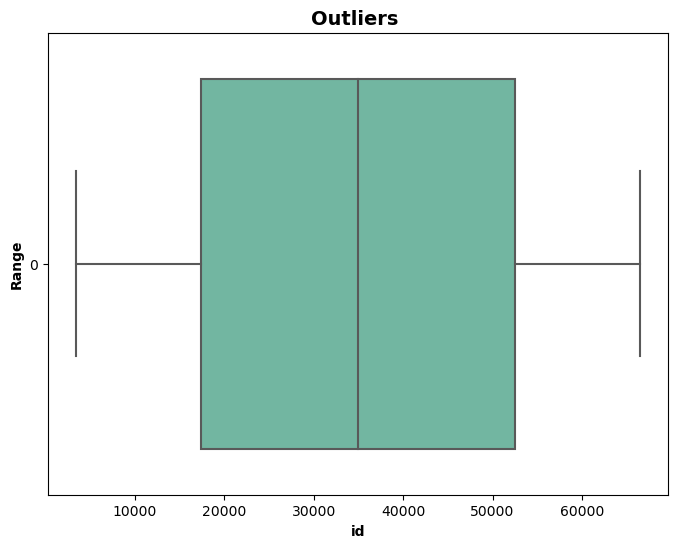

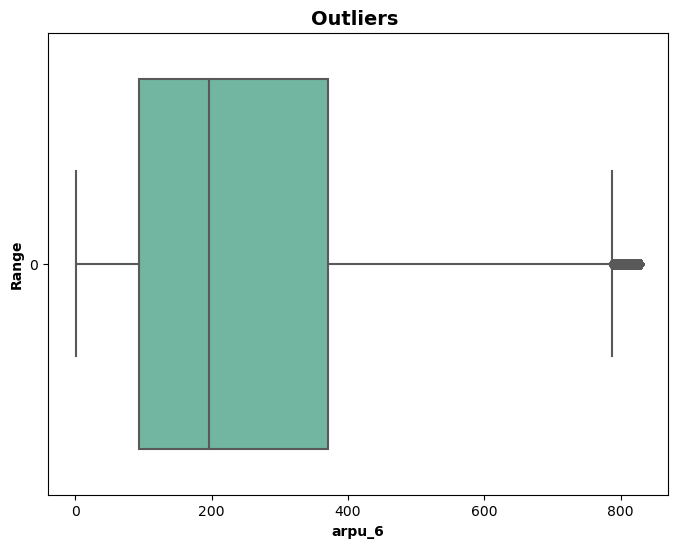

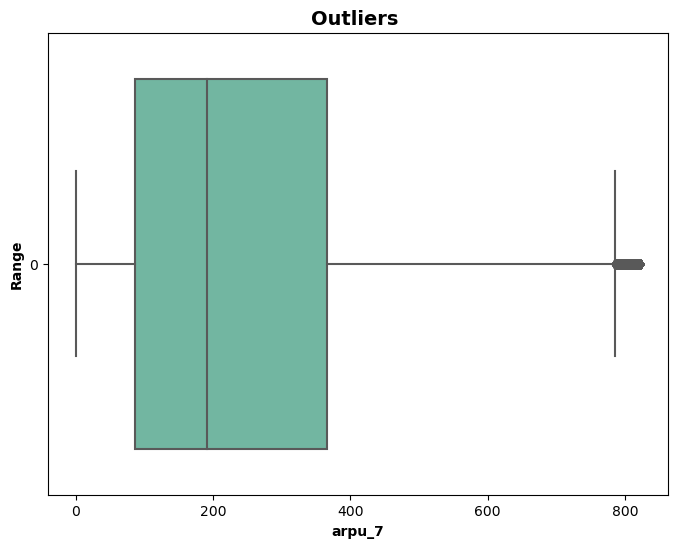

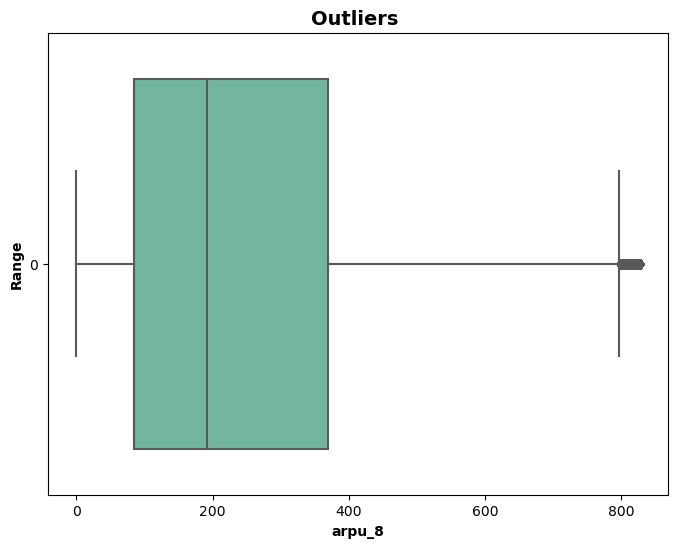

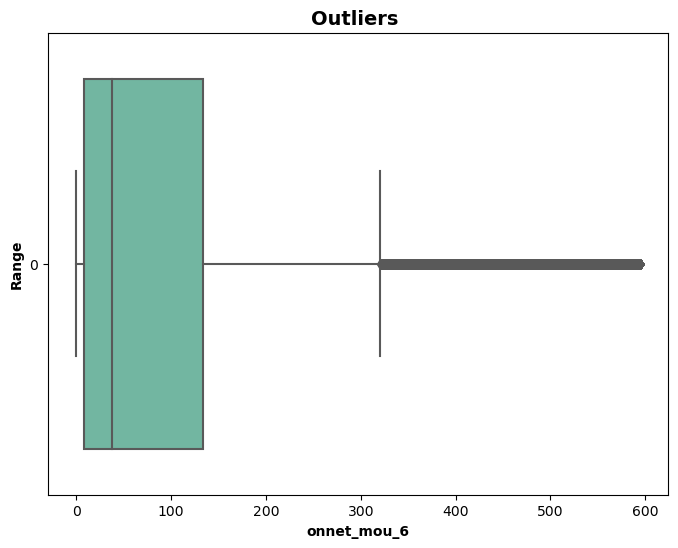

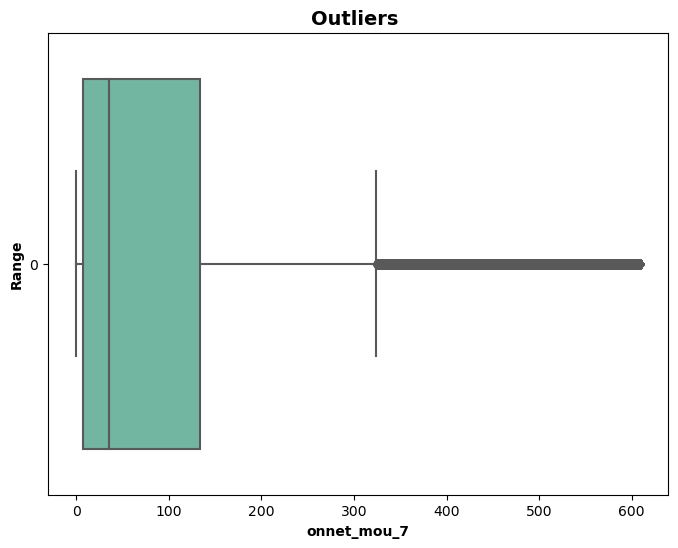

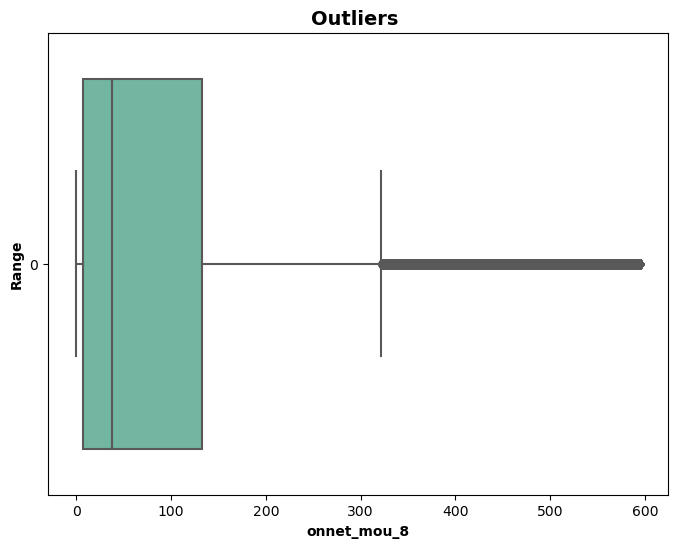

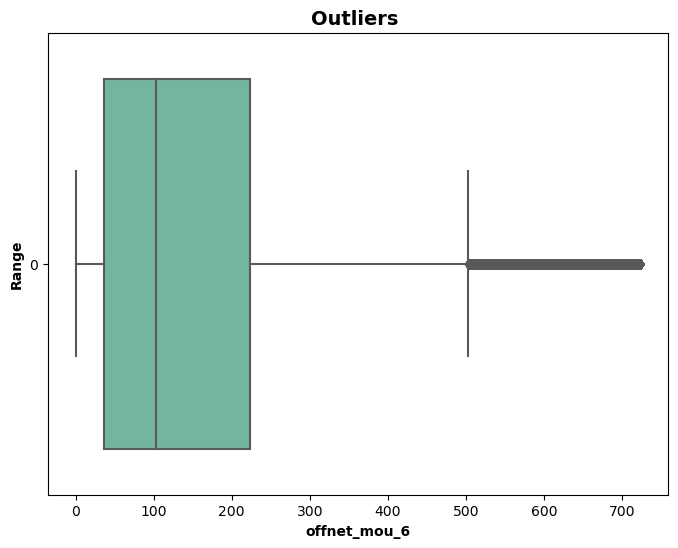

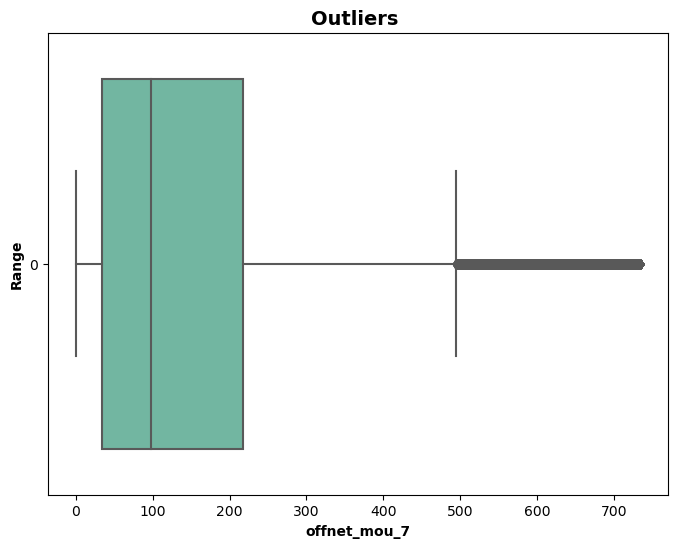

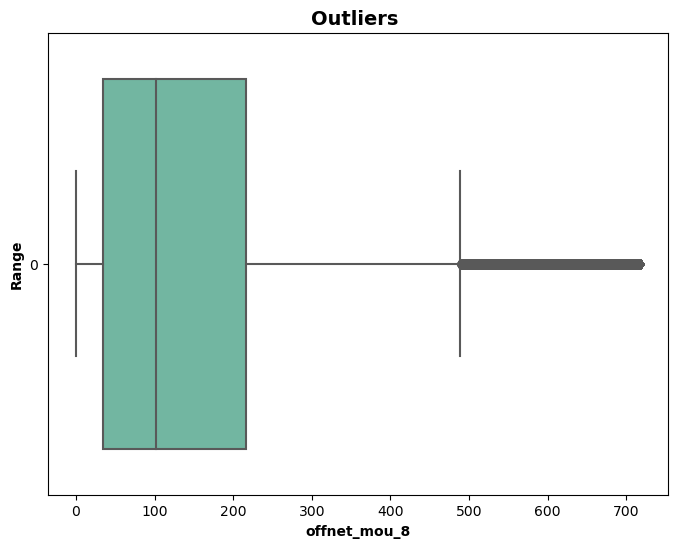

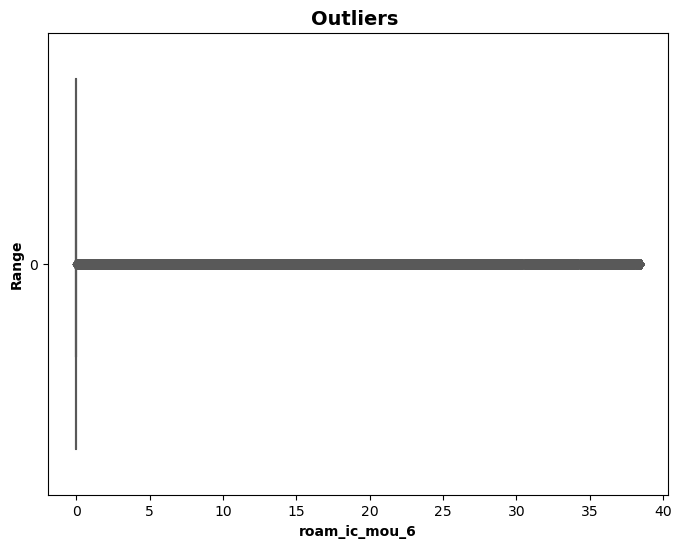

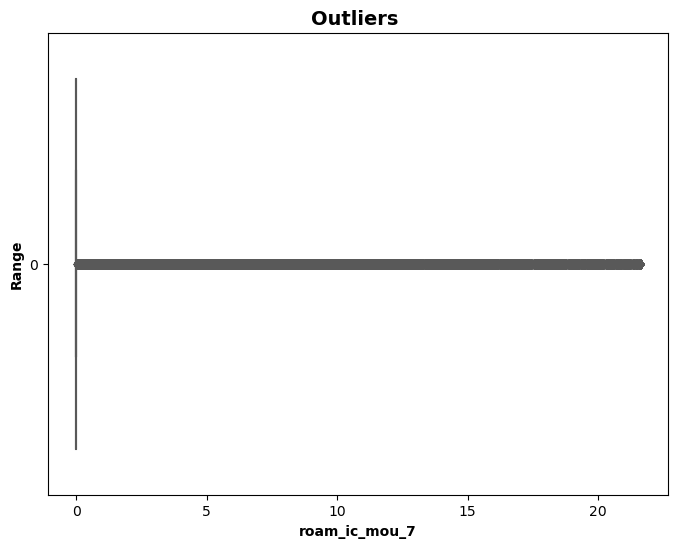

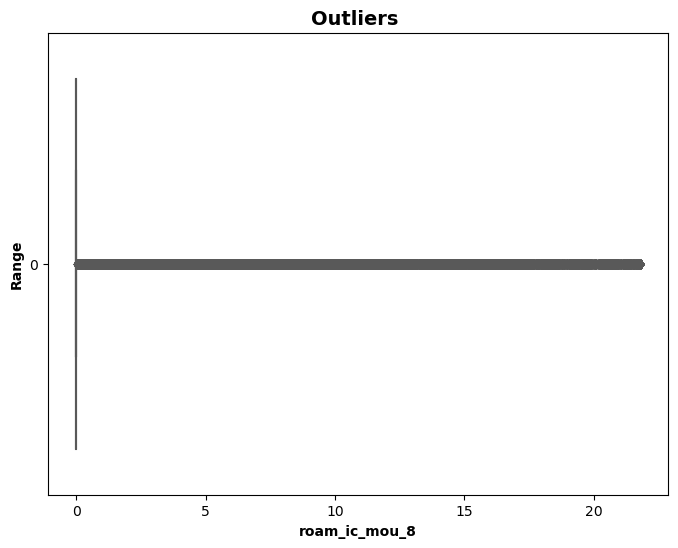

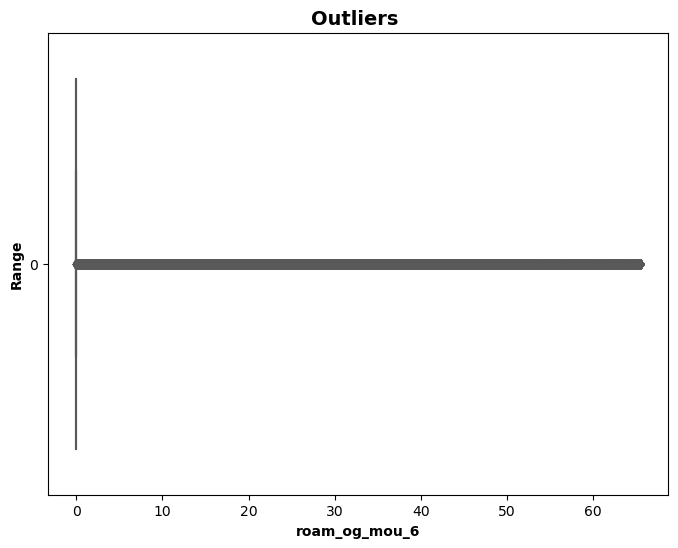

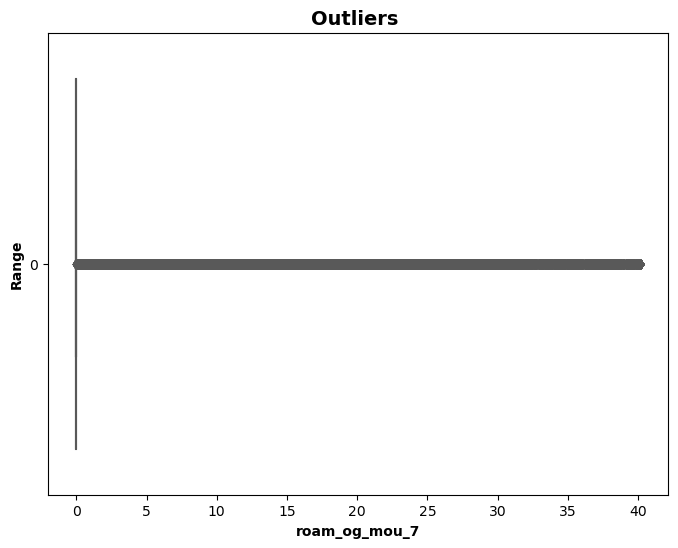

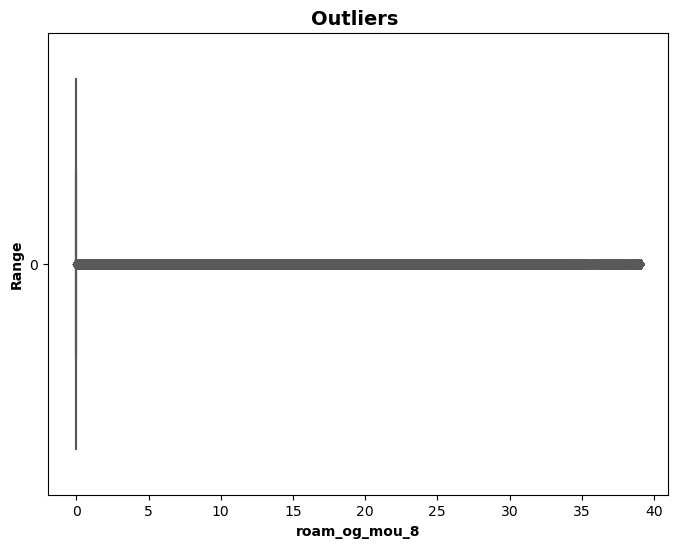

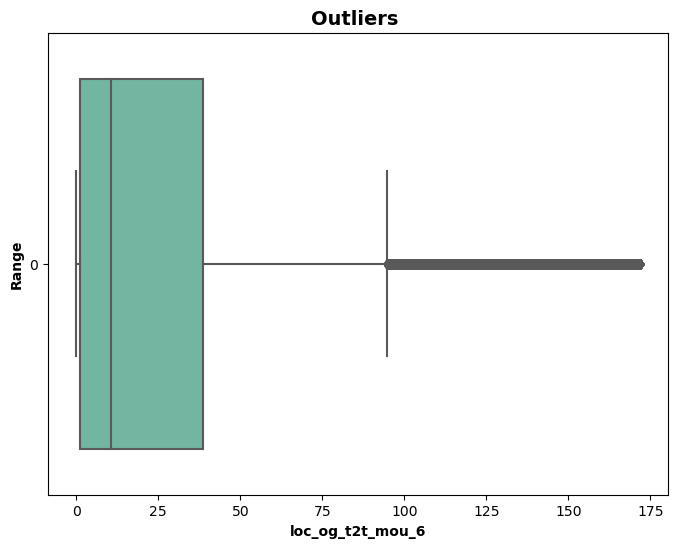

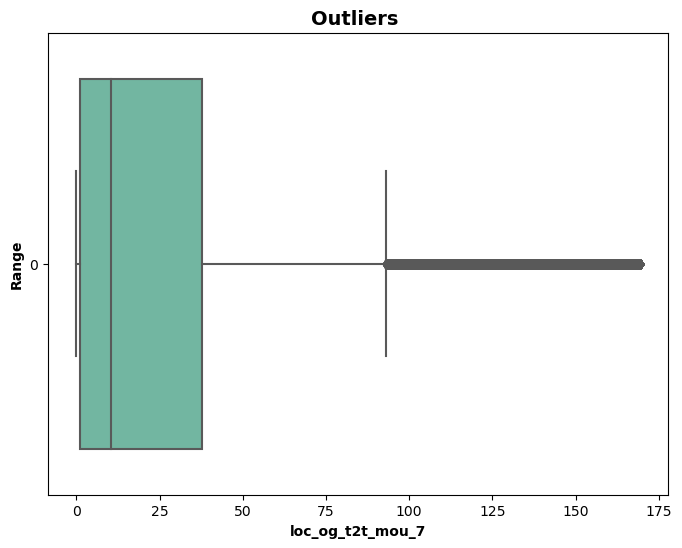

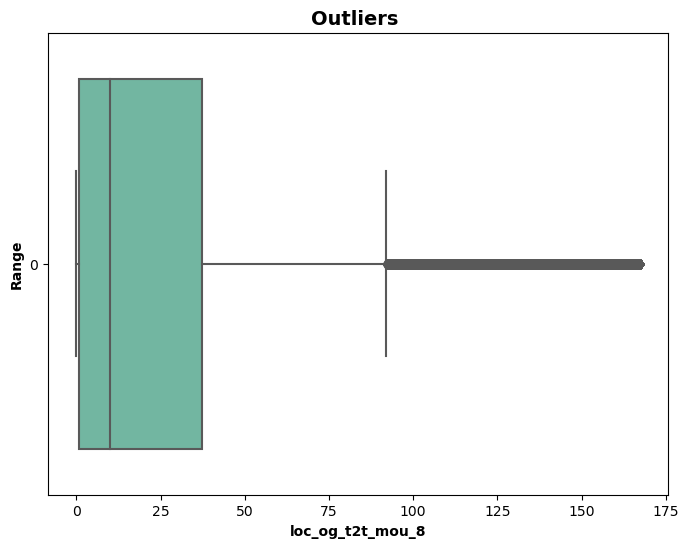

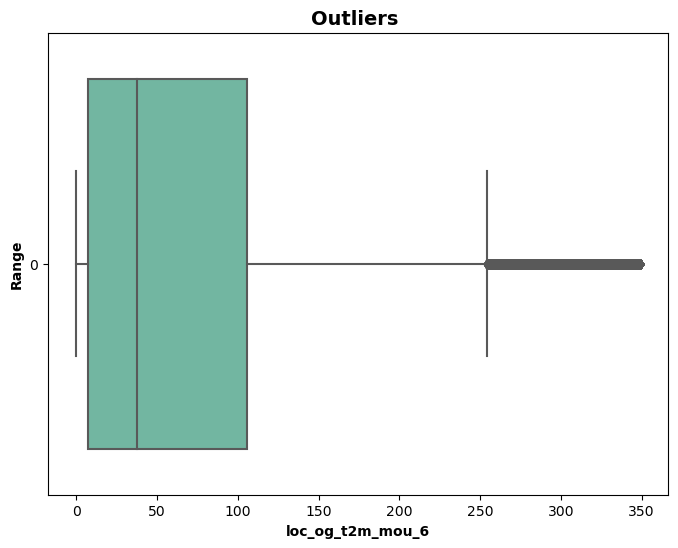

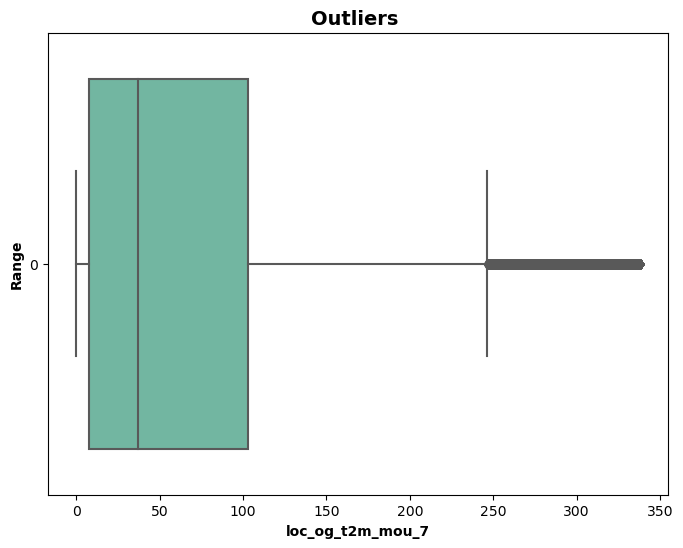

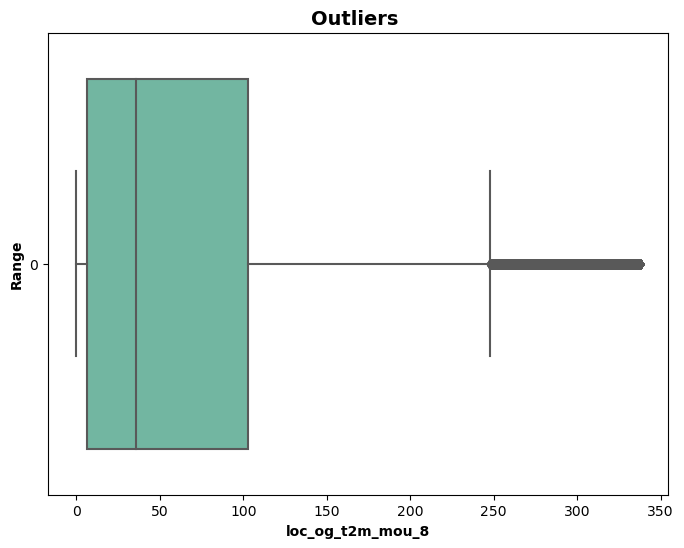

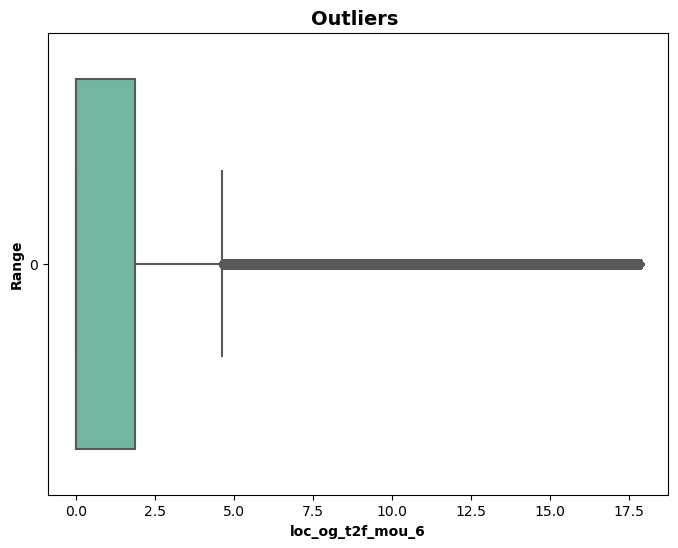

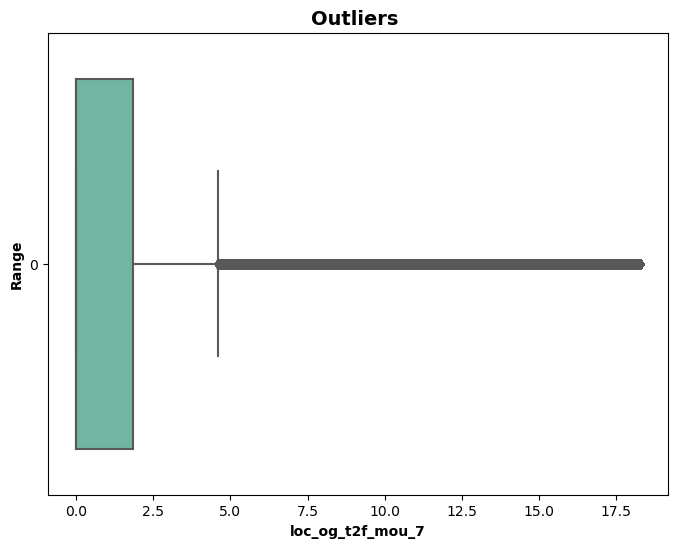

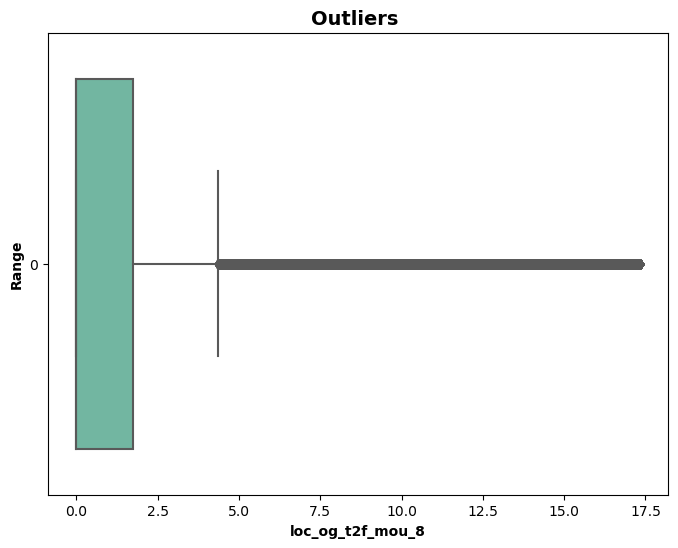

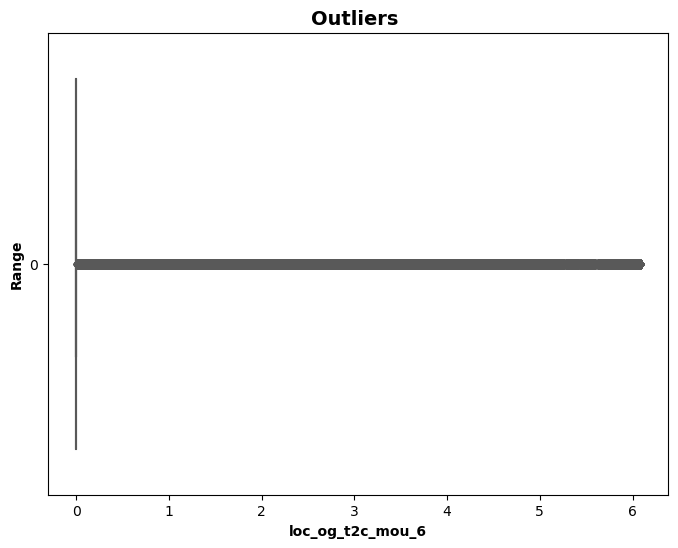

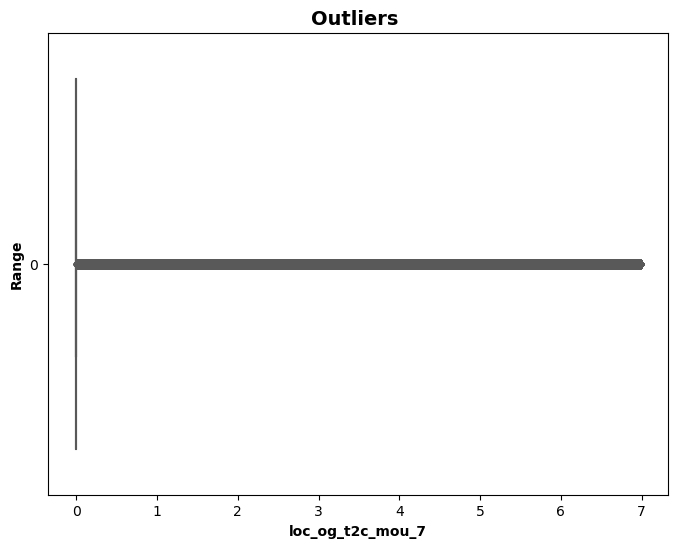

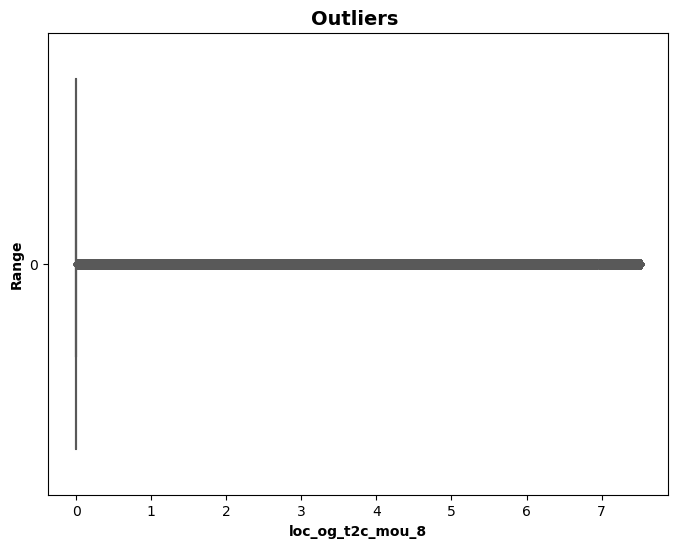

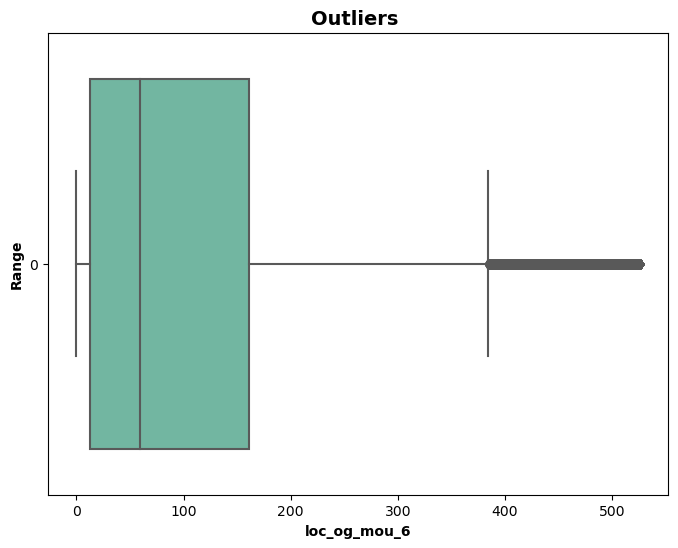

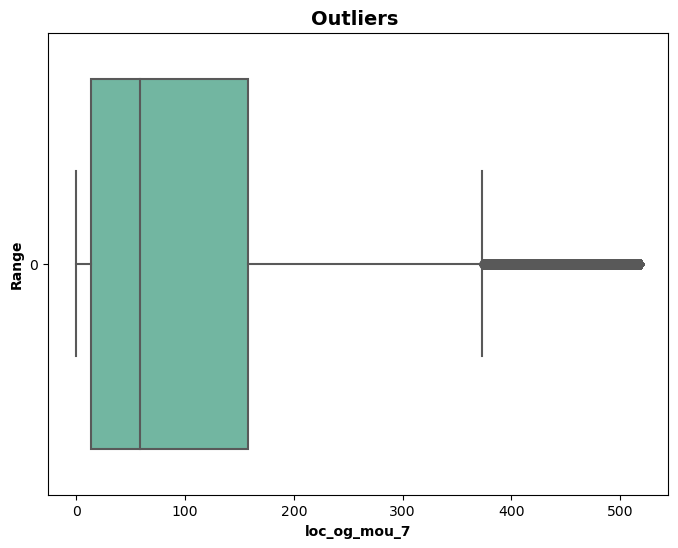

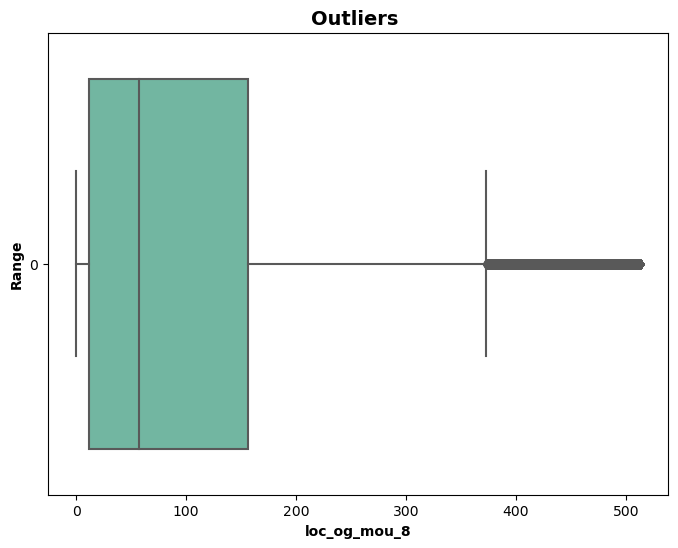

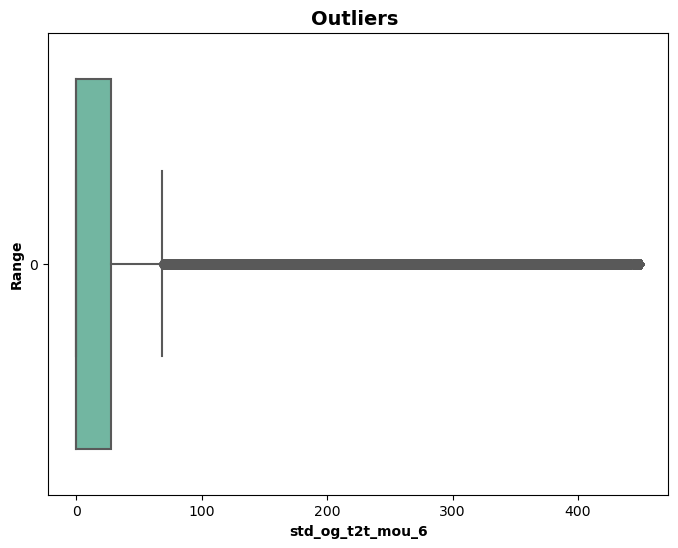

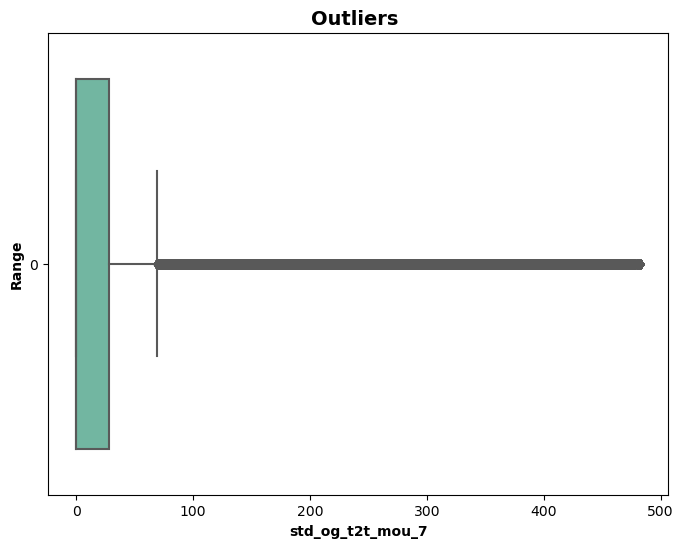

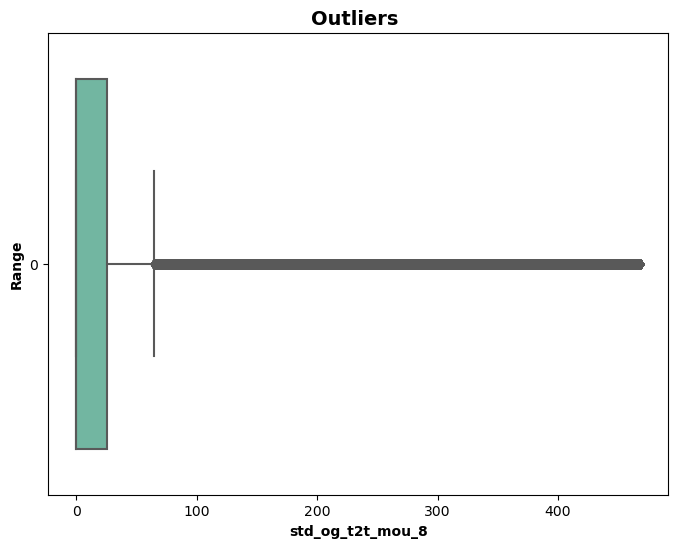

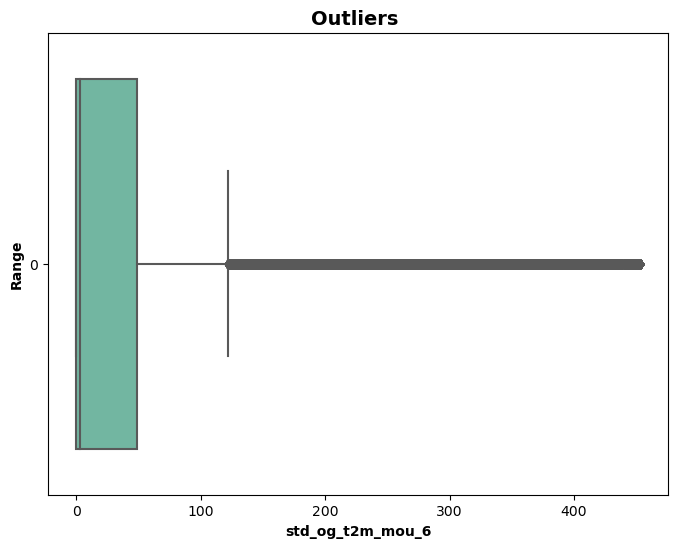

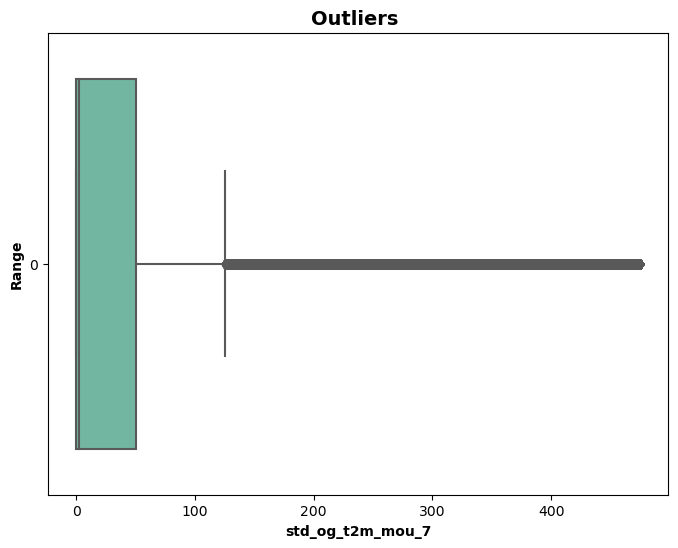

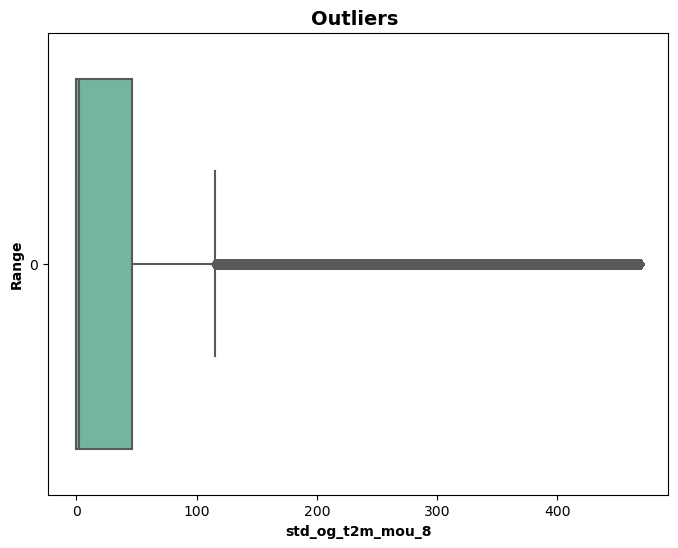

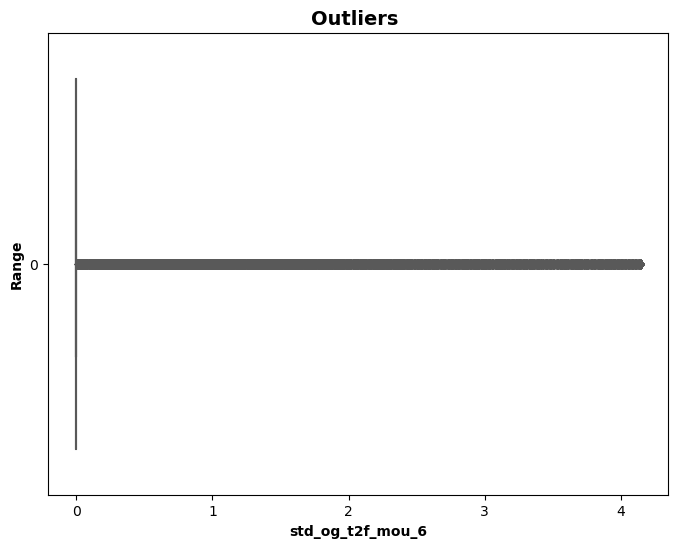

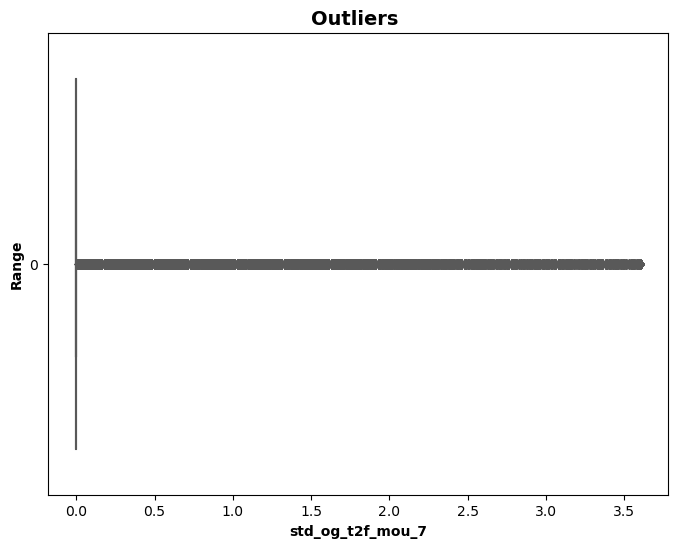

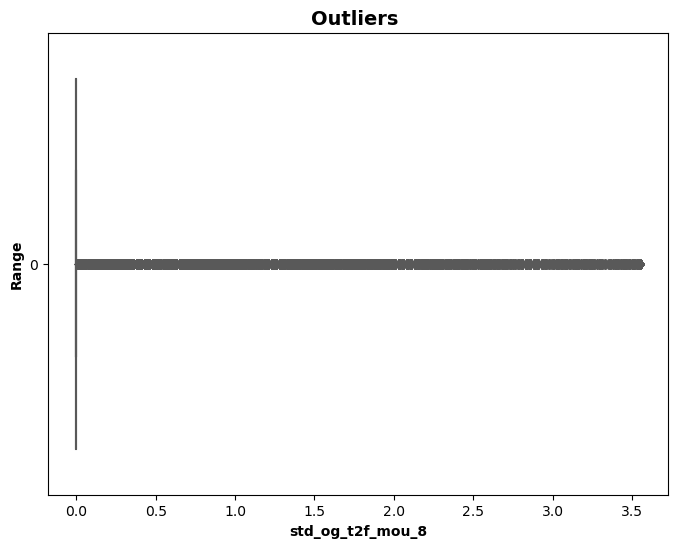

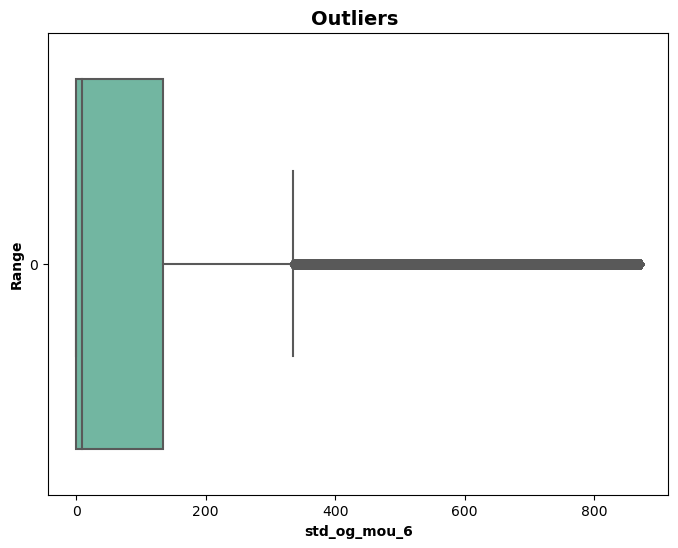

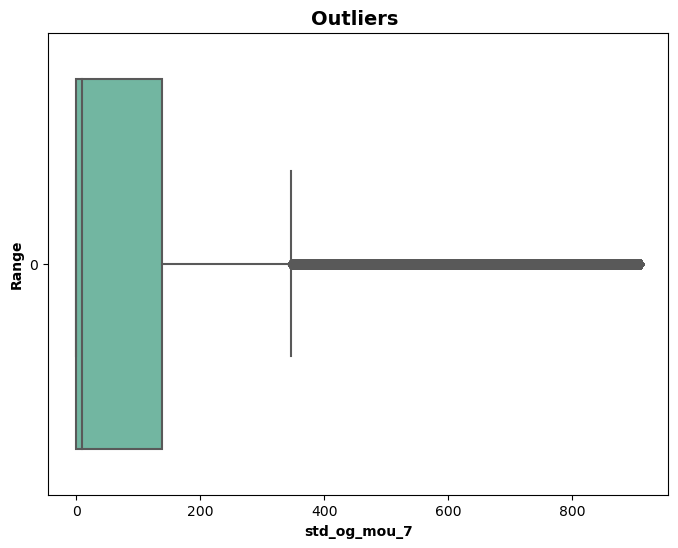

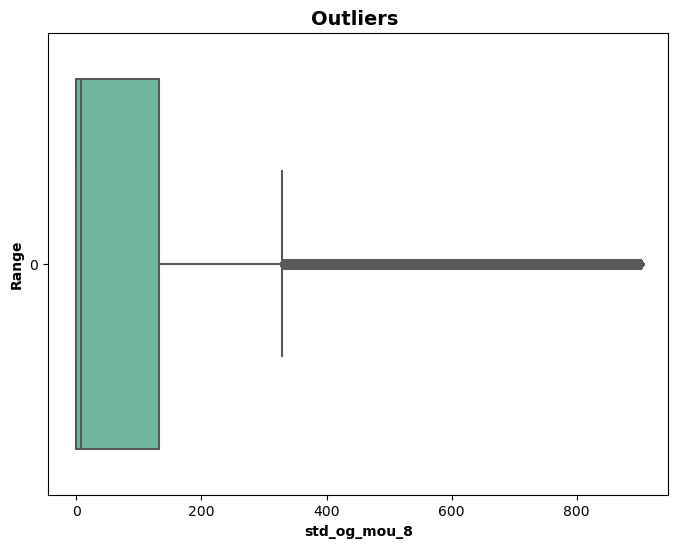

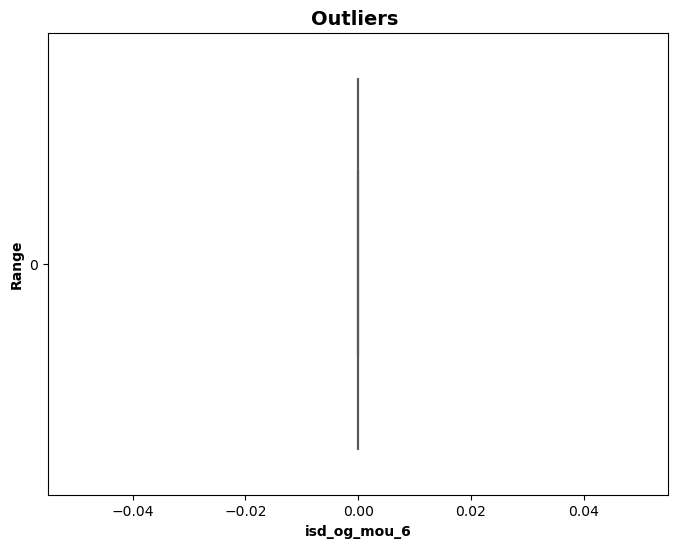

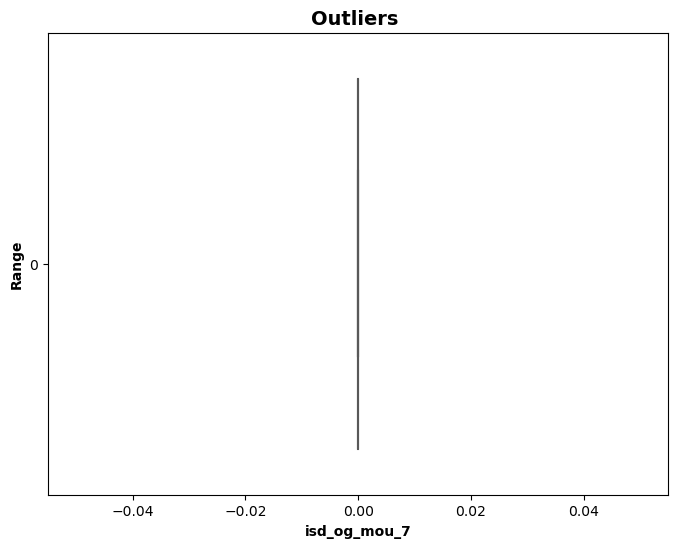

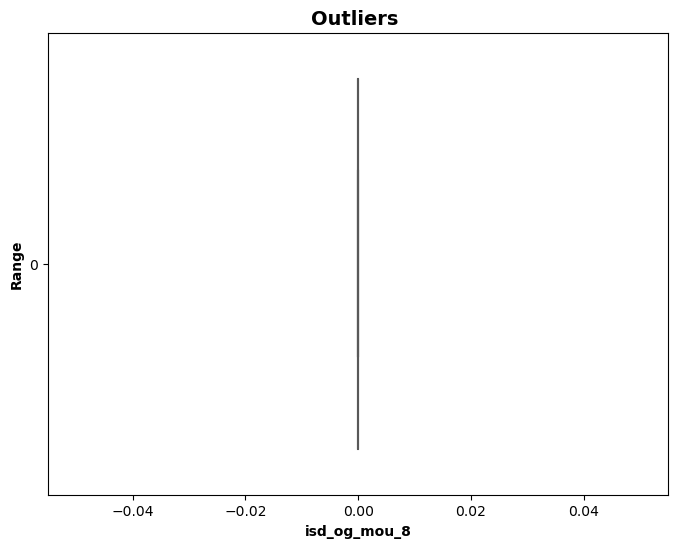

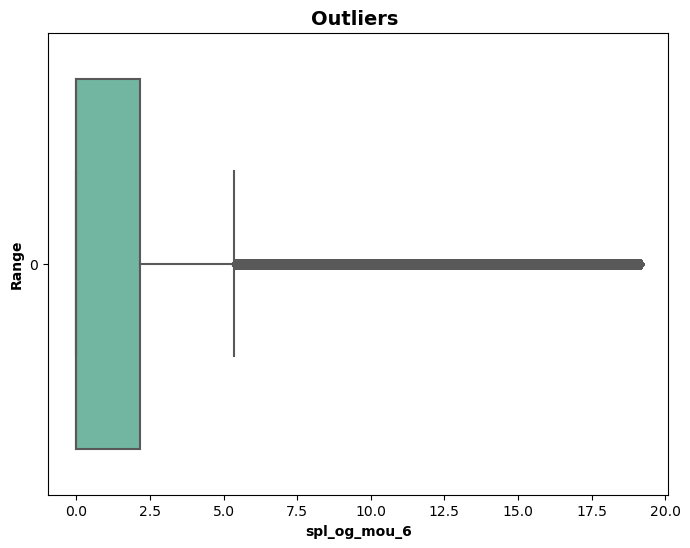

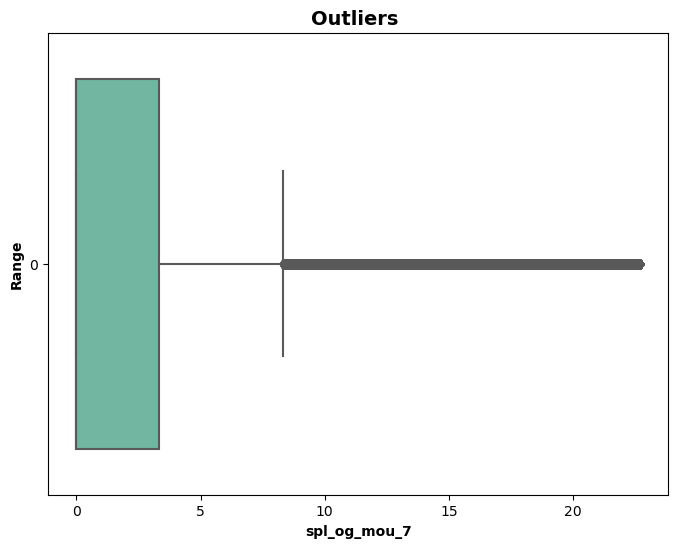

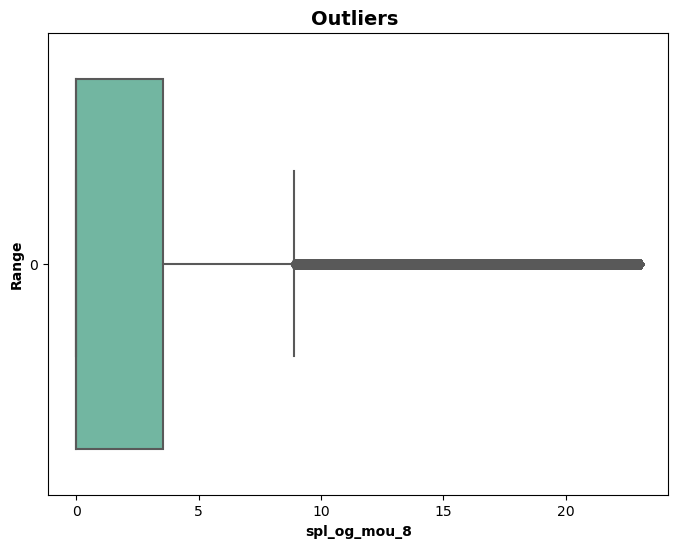

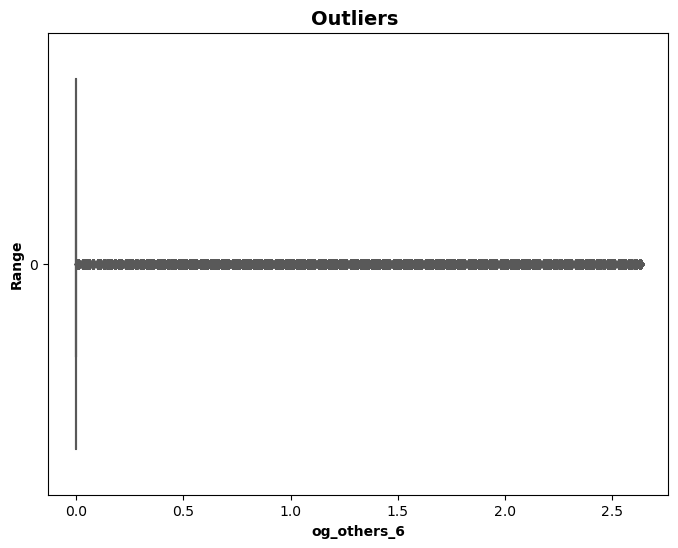

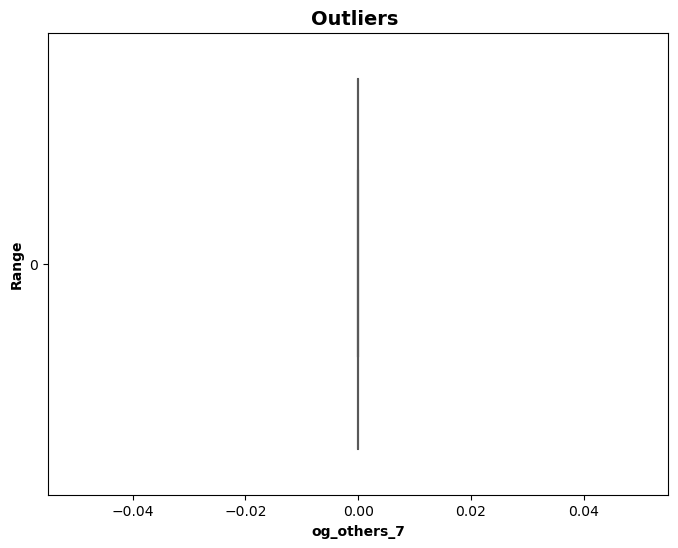

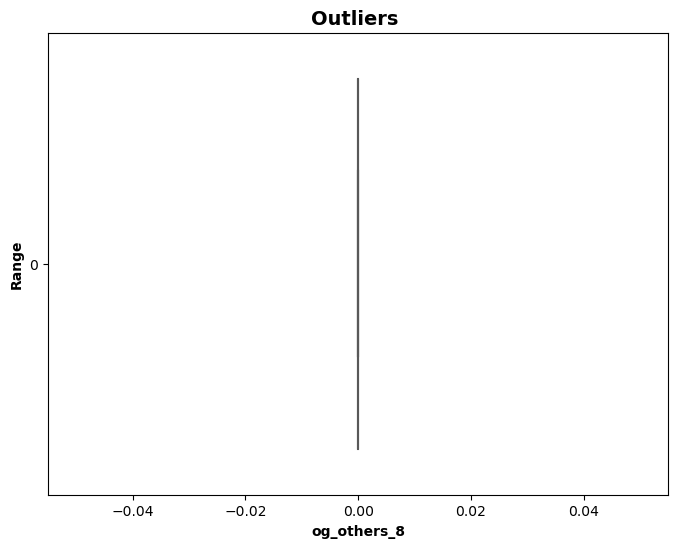

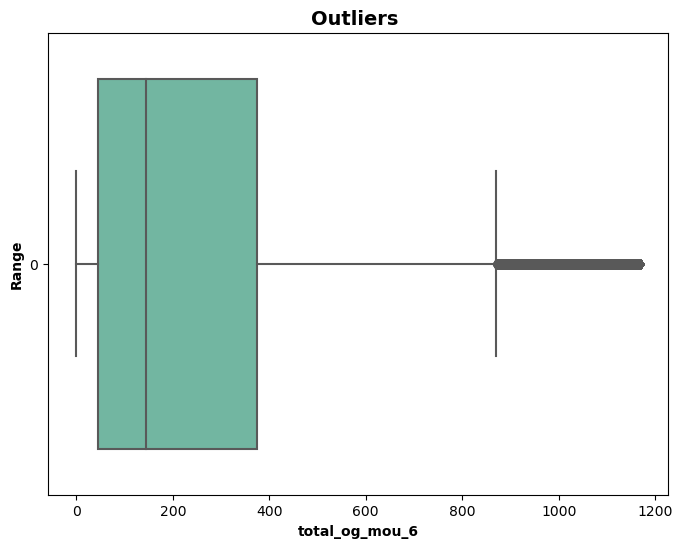

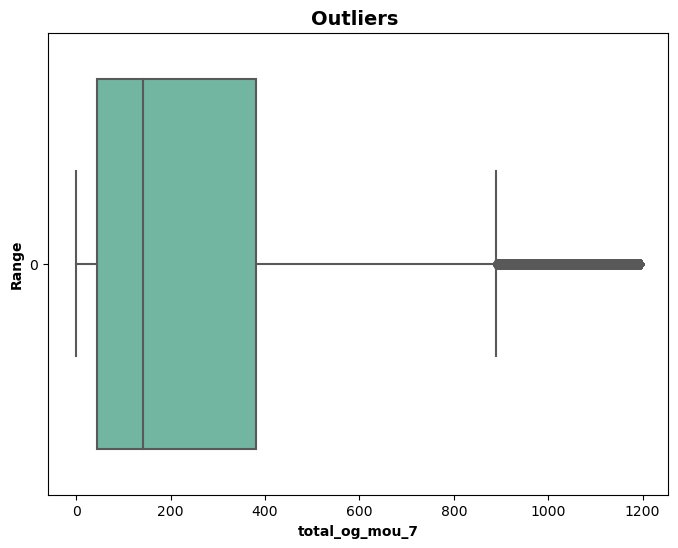

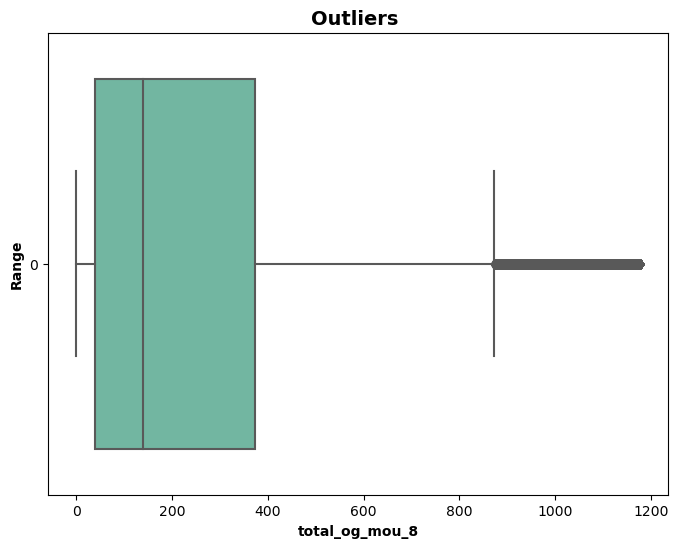

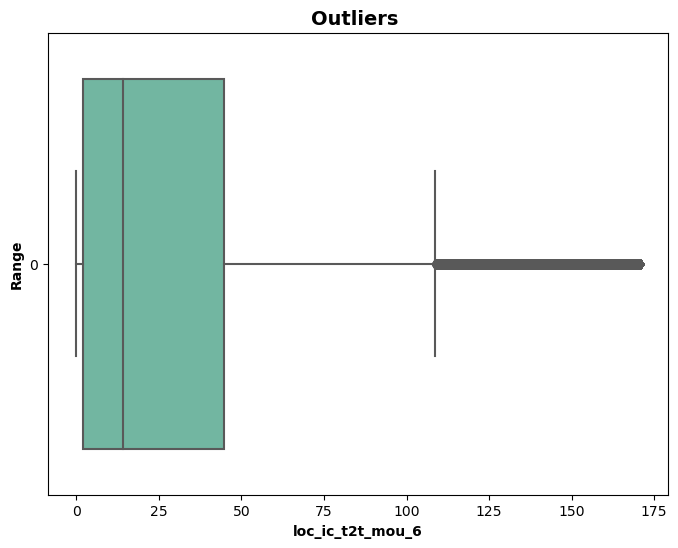

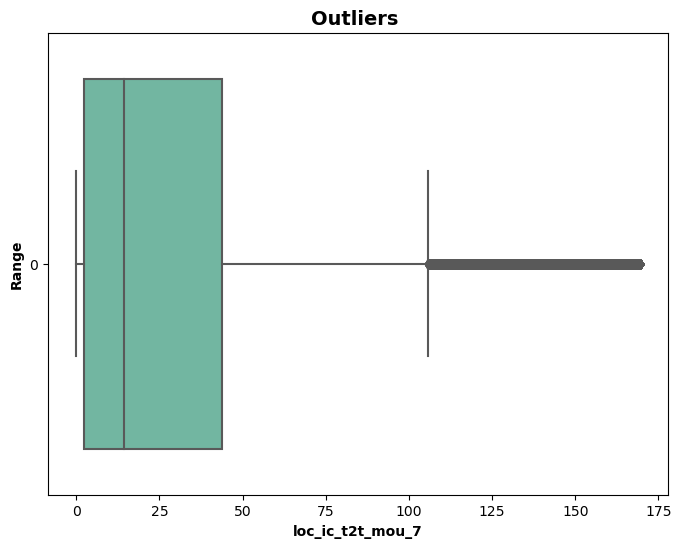

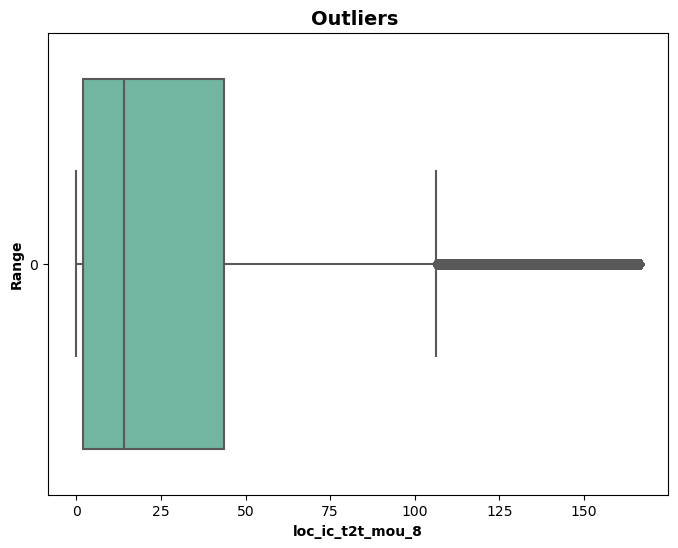

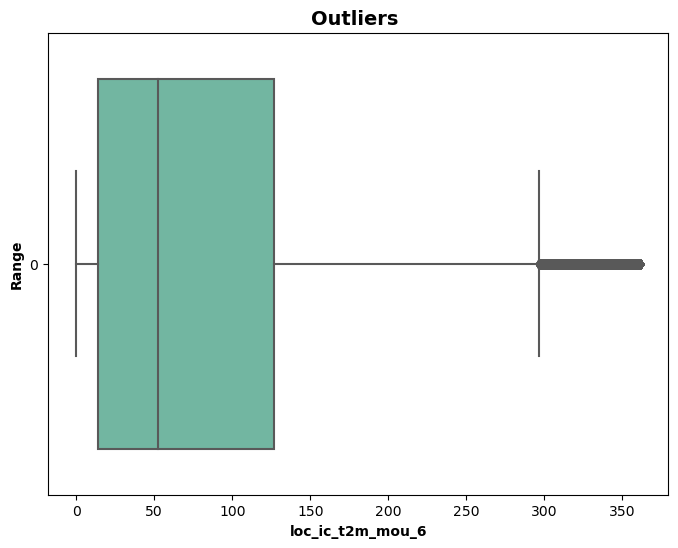

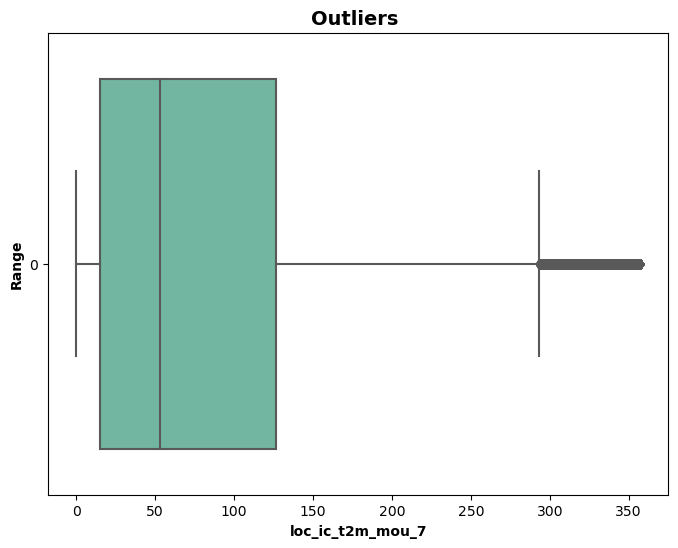

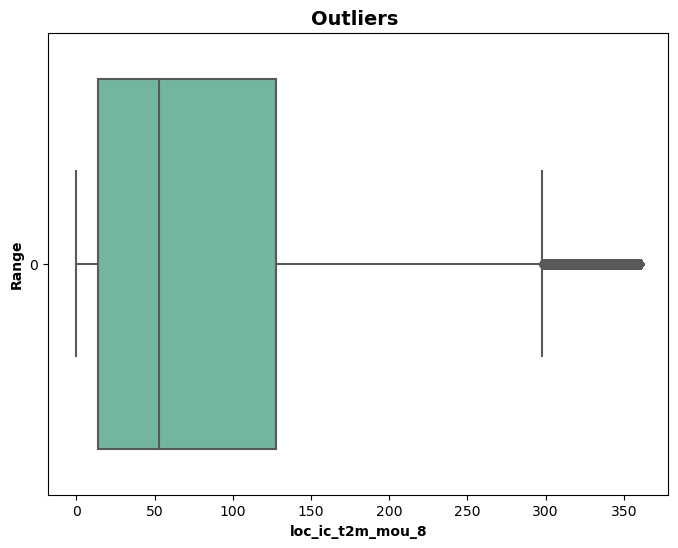

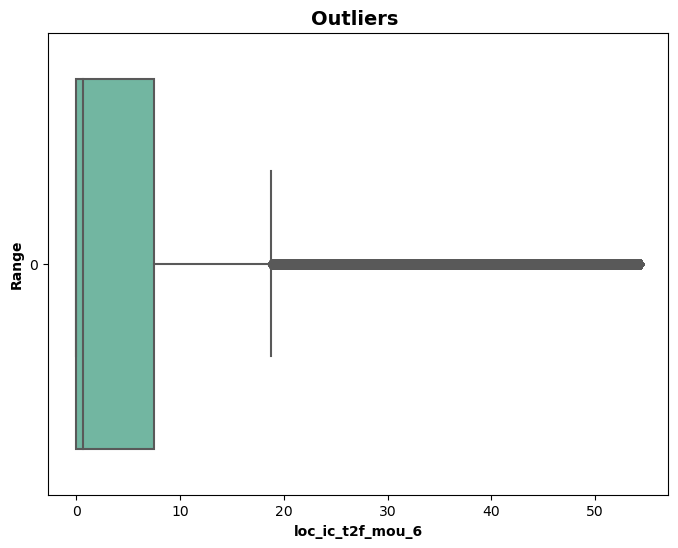

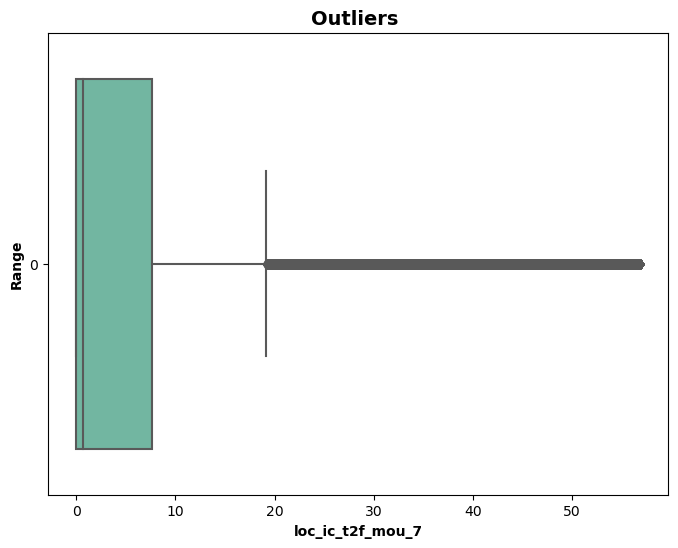

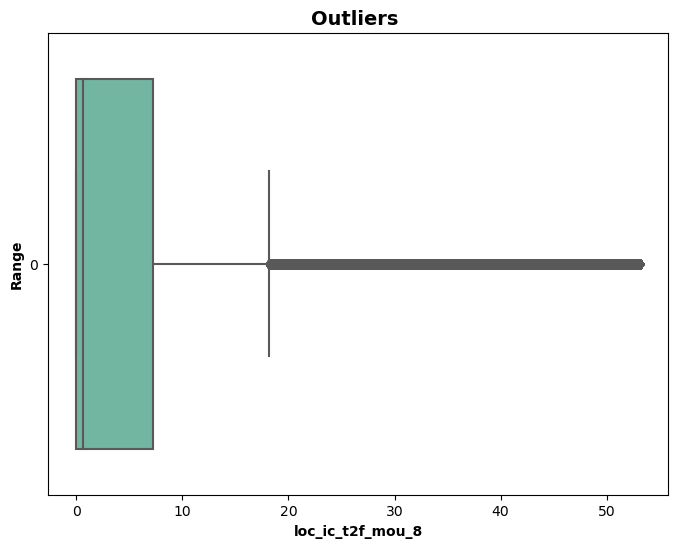

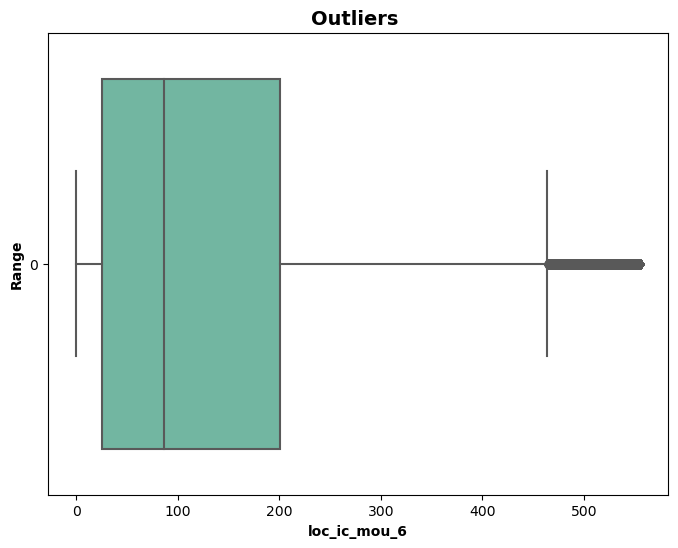

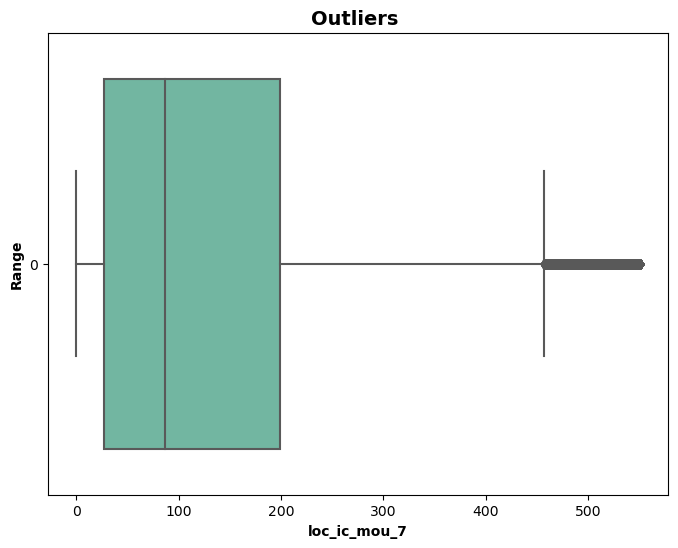

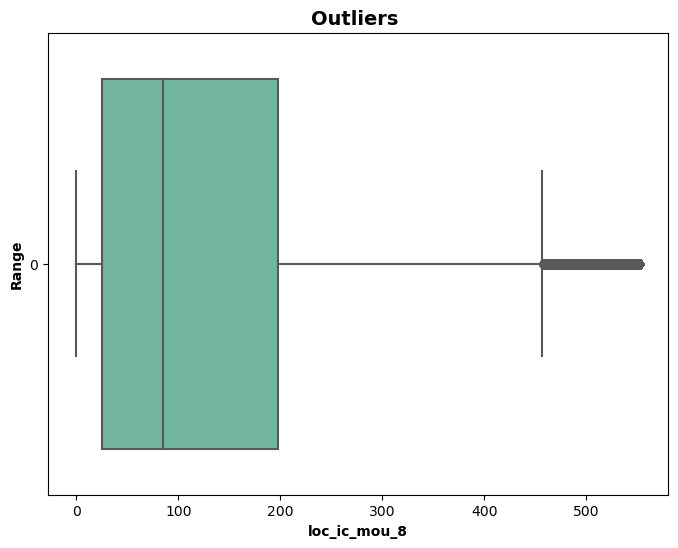

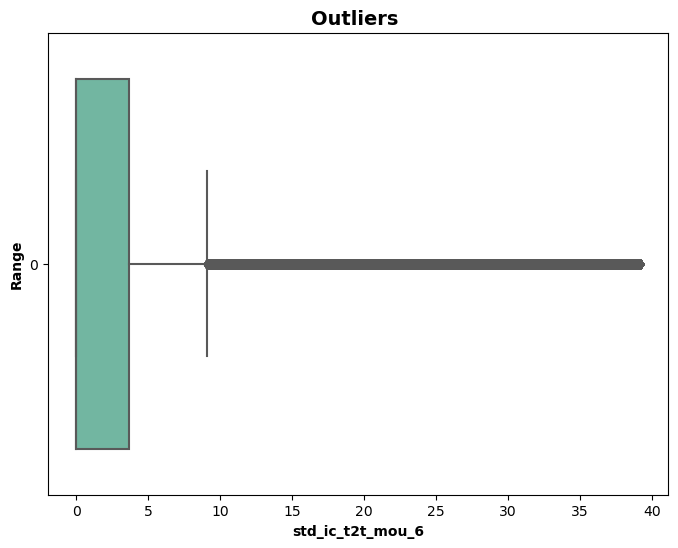

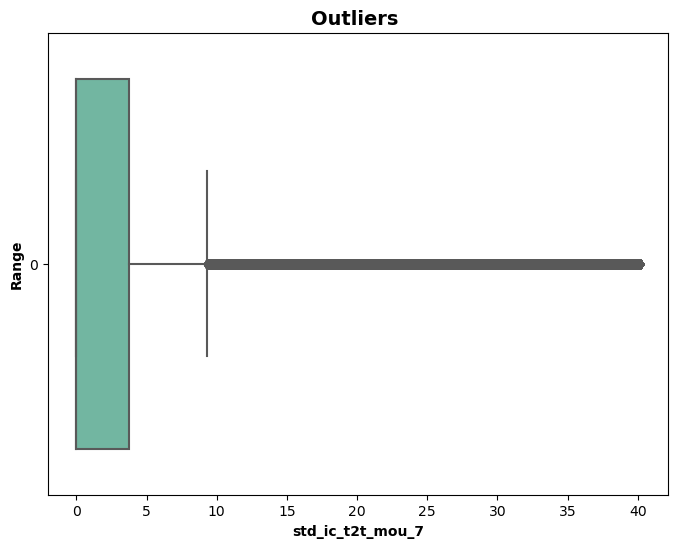

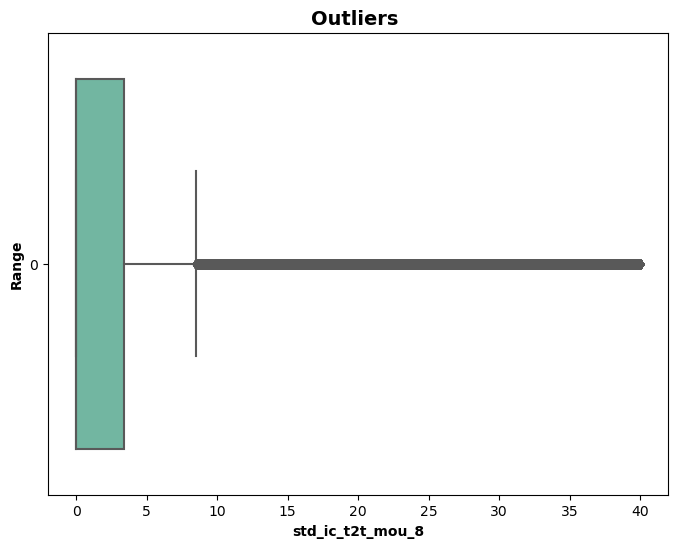

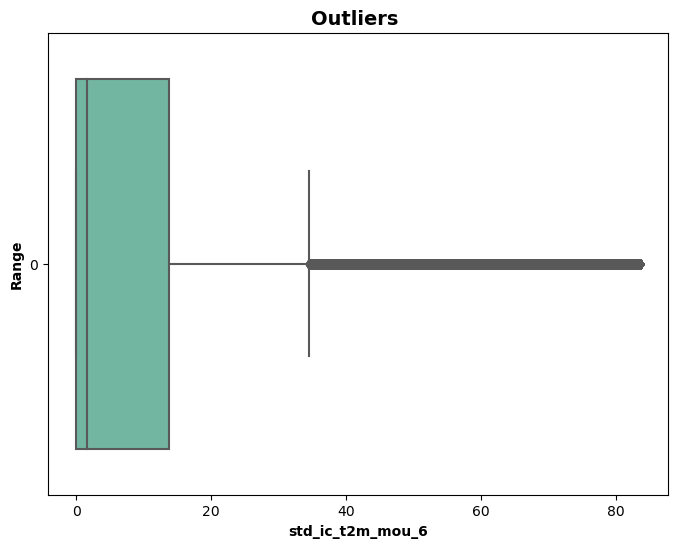

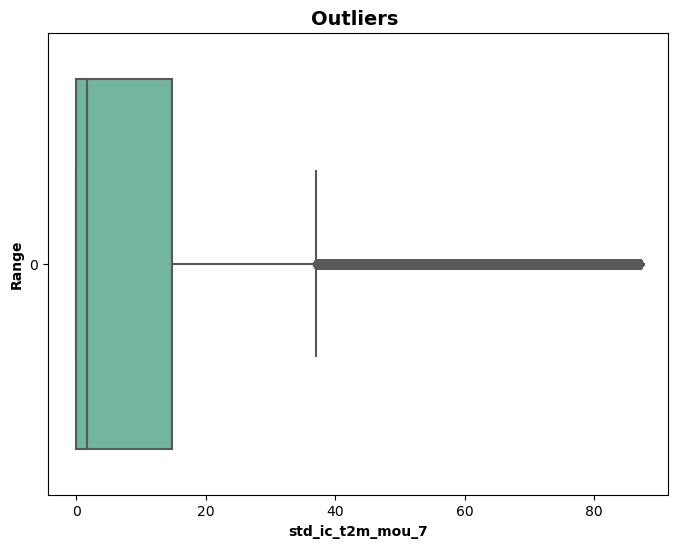

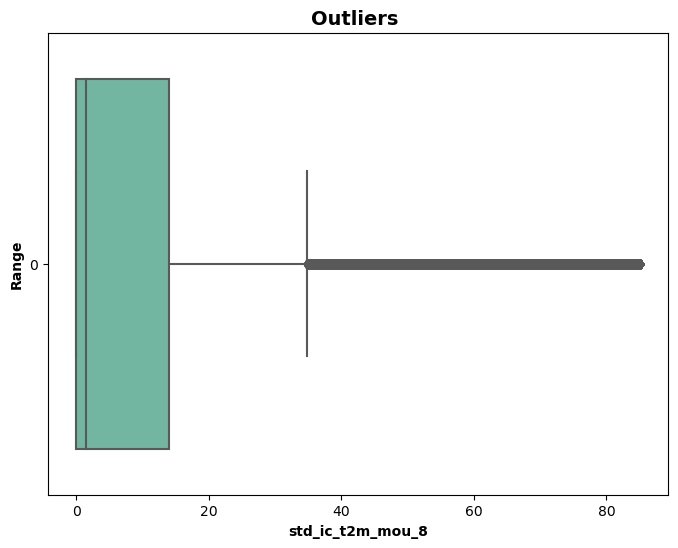

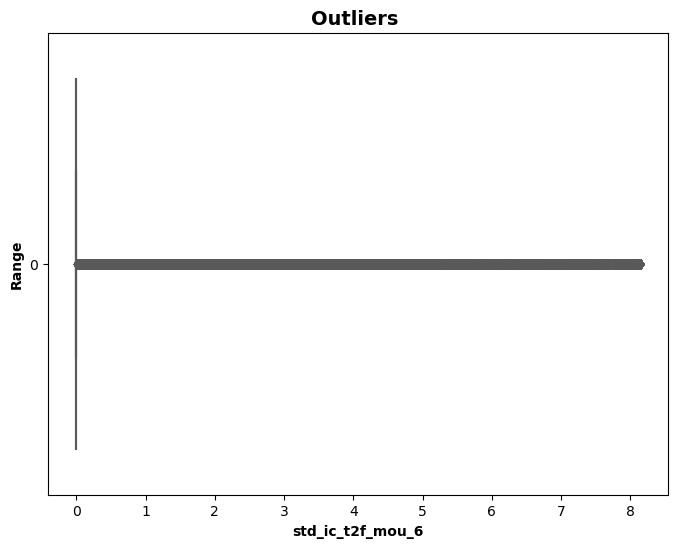

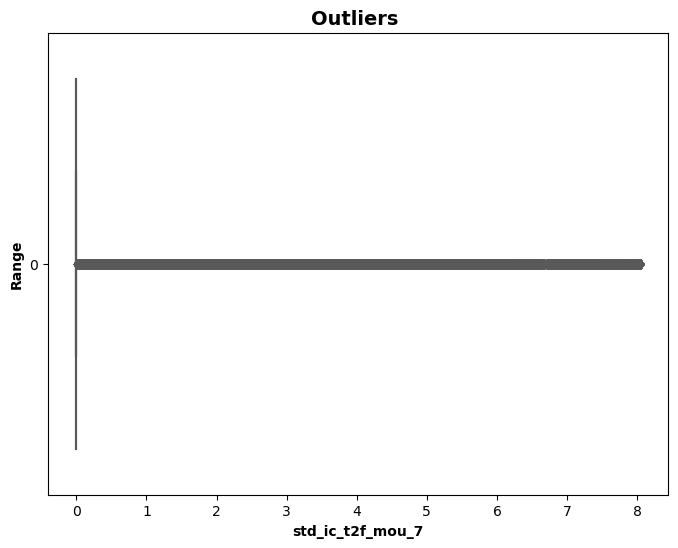

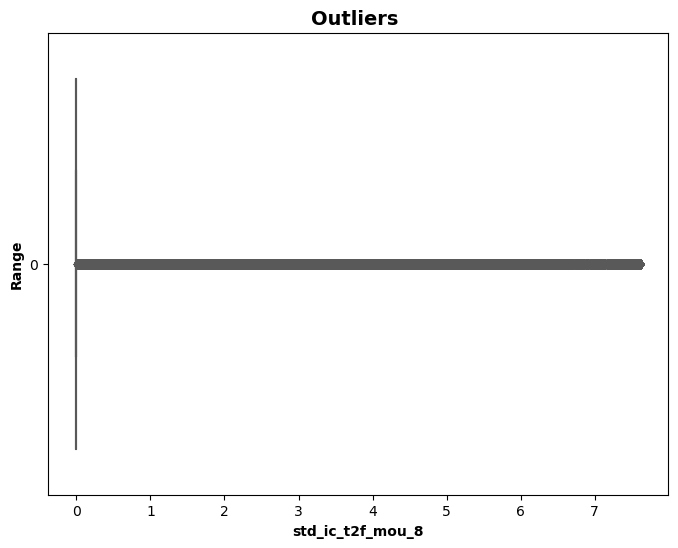

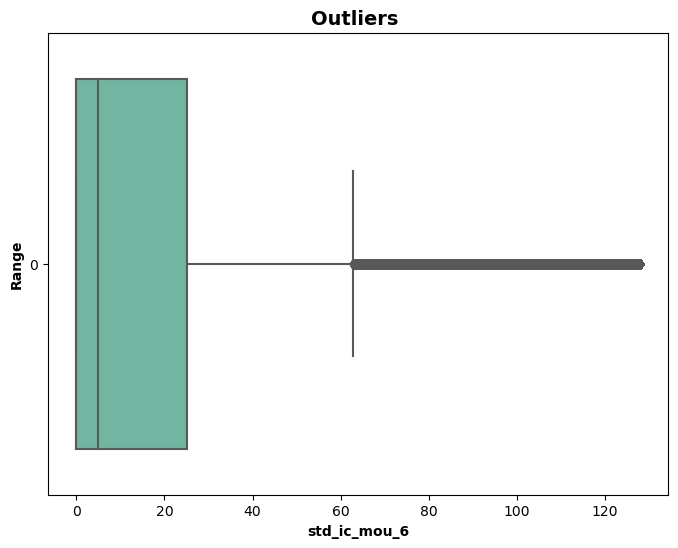

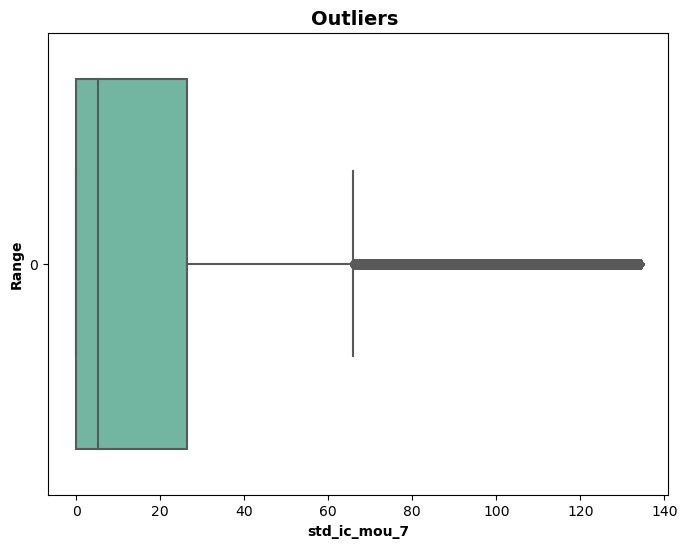

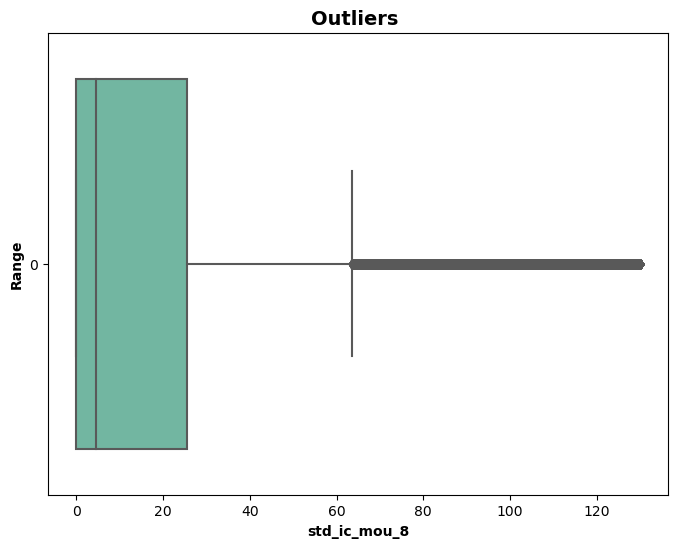

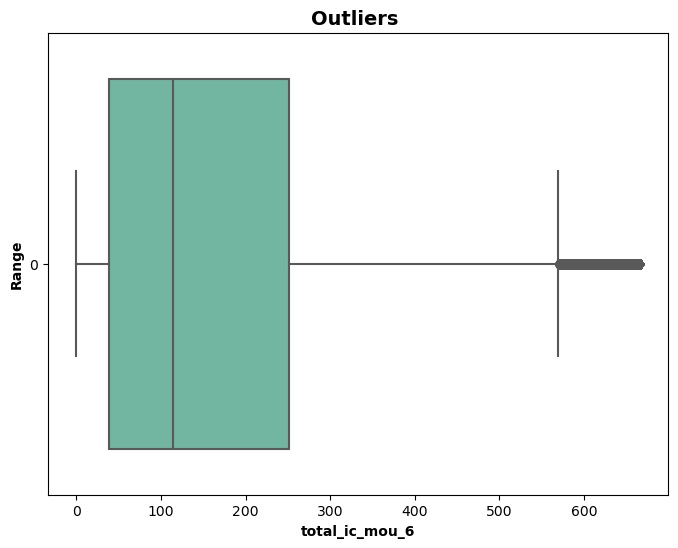

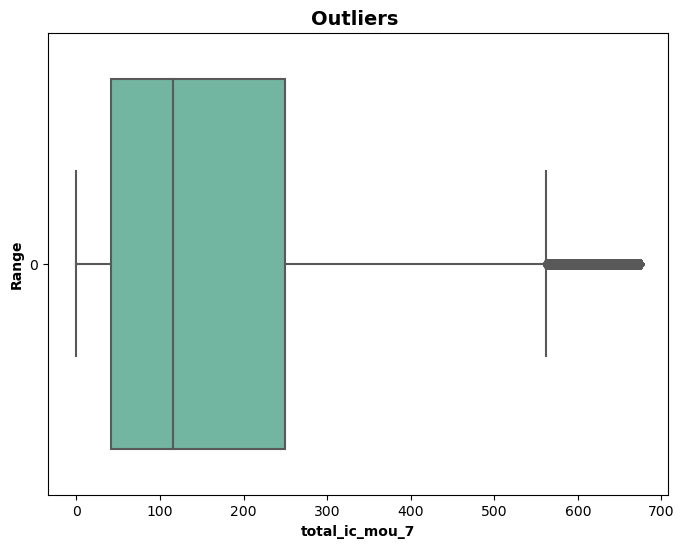

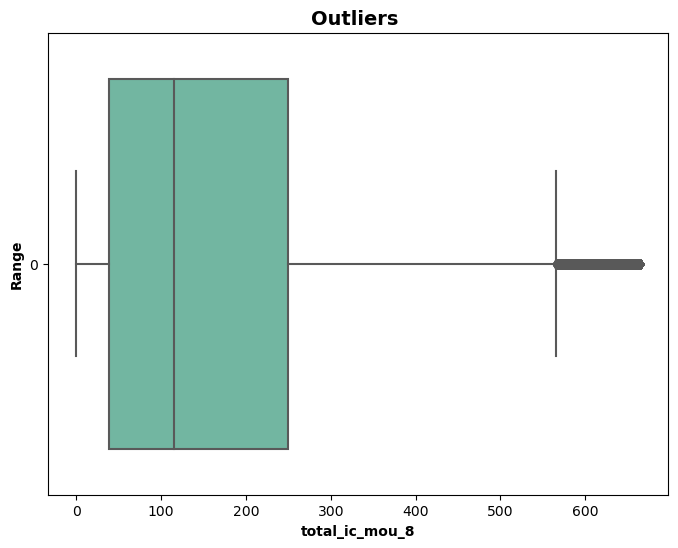

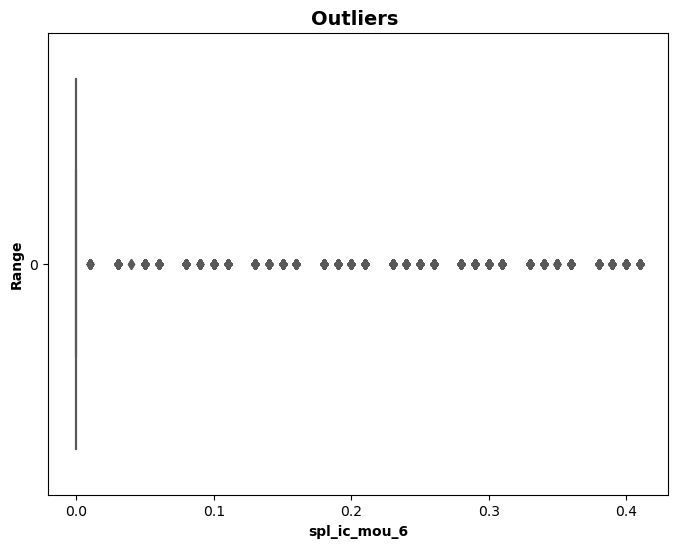

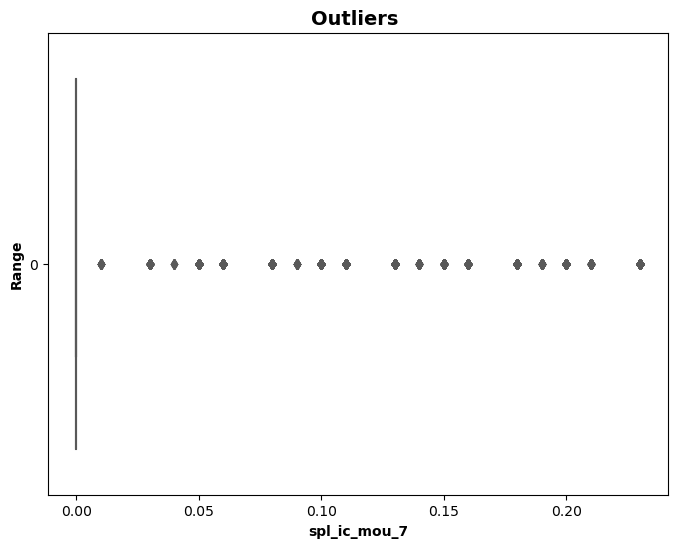

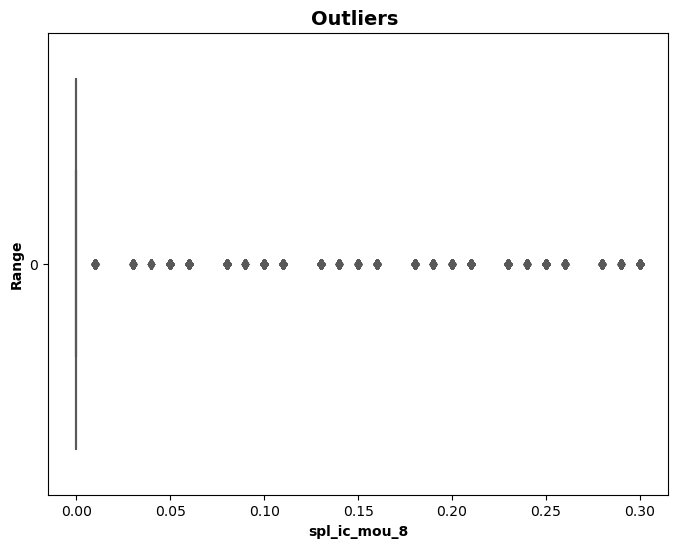

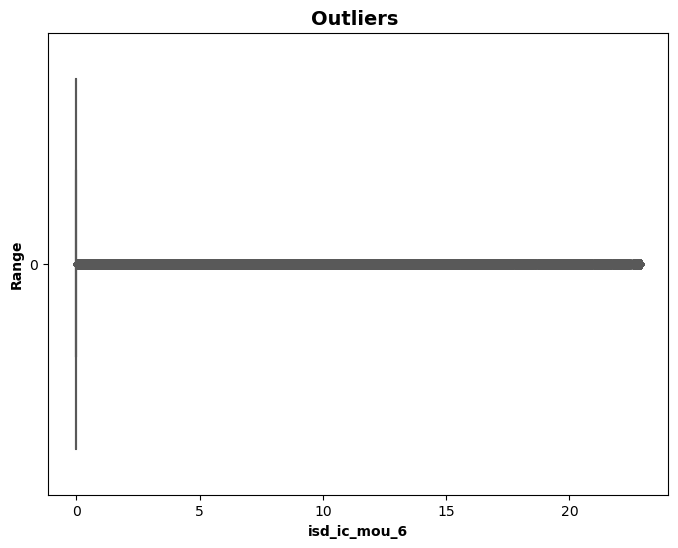

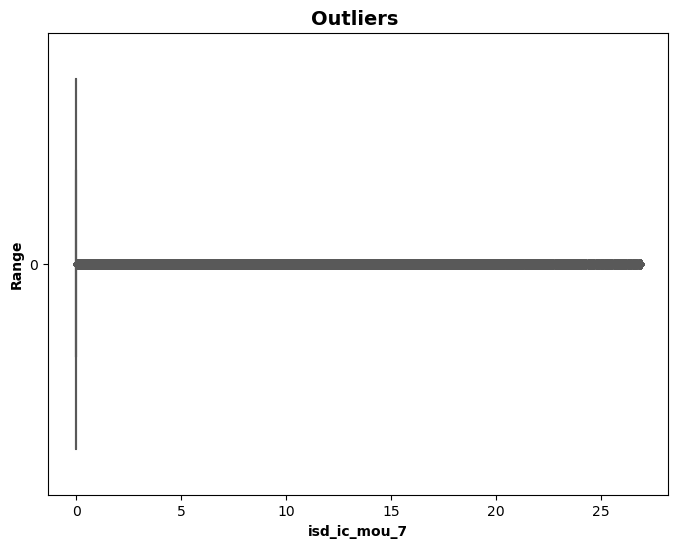

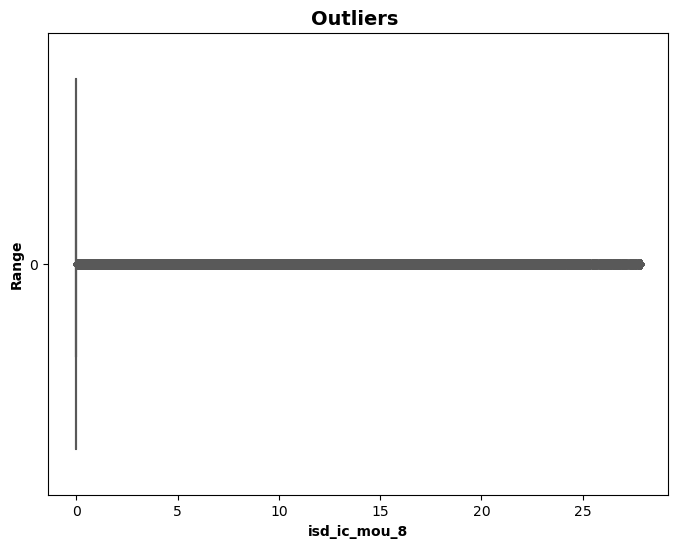

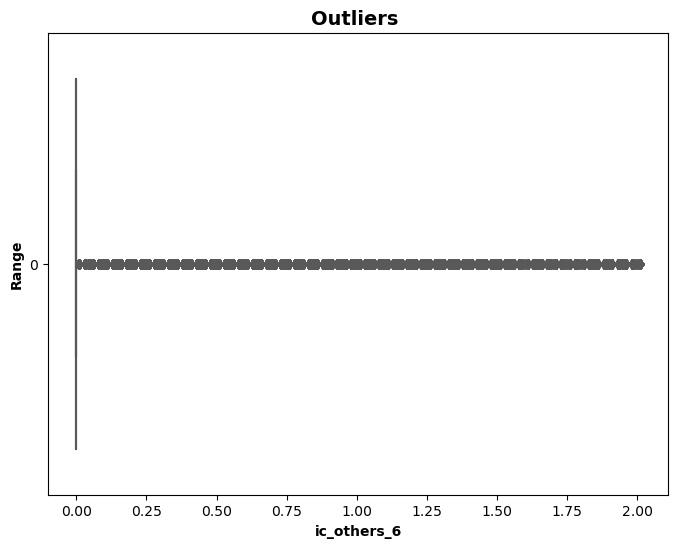

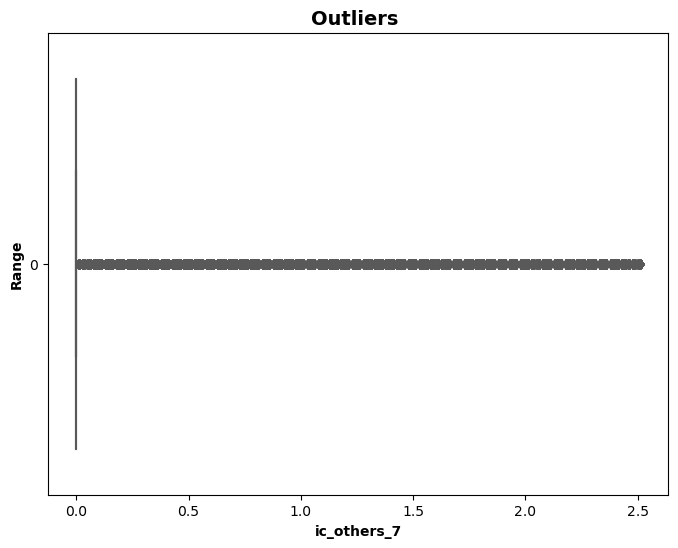

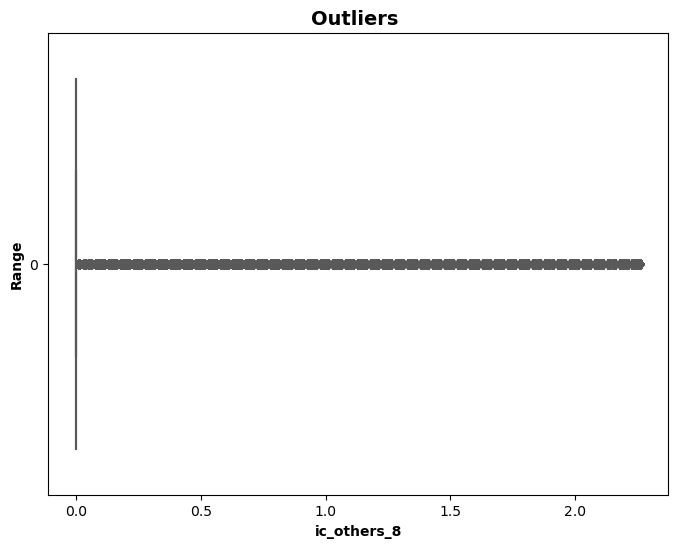

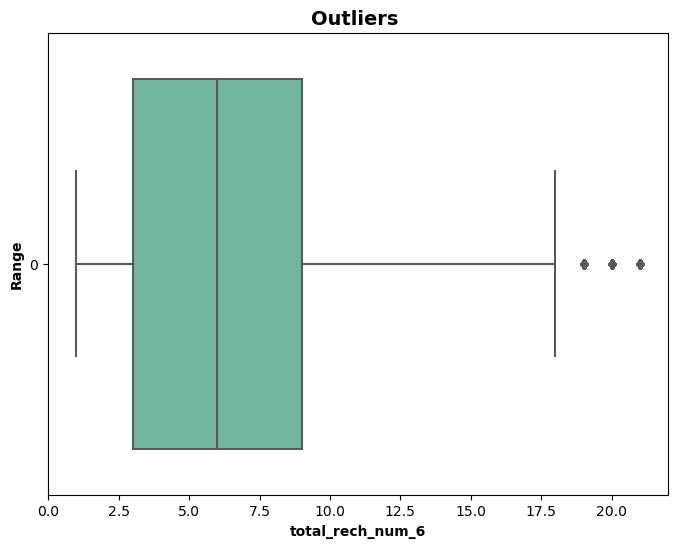

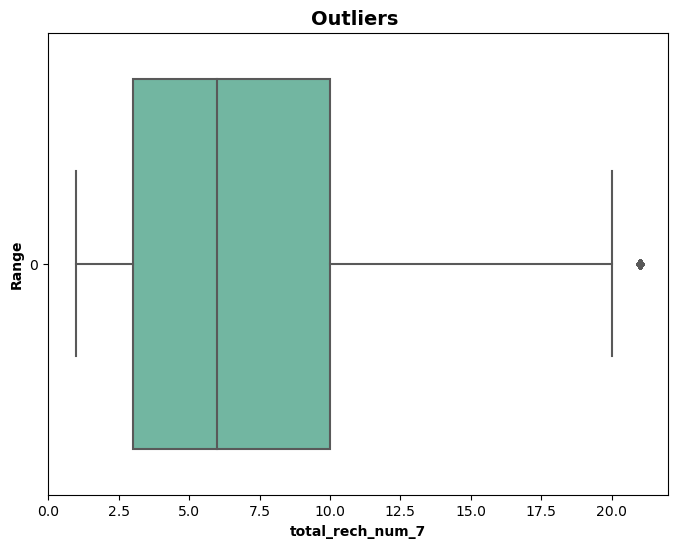

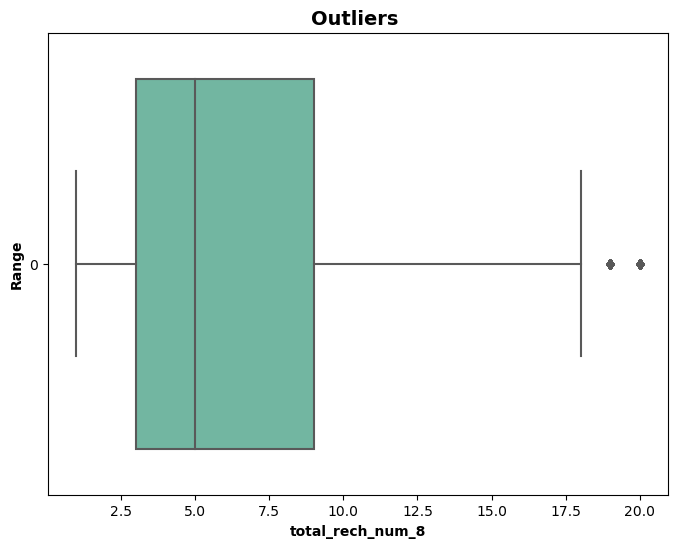

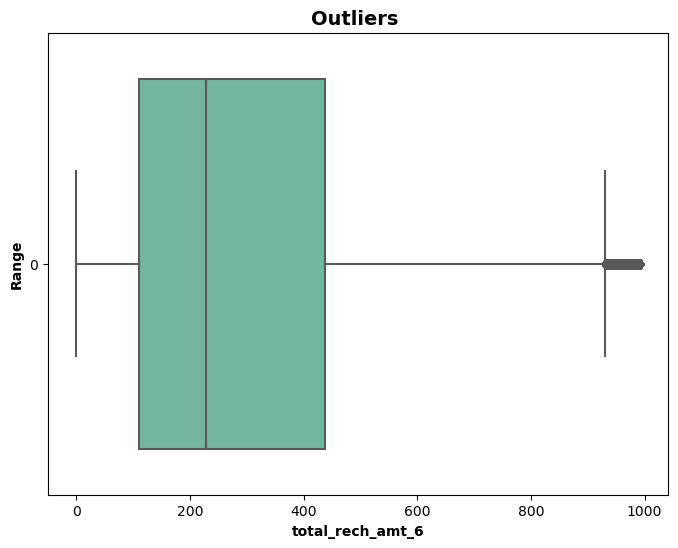

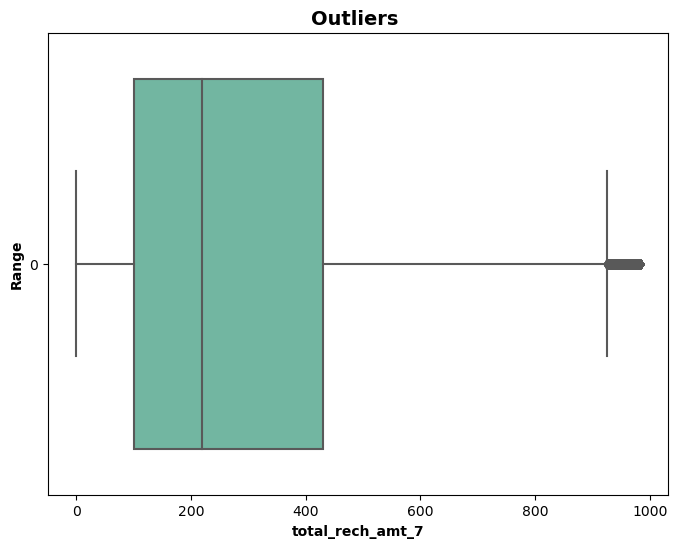

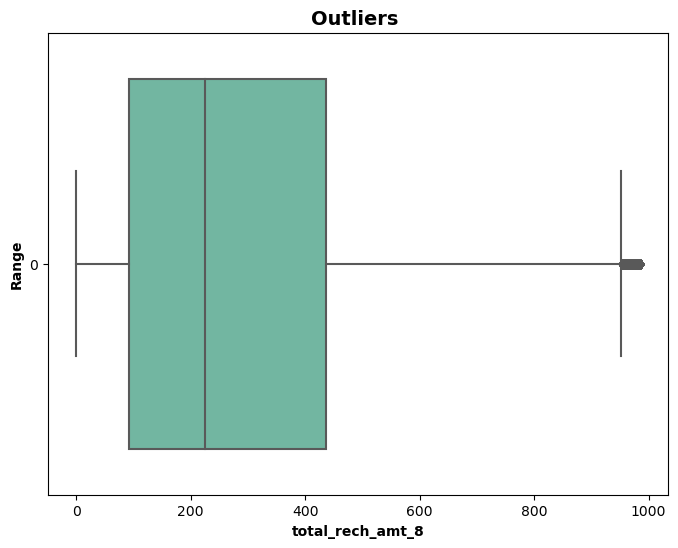

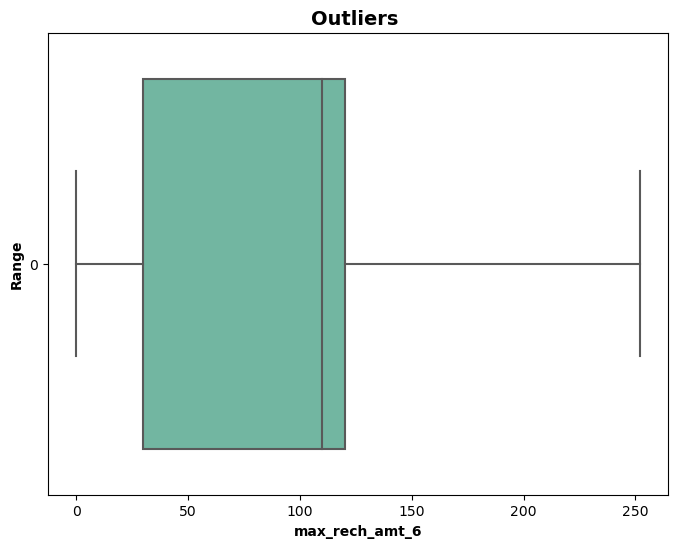

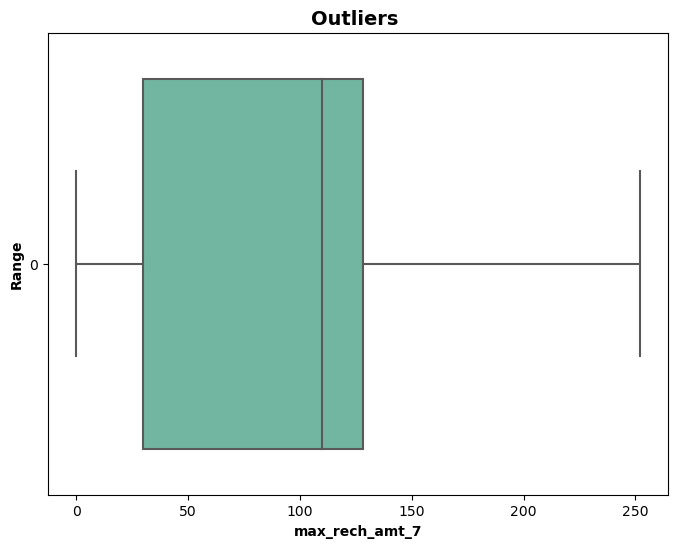

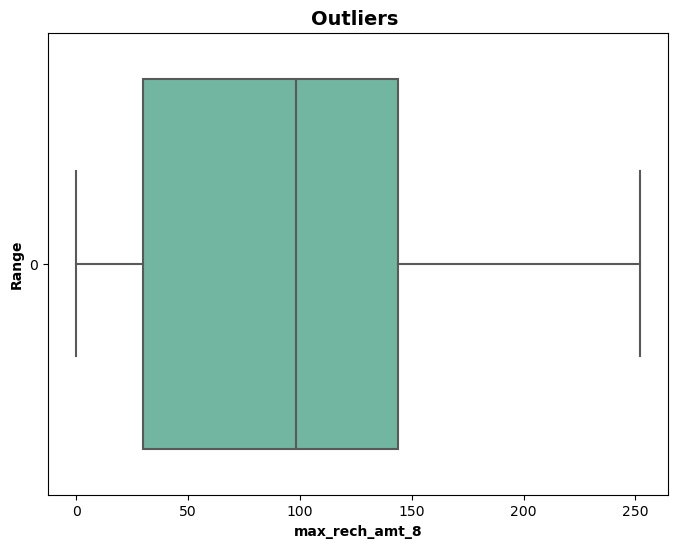

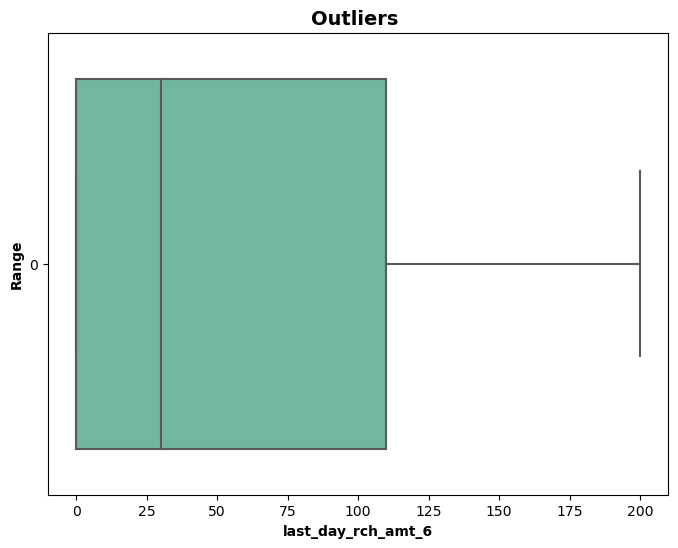

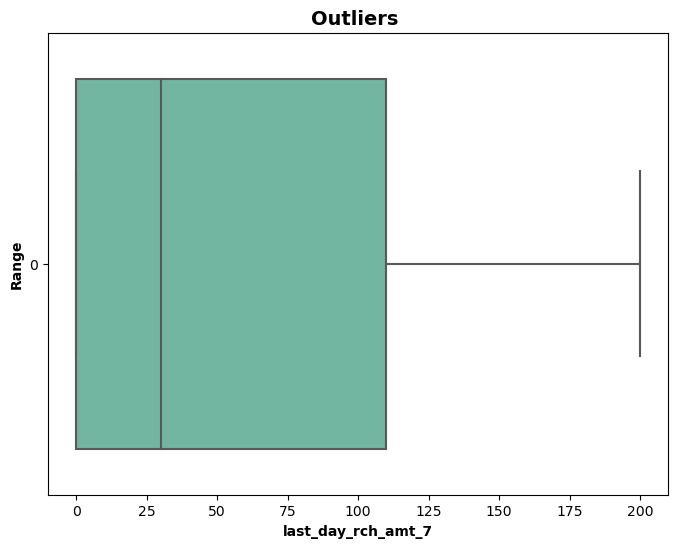

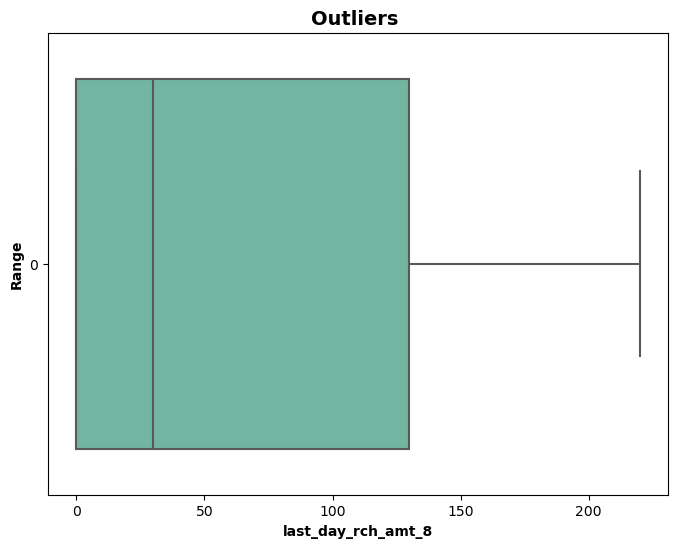

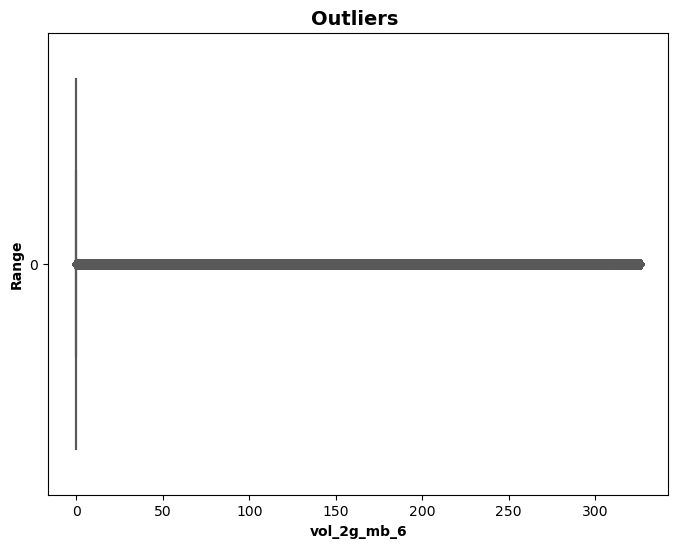

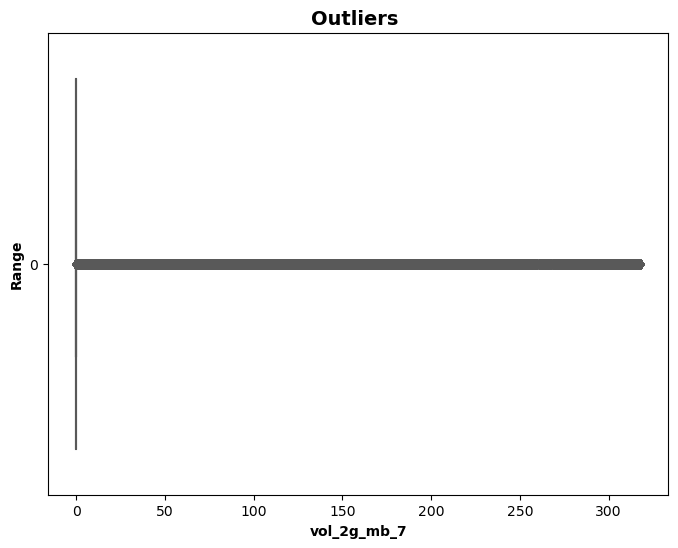

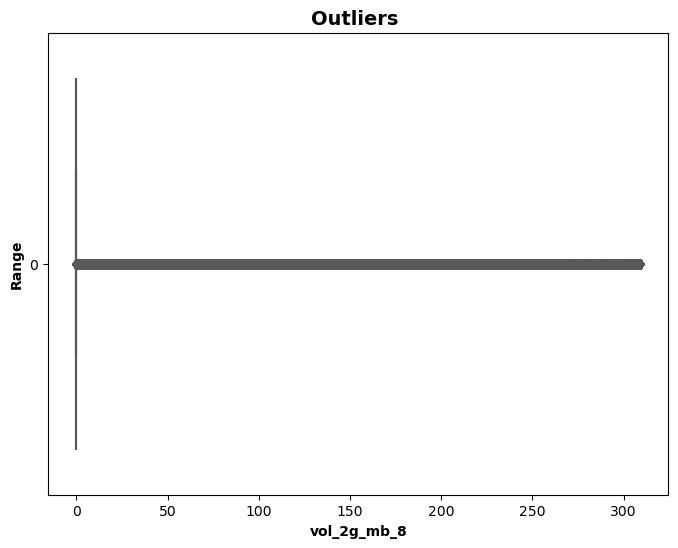

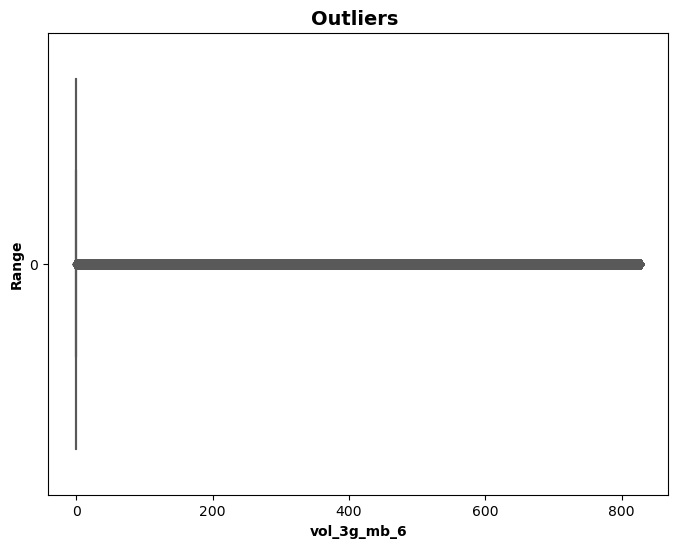

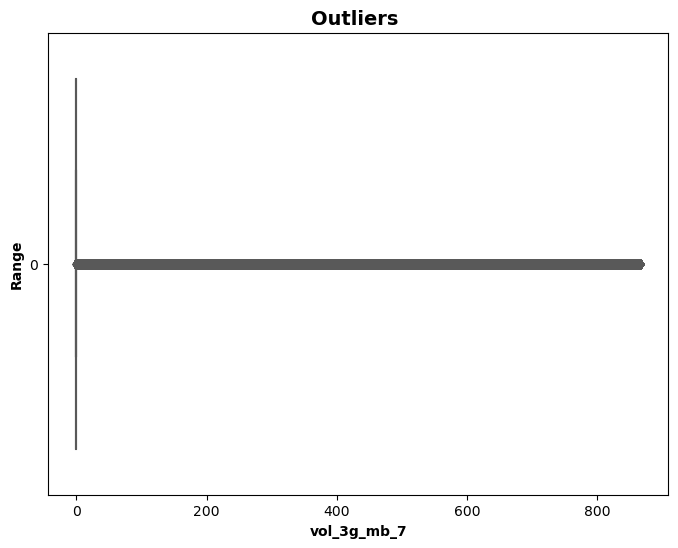

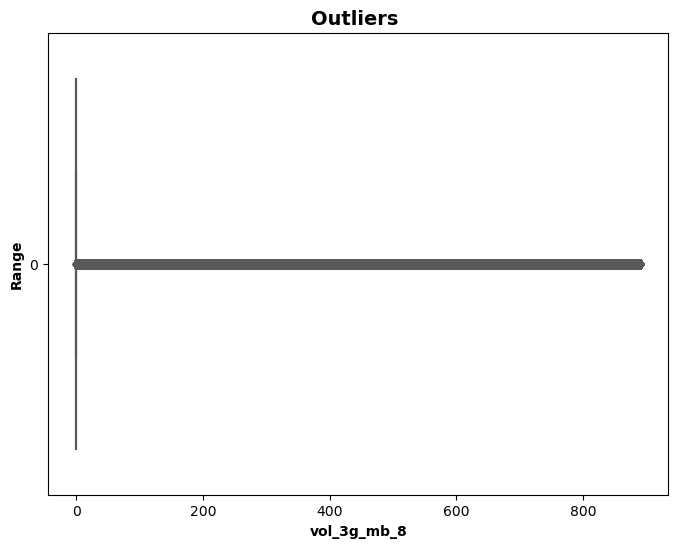

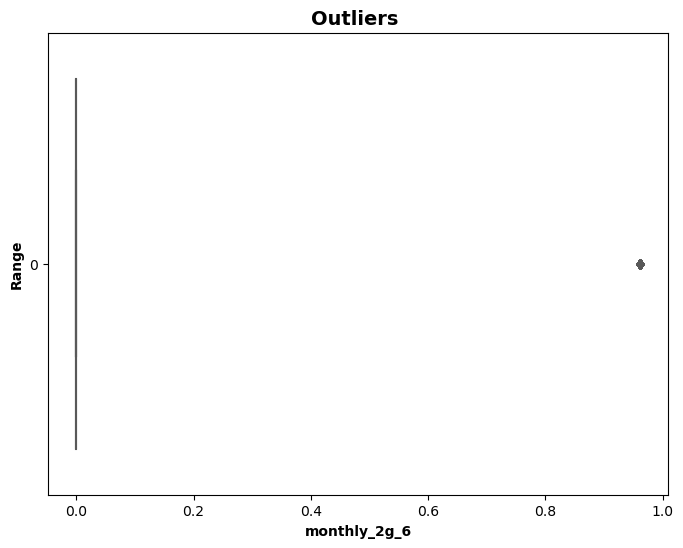

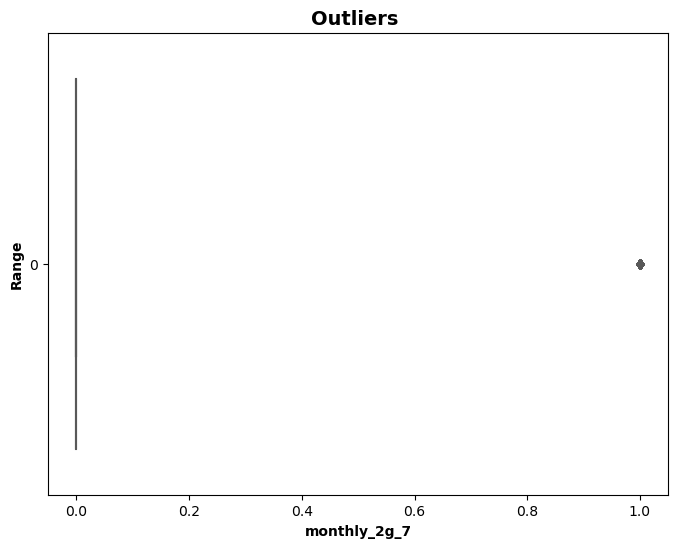

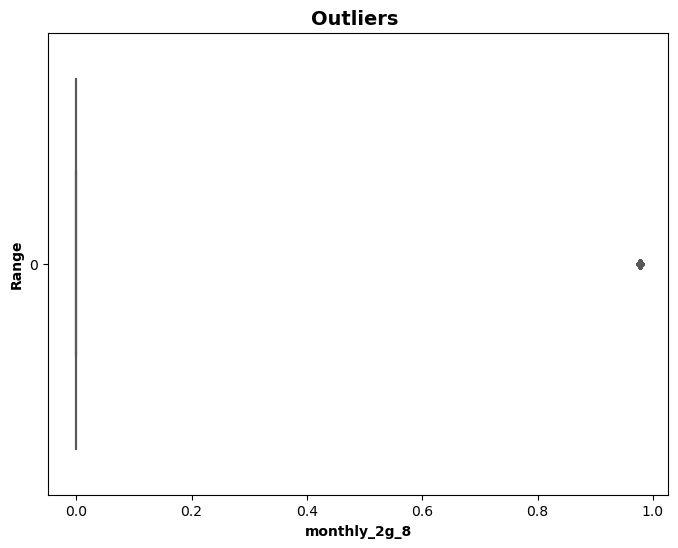

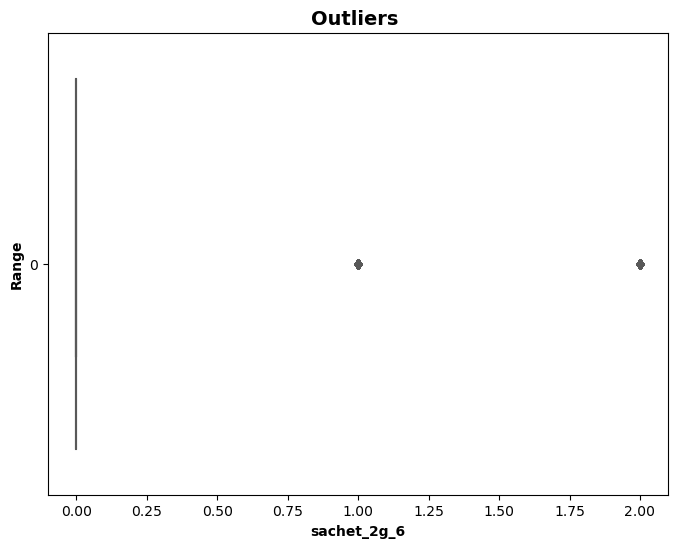

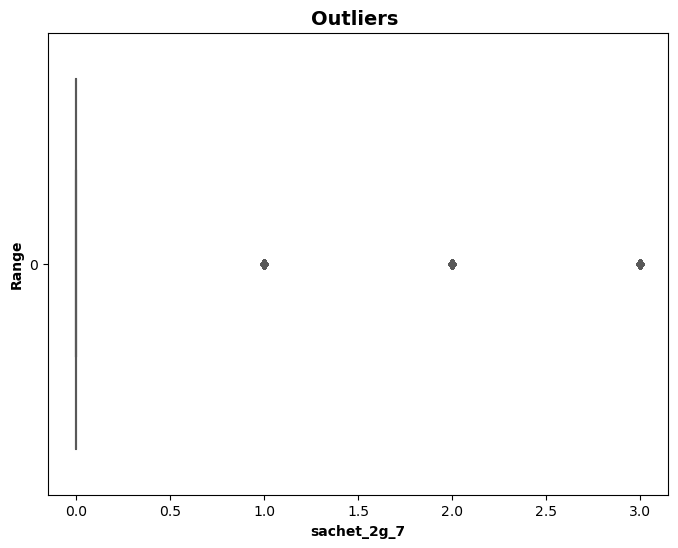

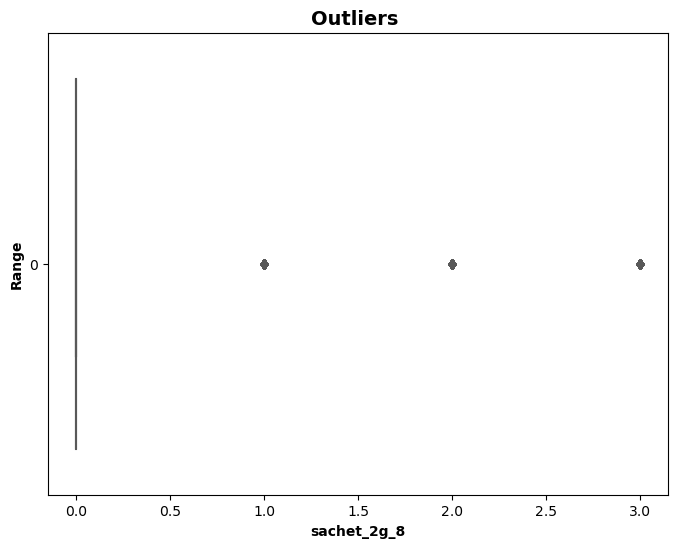

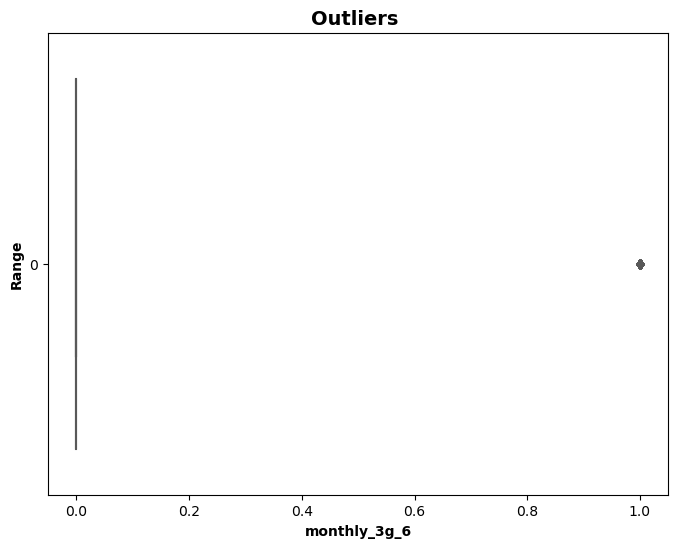

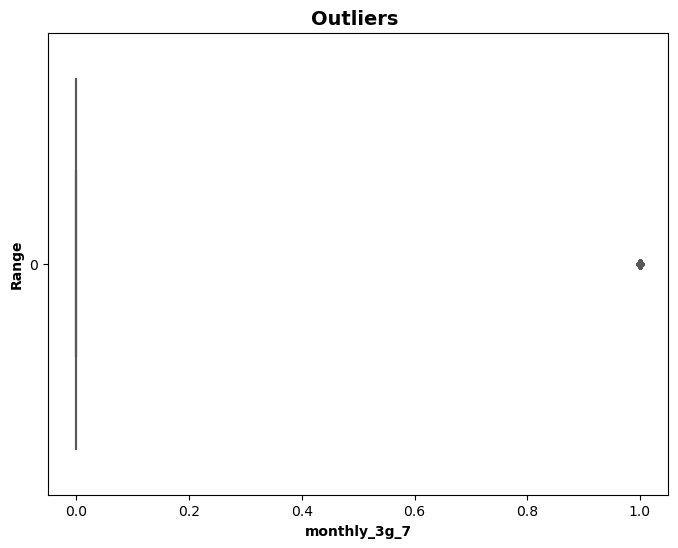

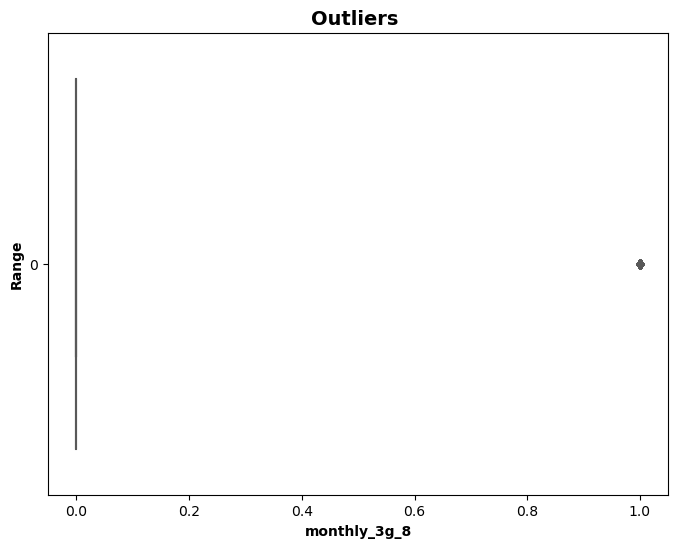

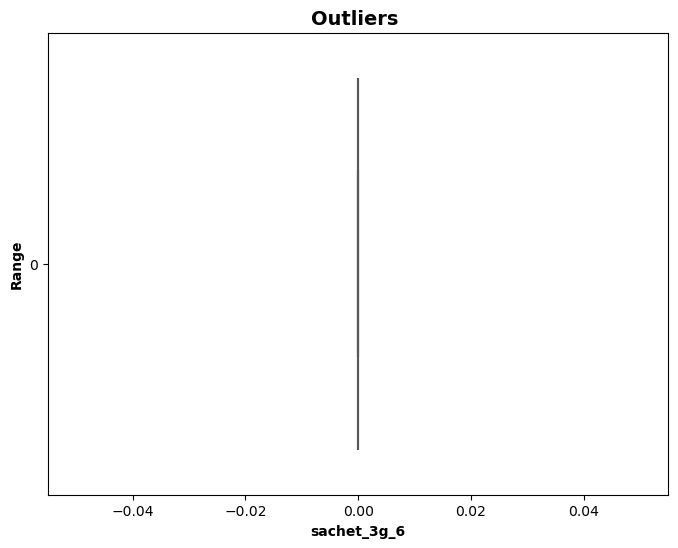

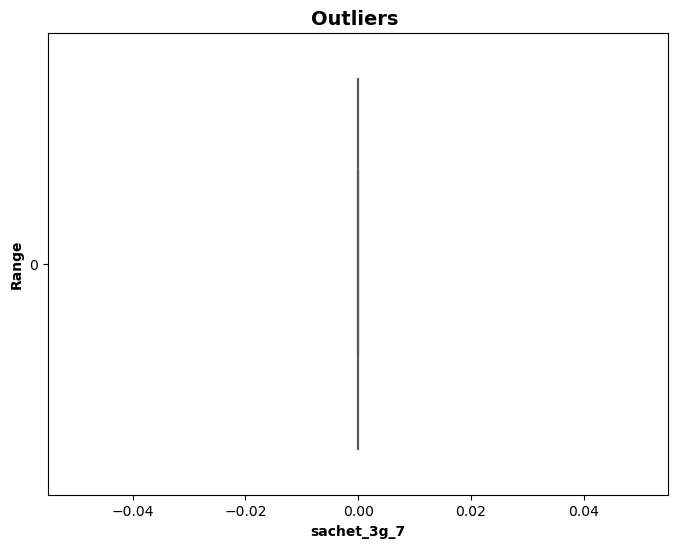

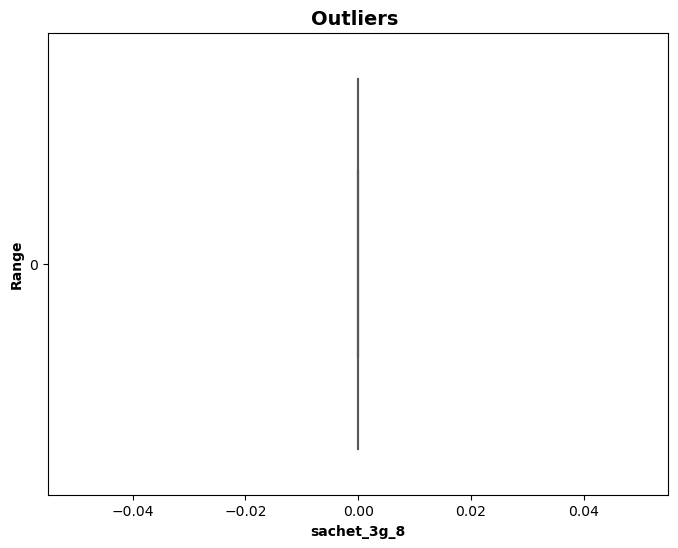

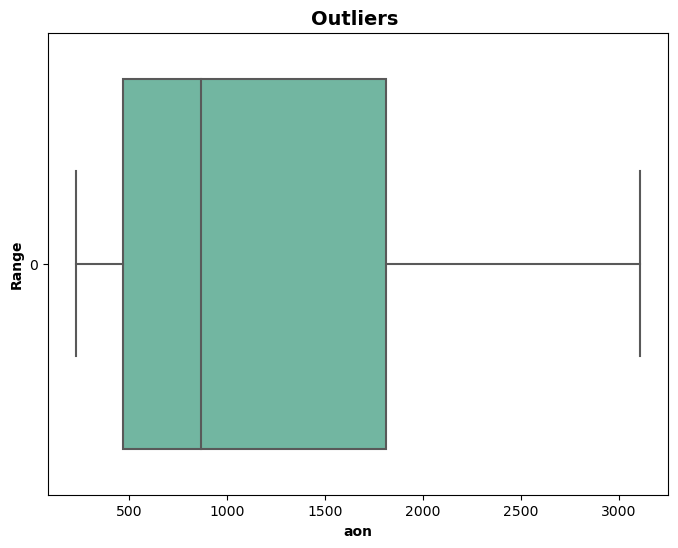

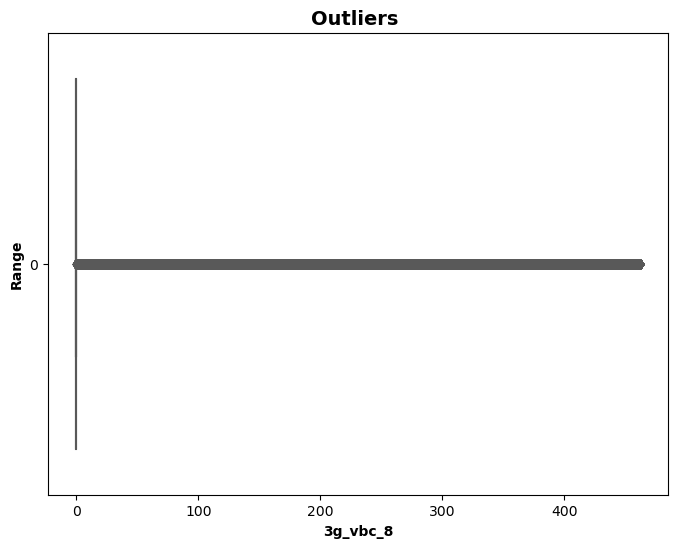

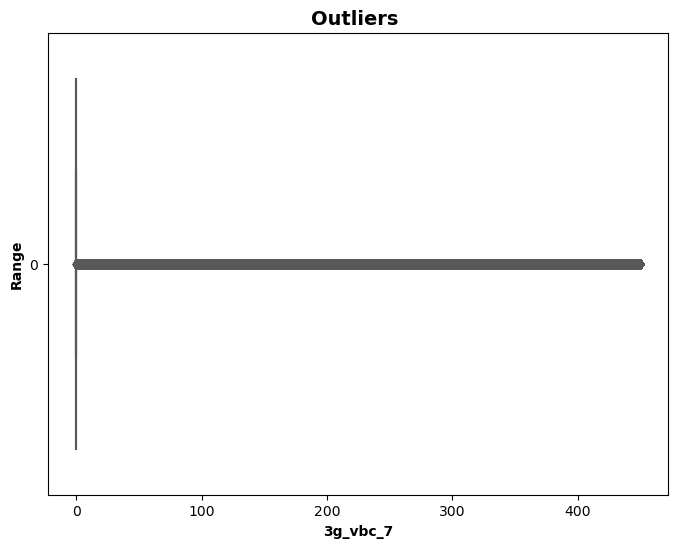

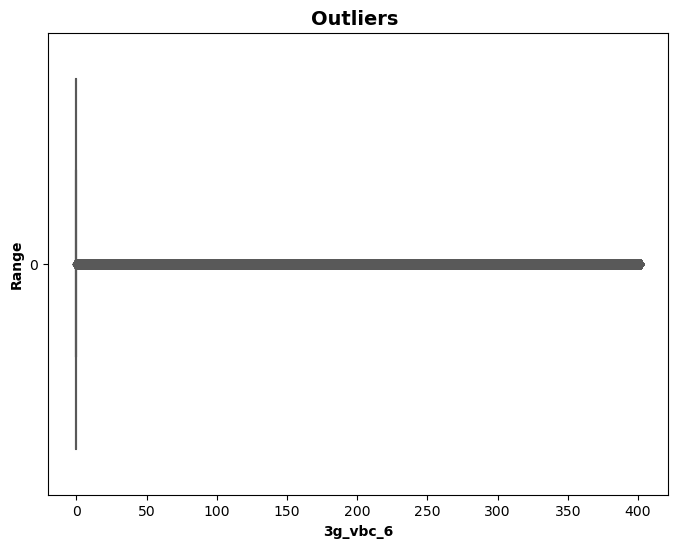

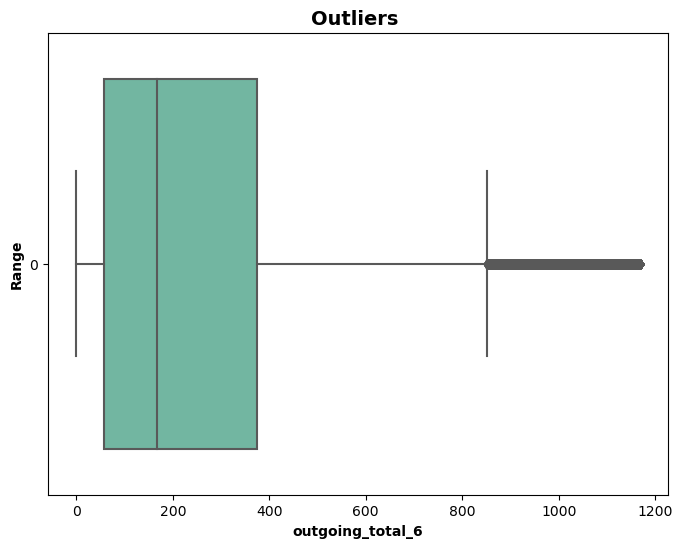

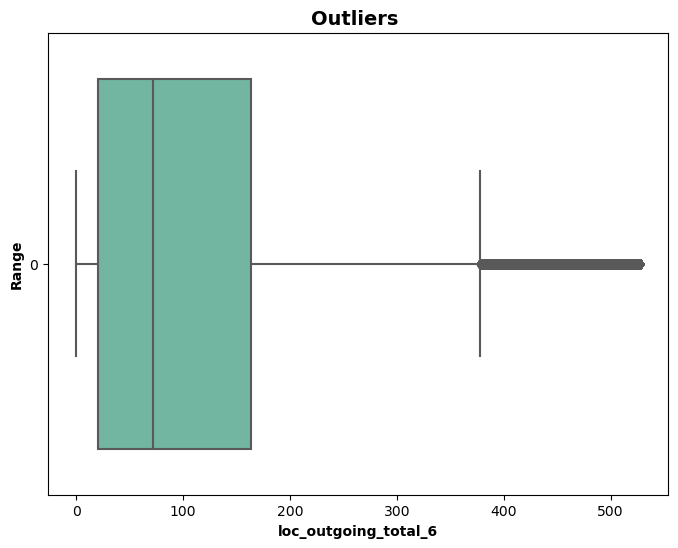

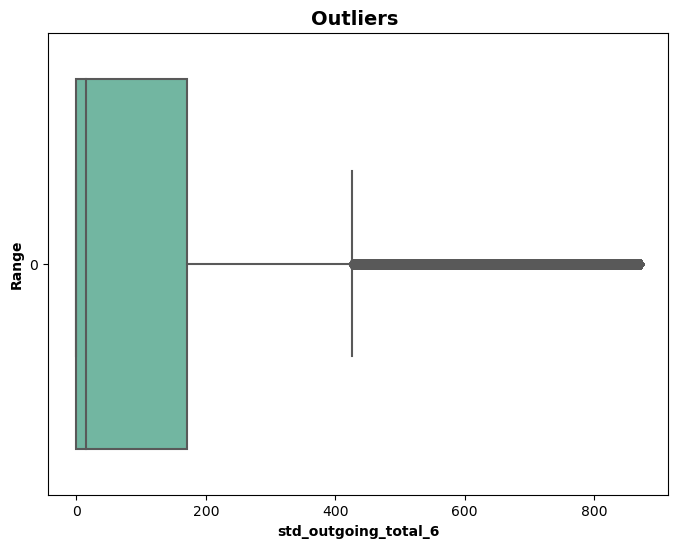

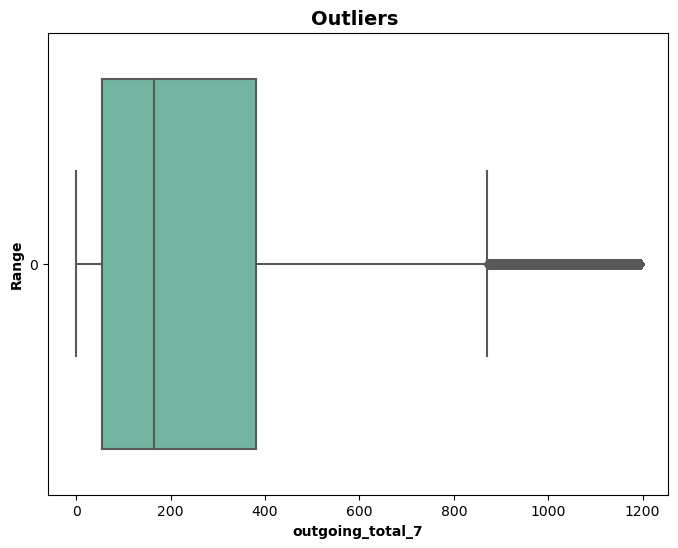

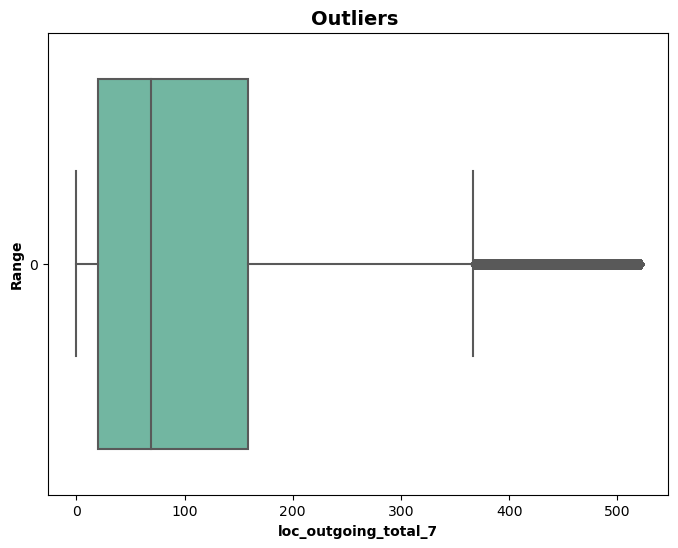

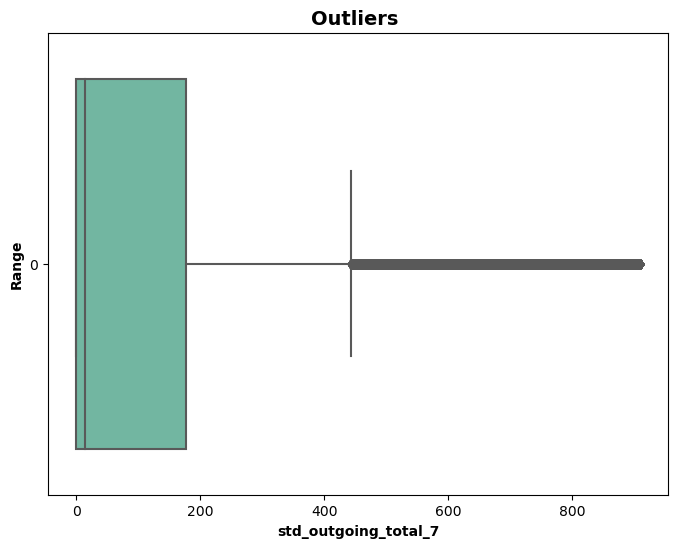

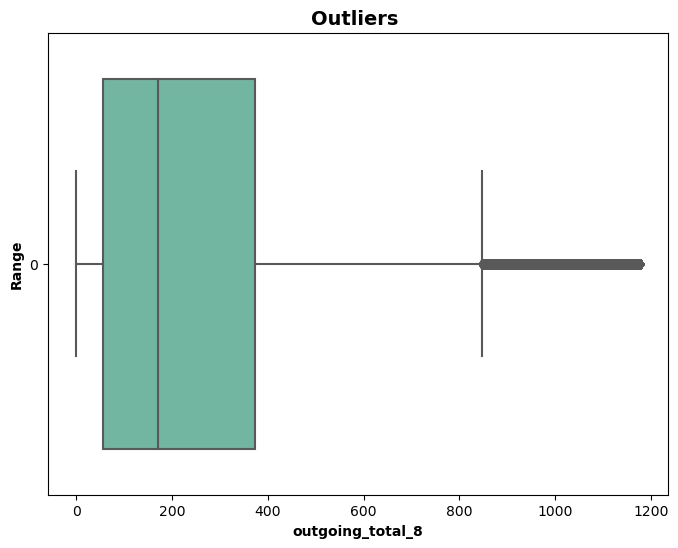

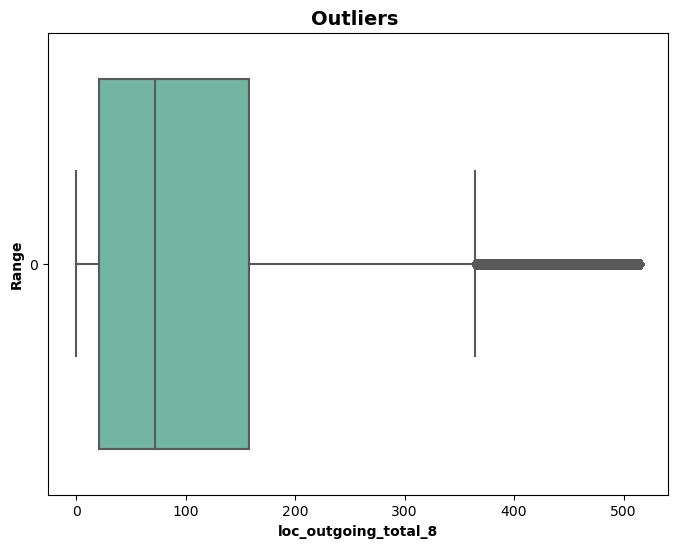

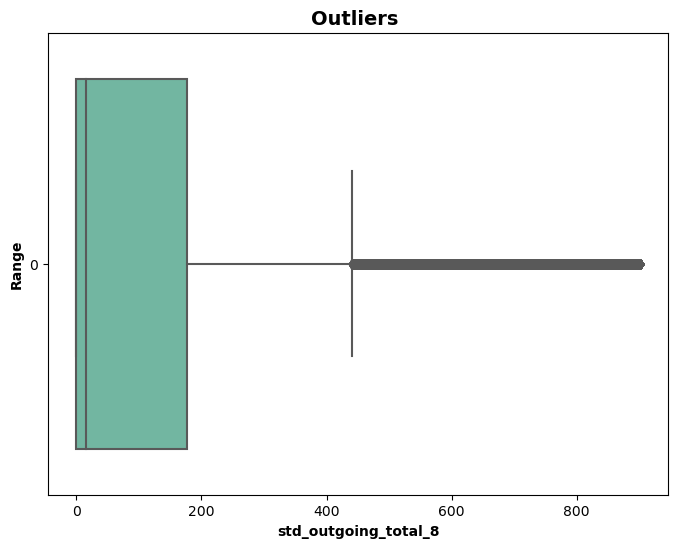

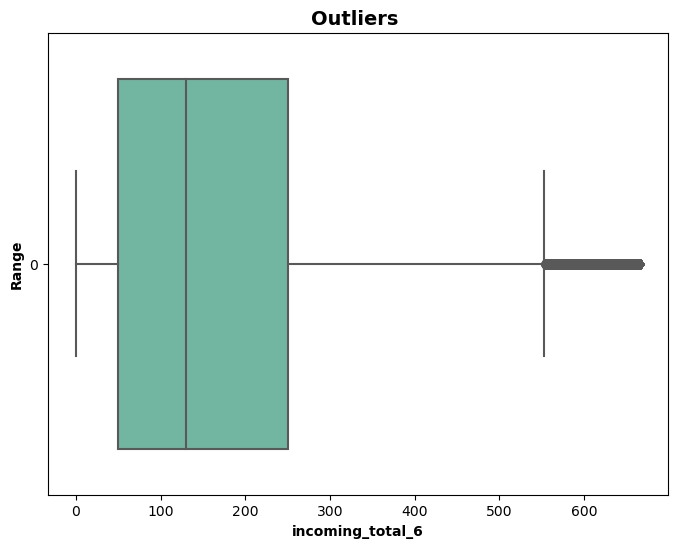

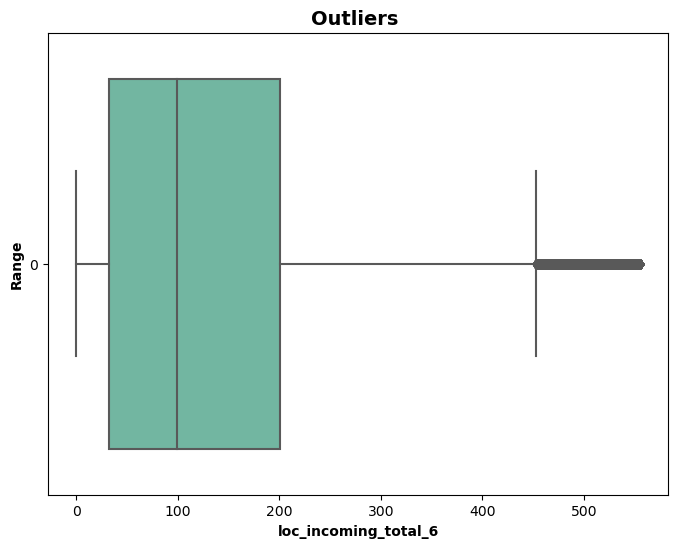

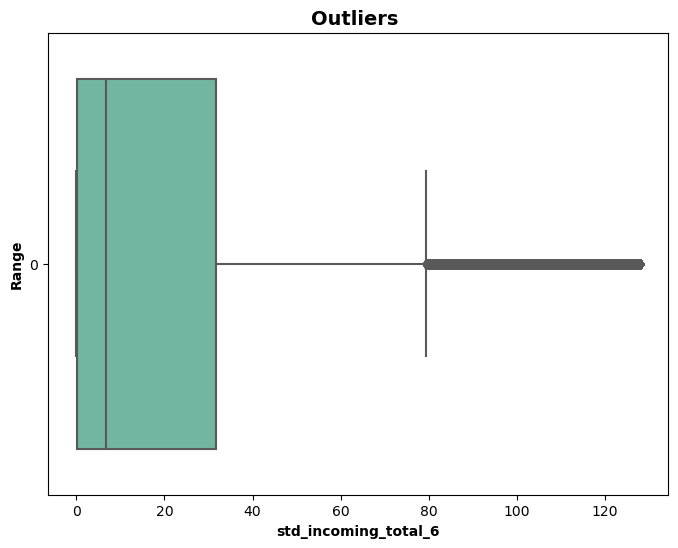

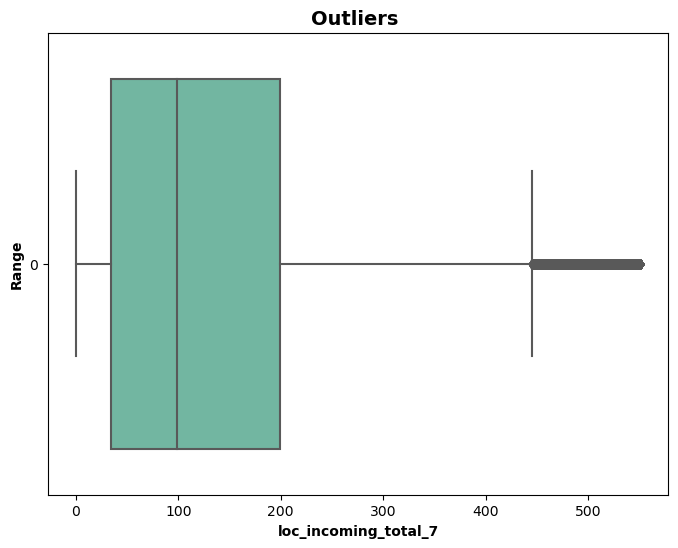

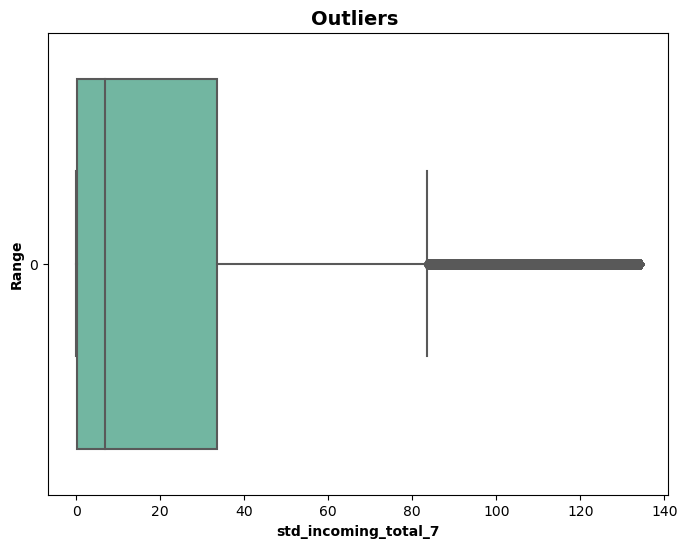

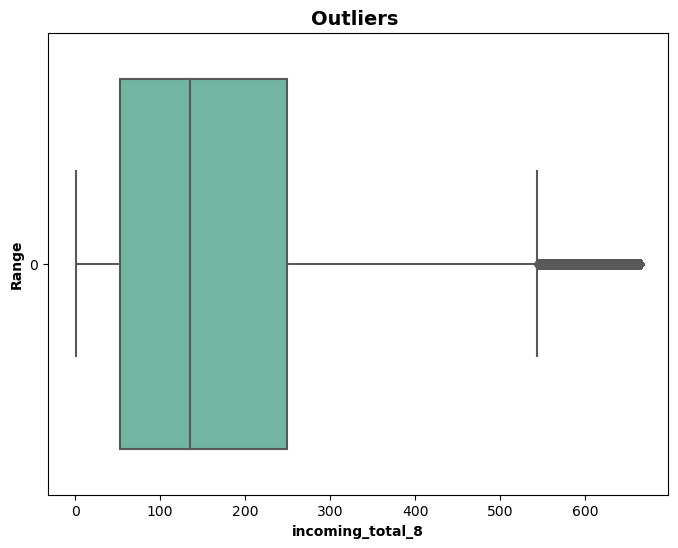

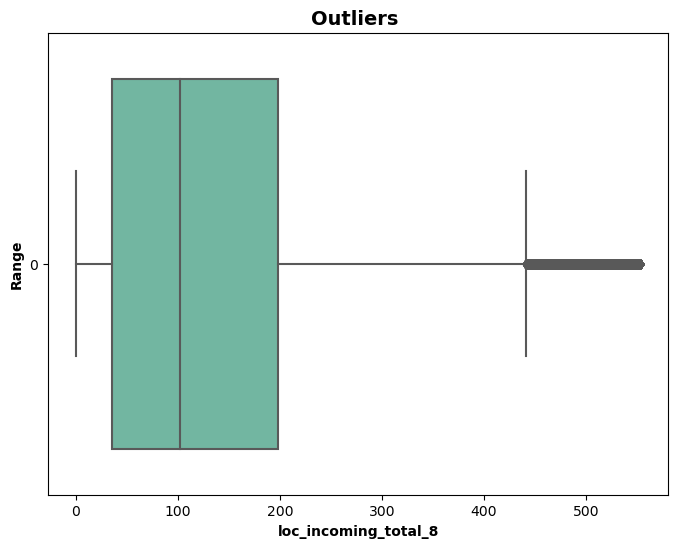

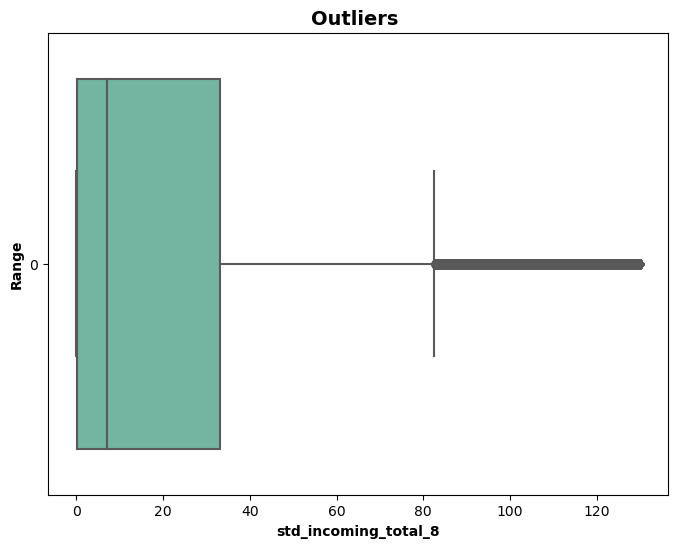

In [104]:
# Cheking whether any Outlier exists or not

for i  in df.select_dtypes(exclude = 'object').columns:
    plt.figure(figsize =(8,6))
    ax = sns.boxplot(df[i], orient="h", palette="Set2", whis = 1.5 )
    plt.title('Boxplot of '+' '+ i)
    plt.title("Outliers ", fontsize = 14, fontweight = 'bold')
    plt.ylabel("Range", fontweight = 'bold')
    plt.xlabel(i, fontweight = 'bold')
    for patch in ax.artists:
        r, g, b, a = patch.get_facecolor()
        patch.set_facecolor((r, g, b, .3))
    plt.show()

##  Data Modeling and Model Evaluation 

## `PART 1: - Non Interpretable models`

In [105]:
df.head()

id    arpu_6    arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  \
65322  65322.0  828.5544  821.8207  199.711    92.510000    43.990000   
60877  60877.0  486.8410  385.4880    9.310   594.356000   535.530000   
31092  31092.0  218.8360  299.7070  161.408    39.480000    73.760000   
6975    6975.0    1.6760    0.8180  324.948   133.142825   134.012116   
66150  66150.0  136.9030  165.8260  136.412    34.540000    58.590000   

       onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
65322         3.01    722.865000     733.69700        410.53       0.000000   
60877        17.34     28.980000      15.21000          4.98       0.000000   
31092        17.61    180.610000     233.23000        124.89       0.000000   
6975        124.63    198.824438     197.26569        364.04       9.847633   
66150        32.14     85.330000      94.39000        102.98       0.000000   

       roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  \
65322       0.000000           0.00       0.000000       0.000000   
60877       1.560000           0.69       0.000000       3.940000   
31092       0.000000           3.11       0.000000       0.000000   
6975        6.986312           0.00      14.058311       9.627721   
66150       0.000000           0.00       0.000000       0.000000   

       roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  \
65322          31.64             13.13              2.13              2.58   
60877          22.33             59.66             15.93              0.00   
31092          21.78              0.00              0.00              0.00   
6975            0.55              0.00              0.00             22.91   
66150           0.00             34.54             58.59             32.14   

       loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  \
65322            105.04             47.48              4.68               0.0   
60877             28.98             10.33              0.00               0.0   
31092              2.43             10.21             18.06               0.0   
6975               0.00              0.00             22.48               0.0   
66150             85.33             94.39            100.53               0.0   

       loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  \
65322               0.0              0.00               0.0               0.0   
60877               0.0              0.00               0.0               0.0   
31092               0.0              0.00               0.0               0.0   
6975                0.0              0.00               0.0               0.0   
66150               0.0              0.63               0.0               0.0   

       loc_og_t2c_mou_8  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  \
65322              0.00        118.18         49.61          7.26   
60877              0.48         88.64         26.26          0.00   
31092              0.00          2.43         10.21         18.06   
6975               0.00          0.00          0.00         45.39   
66150              1.81        119.88        152.99        133.31   

       std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  \
65322             79.38            41.860              0.00           453.114   
60877            449.31           482.395              0.00             0.000   
31092             39.48            73.760             13.73           178.140   
6975               0.00             0.000            101.71             0.000   
66150              0.00             0.000              0.00             0.000   

       std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  \
65322           474.849            374.63               0.0               0.0   
60877             3.110              0.00               0.0               0.0   
31092           222.980             88.93               0.0               0.0   
6975          

In [106]:
df.shape

(55999, 142)

In [107]:
X_train = df

### 4) Feature scaling

In [108]:
print("Glimpse of Feature variables train dataset - x_train:")
X_train.head()

Glimpse of Feature variables train dataset - x_train:


id    arpu_6    arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  \
65322  65322.0  828.5544  821.8207  199.711    92.510000    43.990000   
60877  60877.0  486.8410  385.4880    9.310   594.356000   535.530000   
31092  31092.0  218.8360  299.7070  161.408    39.480000    73.760000   
6975    6975.0    1.6760    0.8180  324.948   133.142825   134.012116   
66150  66150.0  136.9030  165.8260  136.412    34.540000    58.590000   

       onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
65322         3.01    722.865000     733.69700        410.53       0.000000   
60877        17.34     28.980000      15.21000          4.98       0.000000   
31092        17.61    180.610000     233.23000        124.89       0.000000   
6975        124.63    198.824438     197.26569        364.04       9.847633   
66150        32.14     85.330000      94.39000        102.98       0.000000   

       roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  \
65322       0.000000           0.00       0.000000       0.000000   
60877       1.560000           0.69       0.000000       3.940000   
31092       0.000000           3.11       0.000000       0.000000   
6975        6.986312           0.00      14.058311       9.627721   
66150       0.000000           0.00       0.000000       0.000000   

       roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  \
65322          31.64             13.13              2.13              2.58   
60877          22.33             59.66             15.93              0.00   
31092          21.78              0.00              0.00              0.00   
6975            0.55              0.00              0.00             22.91   
66150           0.00             34.54             58.59             32.14   

       loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  \
65322            105.04             47.48              4.68               0.0   
60877             28.98             10.33              0.00               0.0   
31092              2.43             10.21             18.06               0.0   
6975               0.00              0.00             22.48               0.0   
66150             85.33             94.39            100.53               0.0   

       loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  \
65322               0.0              0.00               0.0               0.0   
60877               0.0              0.00               0.0               0.0   
31092               0.0              0.00               0.0               0.0   
6975                0.0              0.00               0.0               0.0   
66150               0.0              0.63               0.0               0.0   

       loc_og_t2c_mou_8  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  \
65322              0.00        118.18         49.61          7.26   
60877              0.48         88.64         26.26          0.00   
31092              0.00          2.43         10.21         18.06   
6975               0.00          0.00          0.00         45.39   
66150              1.81        119.88        152.99        133.31   

       std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  \
65322             79.38            41.860              0.00           453.114   
60877            449.31           482.395              0.00             0.000   
31092             39.48            73.760             13.73           178.140   
6975               0.00             0.000            101.71             0.000   
66150              0.00             0.000              0.00             0.000   

       std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  \
65322           474.849            374.63               0.0               0.0   
60877             3.110              0.00               0.0               0.0   
31092           222.980             88.93               0.0               0.0   
6975          

In [109]:
X_test.head()

id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
62003  62003             0.0             0.0             0.0   
59505  59505             0.0             0.0             0.0   
19580  19580             0.0             0.0             0.0   
69595  69595             0.0             0.0             0.0   
39241  39241             0.0             0.0             0.0   

      last_date_of_month_6 last_date_of_month_7 last_date_of_month_8   arpu_6  \
62003            6/30/2014            7/31/2014            8/31/2014    0.000   
59505            6/30/2014            7/31/2014            8/31/2014   87.656   
19580            6/30/2014            7/31/2014            8/31/2014  127.345   
69595            6/30/2014            7/31/2014            8/31/2014  222.564   
39241            6/30/2014            7/31/2014            8/31/2014  166.114   

        arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
62003    0.000  309.577          NaN         0.00       654.81           NaN   
59505  100.224   85.283        25.23        39.04         0.60         46.54   
19580  364.576  498.021       150.66       806.76       773.31         20.13   
69595  169.122    0.000        37.03         5.29          NaN        154.76   
39241   52.830  408.122        10.96         0.00        56.51        114.78   

       offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
62003          0.00         64.53            NaN           0.00   
59505         23.49         43.71           0.00           0.00   
19580        171.74        101.66          76.84           0.00   
69595        211.19           NaN           0.00           0.00   
39241          0.00        524.16           0.00           3.41   

       roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
62003            0.0            NaN           0.00            0.0   
59505            0.0           0.00           0.00            0.0   
19580            0.0         170.79           4.26            0.0   
69595            NaN           0.00           0.00            NaN   
39241            0.0           0.00           0.00            0.0   

       loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
62003               NaN              0.00              0.00               NaN   
59505             25.23             39.04              0.60             46.54   
19580              0.00            139.76             94.38              0.00   
69595             19.54              0.00               NaN              4.23   
39241              6.75              0.00              9.63             13.91   

       loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
62003              0.00              5.56               NaN               0.0   
59505             23.49             43.71              0.00               0.0   
19580            106.46             61.74              0.00               0.0   
69595            126.16               NaN              0.00               0.0   
39241              0.00             49.86              2.08               0.0   

       loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
62003              0.00               NaN              0.00              0.00   
59505              0.00              0.00              0.00              0.00   
19580              0.00              2.40              2.66              1.53   
69595               NaN              0.18              1.93               NaN   
39241              3.23              0.00              0.00              0.00   

       loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
62003           NaN          0.00          5.56               NaN   
59505         71.78         62.54         44.31              0.00   
19580          0.00        246.23        156.13              0.00   
69595         23.78        126.16           NaN             17.48   
39241         22.75          0.00

In [110]:
X_train.columns

Index(['id', 'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       ...
       'loc_outgoing_total_8', 'std_outgoing_total_8', 'incoming_total_6',
       'loc_incoming_total_6', 'std_incoming_total_6', 'loc_incoming_total_7',
       'std_incoming_total_7', 'incoming_total_8', 'loc_incoming_total_8',
       'std_incoming_total_8'],
      dtype='object', length=142)

In [111]:
X_test.columns

Index(['id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'arpu_6', 'arpu_7', 'arpu_8',
       ...
       'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8', 'fb_user_6', 'fb_user_7',
       'fb_user_8', 'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g'],
      dtype='object', length=170)

In [112]:
train_columns = X_train.columns.tolist()
# get the test data set columns
test_columns = X_test.columns.tolist()
# get the difference between the test and train columns
extra_columns = list(set(test_columns) - set(train_columns))
# drop the extra columns from the test data set
X_test = X_test.drop(extra_columns, axis=1)

In [113]:
# There are some columns representing volume based users have month specified in their name, while all other columns have used numbers `6,7,8,9` indicating month name
month = ['aug_vbc_3g','jul_vbc_3g','jun_vbc_3g','sep_vbc_3g']
X_test = X_test.rename(columns = {'aug_vbc_3g':'3g_vbc_8','jul_vbc_3g':'3g_vbc_7','jun_vbc_3g':'3g_vbc_6','sep_vbc_3g':'3g_vbc_9'})

In [114]:
# reindex the test data with the train data columns
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

In [115]:
print(X_train.shape)
print(X_test.shape)

(55999, 142)
(14000, 142)


In [116]:
X_train = X_train.select_dtypes(include=np.number)

In [117]:
X_test = X_test.select_dtypes(include=np.number)

In [118]:
num_var = X_train.select_dtypes(exclude='object')
num_col = num_var.columns

In [119]:
## Scaling the train and test data
scale = StandardScaler()
X_train[num_col] = scale.fit_transform(X_train[num_col])
X_test[num_col] = scale.fit_transform(X_test[num_col])
X_train.head()

id    arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
65322  1.524491  2.514928  2.511011 -0.255205    -0.085172    -0.386781   
60877  1.301303  0.996288  0.568471 -1.093055     3.125200     2.679700   
31092 -0.194230 -0.194777  0.186576 -0.423755    -0.424412    -0.201060   
6975  -1.405168 -1.159877 -1.144069  0.295895     0.174761     0.174824   
66150  1.566066 -0.558903 -0.409458 -0.533749    -0.456014    -0.295699   

       onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
65322    -0.654208      2.852464      2.872399      1.244478      -0.390189   
60877    -0.562456     -0.750472     -0.799849     -0.866005      -0.390189   
31092    -0.560727      0.036853      0.314469     -0.241993      -0.390189   
6975      0.124496      0.131430      0.130653      1.002544       0.636333   
66150    -0.467695     -0.457880     -0.395154     -0.356013      -0.390189   

       roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  \
65322      -0.371511      -0.383790      -0.390937      -0.361950   
60877      -0.080330      -0.256187      -0.390937       0.036867   
31092      -0.371511       0.191350      -0.390937      -0.361950   
6975        0.932517      -0.383790       0.465432       0.612594   
66150      -0.371511      -0.383790      -0.390937      -0.361950   

       roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  \
65322       2.933615         -0.389818         -0.625062         -0.611513   
60877       1.961427          0.614696         -0.321238         -0.668971   
31092       1.903993         -0.673275         -0.671957         -0.668971   
6975       -0.312930         -0.673275         -0.671957         -0.158758   
66150      -0.370364          0.072392          0.617977          0.046797   

       loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  \
65322          0.296190         -0.292897         -0.743338         -0.487535   
60877         -0.496069         -0.691602         -0.793395         -0.487535   
31092         -0.772620         -0.692890         -0.600227         -0.487535   
6975          -0.797932         -0.802467         -0.552951         -0.487535   
66150          0.090886          0.210556          0.281865         -0.487535   

       loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  \
65322         -0.484993         -0.483263         -0.369558         -0.380597   
60877         -0.484993         -0.483263         -0.369558         -0.380597   
31092         -0.484993         -0.483263         -0.369558         -0.380597   
6975          -0.484993         -0.483263         -0.369558         -0.380597   
66150         -0.484993         -0.346724         -0.369558         -0.380597   

       loc_og_t2c_mou_8  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  \
65322         -0.386079      0.005112     -0.461751     -0.752873   
60877         -0.140309     -0.199179     -0.626065     -0.804268   
31092         -0.386079     -0.795384     -0.739010     -0.676418   
6975          -0.386079     -0.812189     -0.810858     -0.482943   
66150          0.540680      0.016869      0.265738      0.139460   

       std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  \
65322          0.227554         -0.109513         -0.440907          3.281460   
60877          3.371139          3.399931         -0.440907         -0.502205   
31092         -0.111508          0.144612         -0.328440          0.985329   
6975          -0.447000         -0.442984          0.392234         -0.502205   
66150         -0.447000         -0.442984         -0.440907         -0.502205   

       std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  \
65322          3.274402          2.526797         -0.307978         -0.301695   
60877         -0.473559         -0.491958         -0.307978         -0.301695   
31092          1.273306          0.224637         -0.307978         -0.301695   
697

In [120]:
num_var = X_test.select_dtypes(exclude='object')
num_col = num_var.columns

## Applying PCA

        In the exploratory data analaysis we saw that some columns have significant correlation among themselves. This collinearity can hamper our interpretations. Principal component analysis (PCA) is one of the most commonly used dimensionality reduction techniques in the industry. So let us adopt PCA to solve this problem. PCA will also help in dimensionality reduction.

In [121]:
#Improting the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized',random_state = 42)

In [122]:
#Performing PCA on the train data
pca.fit(X_train)

PCA(random_state=42, svd_solver='randomized')

In [123]:
# Let us observe pricipal components created
print("The Principal components are:")
pca.components_

The Principal components are:


array([[ 8.41567192e-04,  1.35237407e-01,  1.44482107e-01, ...,
         1.33248600e-01,  1.28379456e-01,  6.63413240e-02],
       [ 2.56391232e-04,  5.99961702e-02,  7.69827222e-02, ...,
        -9.21191101e-02, -1.23425486e-01,  6.33319155e-02],
       [-9.17358886e-06, -6.59147402e-02, -7.45979505e-02, ...,
         1.14230763e-01,  3.04511620e-02,  2.60593329e-01],
       ...,
       [-0.00000000e+00, -3.00521234e-17,  1.05943417e-16, ...,
        -1.33304850e-15,  1.54583068e-15, -5.62770678e-16],
       [-0.00000000e+00, -2.53942161e-17, -4.51232580e-17, ...,
         1.67823614e-15, -3.84561060e-15, -1.47472260e-16],
       [ 0.00000000e+00, -1.37661910e-16, -1.15028556e-16, ...,
        -1.29341309e-14,  2.25236270e-14, -4.59367932e-15]])

In [124]:
# Let us also look at the variance ratio
var_ratio = np.round((pca.explained_variance_ratio_) * 100,2)
var_ratio

array([2.017e+01, 1.156e+01, 5.610e+00, 5.370e+00, 3.560e+00, 3.470e+00,
       2.640e+00, 2.380e+00, 2.210e+00, 2.040e+00, 1.870e+00, 1.800e+00,
       1.580e+00, 1.550e+00, 1.410e+00, 1.290e+00, 1.240e+00, 1.180e+00,
       1.080e+00, 9.500e-01, 9.000e-01, 8.800e-01, 8.500e-01, 8.100e-01,
       7.900e-01, 7.700e-01, 7.600e-01, 7.500e-01, 7.400e-01, 7.000e-01,
       6.900e-01, 6.600e-01, 6.300e-01, 6.200e-01, 6.100e-01, 5.600e-01,
       5.100e-01, 4.900e-01, 4.800e-01, 4.700e-01, 4.600e-01, 4.600e-01,
       4.500e-01, 4.300e-01, 4.100e-01, 4.000e-01, 4.000e-01, 3.800e-01,
       3.800e-01, 3.800e-01, 3.600e-01, 3.600e-01, 3.500e-01, 3.400e-01,
       3.200e-01, 3.100e-01, 3.000e-01, 2.800e-01, 2.800e-01, 2.700e-01,
       2.600e-01, 2.400e-01, 2.300e-01, 2.300e-01, 2.300e-01, 2.200e-01,
       2.100e-01, 2.000e-01, 2.000e-01, 1.900e-01, 1.900e-01, 1.800e-01,
       1.800e-01, 1.800e-01, 1.800e-01, 1.700e-01, 1.700e-01, 1.600e-01,
       1.500e-01, 1.400e-01, 1.400e-01, 1.300e-01, 

In [125]:
var_cum = np.cumsum(var_ratio)
var_cum

array([ 20.17,  31.73,  37.34,  42.71,  46.27,  49.74,  52.38,  54.76,
        56.97,  59.01,  60.88,  62.68,  64.26,  65.81,  67.22,  68.51,
        69.75,  70.93,  72.01,  72.96,  73.86,  74.74,  75.59,  76.4 ,
        77.19,  77.96,  78.72,  79.47,  80.21,  80.91,  81.6 ,  82.26,
        82.89,  83.51,  84.12,  84.68,  85.19,  85.68,  86.16,  86.63,
        87.09,  87.55,  88.  ,  88.43,  88.84,  89.24,  89.64,  90.02,
        90.4 ,  90.78,  91.14,  91.5 ,  91.85,  92.19,  92.51,  92.82,
        93.12,  93.4 ,  93.68,  93.95,  94.21,  94.45,  94.68,  94.91,
        95.14,  95.36,  95.57,  95.77,  95.97,  96.16,  96.35,  96.53,
        96.71,  96.89,  97.07,  97.24,  97.41,  97.57,  97.72,  97.86,
        98.  ,  98.13,  98.26,  98.38,  98.49,  98.6 ,  98.7 ,  98.8 ,
        98.9 ,  98.99,  99.07,  99.15,  99.23,  99.3 ,  99.37,  99.44,
        99.51,  99.56,  99.6 ,  99.64,  99.68,  99.71,  99.74,  99.77,
        99.8 ,  99.83,  99.86,  99.88,  99.9 ,  99.92,  99.94,  99.96,
      

#### Making a scree plot for the explained variance

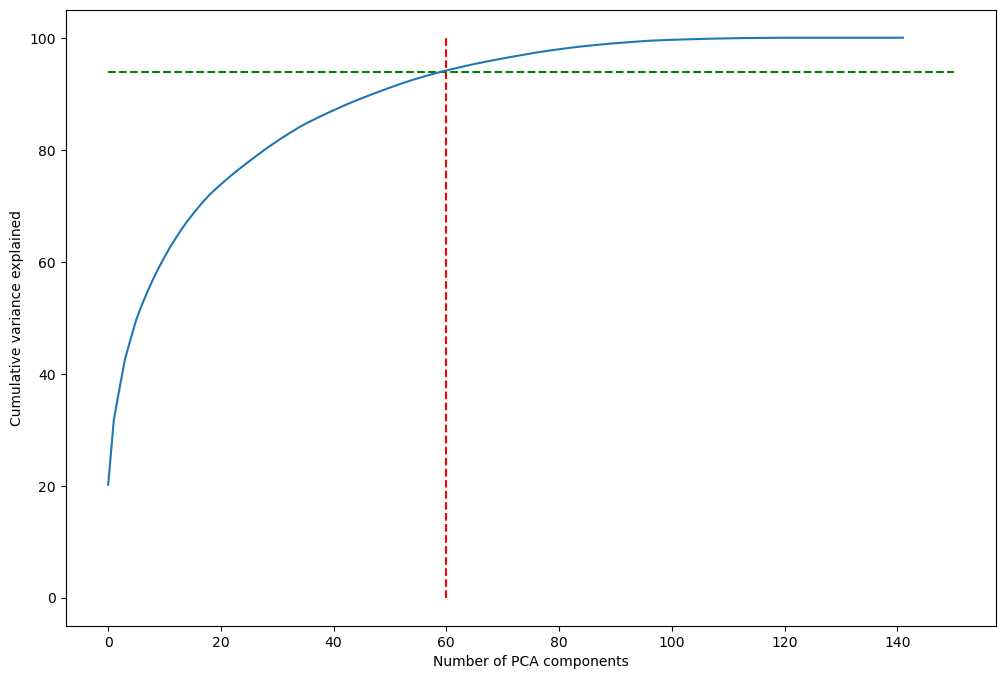

In [126]:
fig = plt.figure(figsize=[12,8])
plt.vlines(x=60, ymax=100, ymin=0, colors="r", linestyles="--")
plt.hlines(y=94, xmax=150, xmin=0, colors="g", linestyles="--")
plt.plot(var_cum)
plt.xlabel('Number of PCA components')
plt.ylabel("Cumulative variance explained")
plt.show()

## Adopting Incremental PCA 

Let us Build the dataframe using Incremental PCA for better efficiency.


In [127]:
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components = 60)

X_train_pca = pca_final.fit_transform(X_train)

In [128]:
print("Size of earlier dataset was :",X_train.shape)
print("Size of dataset after PCA is:", X_train_pca.shape)

Size of earlier dataset was : (55999, 142)
Size of dataset after PCA is: (55999, 60)


In [129]:
#creating correlation matrix for the given data
corrmat = np.corrcoef(X_train_pca.transpose())

#Make a diagonal matrix with diagonal entry of Matrix corrmat
p = np.diagflat(corrmat.diagonal())

# subtract diagonal entries making all diagonals 0
corrmat_diag_zero = corrmat - p
print("max positive corr:",round(corrmat_diag_zero.max(),3), ", min negative corr: ", round(corrmat_diag_zero.min(),3))

max positive corr: 0.007 , min negative corr:  -0.004


In [ ]:
X_test.fillna(X_test.mean())

In [ ]:
X_test_pca = pca_final.transform(X_test)
X_test_pca.shape

### 7) Model Building <br>

Let us now build various models on this PCA Transformed dataset to predict churn

## <a> Model1- PCA and Logistic Regression

In [389]:
from sklearn.linear_model import LogisticRegression

# Make an instance of the Model.
# default solver is very slow so changed to 'lbfgs'
lr = LogisticRegression(solver = 'lbfgs',class_weight="balanced")

In [390]:
X_train_pca.shape, y_train.shape

((21000, 60), (21000,))

In [391]:
# Training the model on the data
lr.fit(X_train_pca, y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [392]:
#prediction on test data
y_pred = lr.predict(X_test_pca)

#create confusion matrix
cm = confusion_matrix(y_test,y_pred)
print("confusoin matrix \t\n",cm)

#checking sesitivity 
print("sensitivity \t", (cm[1,1]/(cm[1,0]+cm[1,1])).round(2))


#checking  specificity
print("specificity \t", (cm[0,0]/(cm[0,0]+cm[0,1])).round(2))

#check area under the curve
from sklearn.metrics import roc_auc_score
print("area under the curve \t",round(roc_auc_score(y_test,y_pred),2))

confusoin matrix 	
 [[6906 1363]
 [ 126  606]]
sensitivity 	 0.83
specificity 	 0.84
area under the curve 	 0.83


## Hyper Parameter tuning -  Logistic Regression

In [393]:
logistic = LogisticRegression(solver = 'lbfgs',class_weight= "balanced")
penalty = ['l1', 'l2','elasticnet']
C = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]

param_grid = dict(penalty=penalty,
                  C=C)

# #creating 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4) 

#GradientSearchCV
logreg_model =  GridSearchCV(estimator=logistic,
                    param_grid=param_grid,
                    scoring='roc_auc',
                    cv = folds,
                    verbose=1,
                    n_jobs=-1)

In [394]:
#model fitting
logreg_model.fit(X_train_pca,y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   13.1s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight='balanced',
                                          dual=False, fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=1)

In [395]:
# cross validation results
pd.DataFrame(logreg_model.cv_results_).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0       0.026809      0.004021         0.000000        0.000000  0.0001   
1       0.239884      0.031733         0.017208        0.015500  0.0001   
2       0.040816      0.007888         0.000000        0.000000  0.0001   
3       0.048617      0.015836         0.000000        0.000000   0.001   
4       0.266094      0.015828         0.008806        0.002787   0.001   

  param_penalty                                  params  split0_test_score  \
0            l1          {'C': 0.0001, 'penalty': 'l1'}                NaN   
1            l2          {'C': 0.0001, 'penalty': 'l2'}           0.885841   
2    elasticnet  {'C': 0.0001, 'penalty': 'elasticnet'}                NaN   
3            l1           {'C': 0.001, 'penalty': 'l1'}                NaN   
4            l2           {'C': 0.001, 'penalty': 'l2'}           0.895270   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0                NaN                NaN                NaN                NaN   
1           0.898977           0.884307           0.883725           0.899345   
2                NaN                NaN                NaN                NaN   
3                NaN                NaN                NaN                NaN   
4           0.906415           0.893455           0.895358           0.905696   

   mean_test_score  std_test_score  rank_test_score  
0              NaN             NaN                9  
1         0.890439        0.007156                8  
2              NaN             NaN               22  
3              NaN             NaN               21  
4         0.899239        0.005612                7

In [396]:
# print best hyperparameters
print("Best AUC: ", logreg_model.best_score_)
print("Best hyperparameters: ", logreg_model.best_params_)

Best AUC:  0.9000371296014563
Best hyperparameters:  {'C': 0.01, 'penalty': 'l2'}


In [397]:
#fitting the model with best parameters
logistic = LogisticRegression(solver = 'lbfgs',class_weight= "balanced", C = logreg_model.best_params_['C'],penalty=logreg_model.best_params_['penalty'])
logreg_model.fit(X_train_pca, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    6.1s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight='balanced',
                                          dual=False, fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=1)

In [398]:
#prediction on test data
y_pred = logreg_model.predict(X_test_pca)

#create confusion matrix
cm = confusion_matrix(y_test,y_pred)
print("confusoin matrix \t\n",cm)

#checking sesitivity 
print("sensitivity \t", (cm[1,1]/(cm[1,0]+cm[1,1])).round(2))


#checking  specificity
print("specificity \t", (cm[0,0]/(cm[0,0]+cm[0,1])).round(2))

# check area under curve
y_pred_prob = logreg_model.predict_proba(X_test_pca)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

confusoin matrix 	
 [[6900 1369]
 [ 126  606]]
sensitivity 	 0.83
specificity 	 0.83
AUC:    	 0.9


## <a> Model2- PCA and SVM

In [399]:
X_train_pca.shape, y_train.shape

((21000, 60), (21000,))

In [400]:
# linear model

model_linear = SVC(kernel='linear', class_weight="balanced")
model_linear.fit(X_train_pca, y_train)

# predict
y_pred = model_linear.predict(X_test_pca)

In [401]:
# confusion matrix and accuracy

# accuracy
print("accuracy:", accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# cm
print(confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.8471280968781246 

[[7027 1242]
 [ 134  598]]


In [402]:
# non-linear model
# using rbf kernel, C=1, default value of gamma

# model
non_linear_model = SVC(kernel='rbf',class_weight="balanced")

# fit
non_linear_model.fit(X_train_pca, y_train)

# predict
y_pred = non_linear_model.predict(X_test_pca)

In [403]:
# confusion matrix and accuracy

# accuracy
print("accuracy:", accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# cm
print(confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.8879013442950783 

[[7421  848]
 [ 161  571]]


## Hyper Parameter tuning for SVC

- ### <a> ****Note: The Below GridSearch Step will take almost 40-45 mins to run.****

In [404]:
# creating a KFold object with 5 splits 
folds = StratifiedKFold(n_splits = 3, shuffle = True, random_state = 100) 

# specify range of hyperparameters
# Set the parameters by cross-validation
hyper_params = [ {'gamma': [1e-1, 1e-2],
                     'C': [1, 10]}]


# specify model
model = SVC(class_weight= "balanced",random_state = 100, kernel = 'linear')

# set up GridSearchCV()
model_cv =  GridSearchCV(estimator=model,
                    param_grid=hyper_params,
                         cv = folds,
                    refit = True, verbose = 3,return_train_score=True, n_jobs= -1)   

# fit the model
model_cv.fit(X_train_pca, y_train)                  
               


Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  12 | elapsed: 19.0min remaining:  3.8min
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed: 28.2min finished


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=100, shuffle=True),
             error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight='balanced', coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='linear', max_iter=-1,
                           probability=False, random_state=100, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid=[{'C': [1, 10], 'gamma': [0.1, 0.01]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=3)

In [405]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0     130.324233      2.435693         8.421664        0.135022       1   
1     129.429870      2.946769         8.228256        0.142791       1   
2     789.352272     11.156133         6.911246        1.143633      10   
3     712.978178     56.641518         7.341924        1.629312      10   

  param_gamma                    params  split0_test_score  split1_test_score  \
0         0.1    {'C': 1, 'gamma': 0.1}           0.850571           0.851857   
1        0.01   {'C': 1, 'gamma': 0.01}           0.850571           0.851857   
2         0.1   {'C': 10, 'gamma': 0.1}           0.850714           0.851714   
3        0.01  {'C': 10, 'gamma': 0.01}           0.850714           0.851714   

   split2_test_score  mean_test_score  std_test_score  rank_test_score  \
0           0.846143         0.849524        0.002448                1   
1           0.846143         0.849524        0.002448                1   
2           0.846143         0.849524        0.002425                1   
3           0.846143         0.849524        0.002425                1   

   split0_train_score  split1_train_score  split2_train_score  \
0              0.8535            0.850500            0.851071   
1              0.8535            0.850500            0.851071   
2              0.8535            0.850357            0.851071   
3              0.8535            0.850357            0.851071   

   mean_train_score  std_train_score  
0          0.851690         0.001301  
1          0.851690         0.001301  
2          0.851643         0.001345  
3          0.851643         0.001345

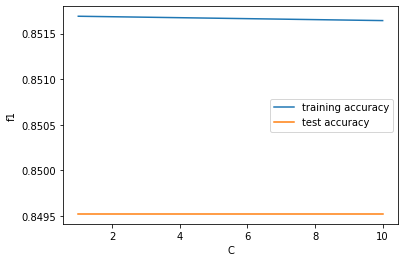

In [406]:
# plotting 'C'

plt.figure()
plt.plot(model_cv.cv_results_["param_C"], 
model_cv.cv_results_["mean_train_score"], 
label="training accuracy")
plt.plot(model_cv.cv_results_["param_C"], 
model_cv.cv_results_["mean_test_score"], 
label="test accuracy")
plt.xlabel('C')
plt.ylabel("f1")
plt.legend()
plt.show()

In [407]:
# printing the optimal accuracy score and hyperparameters
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.8495238095238095 corresponding to hyperparameters {'C': 1, 'gamma': 0.1}


## Building and Evaluating the Final Model

In [408]:
# model with optimal hyperparameters

# model
model = SVC(C=1, gamma=0.01, class_weight= 'balanced',random_state=100,kernel = 'linear',verbose = 1)

model.fit(X_train_pca, y_train)
y_pred = model.predict(X_test_pca)

# metrics
print("accuracy", accuracy_score(y_test, y_pred), "\n")
print(confusion_matrix(y_test, y_pred), "\n")
print(classification_report(y_test, y_pred), "\n")


[LibSVM]accuracy 0.8471280968781246 

[[7027 1242]
 [ 134  598]] 

              precision    recall  f1-score   support

           0       0.98      0.85      0.91      8269
           1       0.33      0.82      0.47       732

    accuracy                           0.85      9001
   macro avg       0.65      0.83      0.69      9001
weighted avg       0.93      0.85      0.87      9001
 



In [409]:
#create confusion matrix
cm = confusion_matrix(y_test,y_pred)
print("confusoin matrix \t\n",cm)

#checking sesitivity 
print("sensitivity \t", (cm[1,1]/(cm[1,0]+cm[1,1])).round(2))


#checking  specificity
print("specificity \t", (cm[0,0]/(cm[0,0]+cm[0,1])).round(2))

# check area under curve
y_pred_prob = logreg_model.predict_proba(X_test_pca)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2)) 

confusoin matrix 	
 [[7027 1242]
 [ 134  598]]
sensitivity 	 0.82
specificity 	 0.85
AUC:    	 0.9


## <a> Model3 PCA and Random Forest



#### Default Hyperparameters
Let's first fit a random forest model with default hyperparameters.

In [410]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier()

In [411]:
# fit
rfc.fit(X_train_pca,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [412]:
# Making predictions
predictions = rfc.predict(X_test_pca)

In [413]:
# Let's check the report of our default model
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      8269
           1       0.72      0.18      0.29       732

    accuracy                           0.93      9001
   macro avg       0.83      0.59      0.63      9001
weighted avg       0.92      0.93      0.91      9001



In [414]:
# Printing confusion matrix
print(confusion_matrix(y_test,predictions))

[[8218   51]
 [ 599  133]]


In [415]:
print(accuracy_score(y_test,predictions))

0.9277858015776025


So far so good, let's now look at the list of hyperparameters which we can tune to improve model performance.

<hr>

### Hyperparameter Tuning

### Tuning max_depth

Let's try to find the optimum values for ```max_depth``` and understand how the value of max_depth impacts the overall accuracy of the ensemble.


In [416]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model
rf = RandomForestClassifier(class_weight= 'balanced', random_state=100)


# fit tree on training data
rf = GridSearchCV(rf, parameters, cv=n_folds, 
                   scoring="accuracy",verbose =1, n_jobs = -1, return_train_score=True)
rf.fit(X_train_pca, y_train)

print(rf.best_score_)
print(rf.best_params_)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  1.4min finished


0.9251904761904761
{'max_depth': 17}


In [417]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       5.092078      0.076301         0.099431        0.008688   
1      14.027069      0.293870         0.131435        0.020931   
2      19.069327      0.415122         0.177453        0.039371   
3      19.033927      0.434372         0.145443        0.007554   

  param_max_depth             params  split0_test_score  split1_test_score  \
0               2   {'max_depth': 2}           0.834286           0.846905   
1               7   {'max_depth': 7}           0.882857           0.890000   
2              12  {'max_depth': 12}           0.917619           0.919762   
3              17  {'max_depth': 17}           0.926429           0.922143   

   split2_test_score  split3_test_score  split4_test_score  mean_test_score  \
0           0.848810           0.837619           0.845476         0.842619   
1           0.900714           0.883333           0.886667         0.888714   
2           0.926429           0.919048           0.918333         0.920238   
3           0.927143           0.925000           0.925238         0.925190   

   std_test_score  rank_test_score  split0_train_score  split1_train_score  \
0        0.005644                4            0.845714            0.843333   
1        0.006529                3            0.908214            0.906310   
2        0.003177                2            0.961726            0.964107   
3        0.001713                1            0.980238            0.980833   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.843393            0.847143            0.848214   
1            0.905595            0.902619            0.904464   
2            0.960774            0.965000            0.963095   
3            0.979762            0.980298            0.981012   

   mean_train_score  std_train_score  
0          0.845560         0.001961  
1          0.905440         0.001865  
2          0.962940         0.001536  
3          0.980429         0.000448

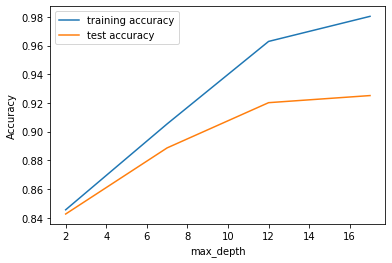

In [418]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


You can see that as we increase the value of max_depth, both train and test scores increase till a point, but after that test score starts to decrease. The ensemble tries to overfit as we increase the max_depth.

Thus, controlling the depth of the constituent trees will help reduce overfitting in the forest.

<hr>

### Tuning n_estimators

Let's try to find the optimum values for n_estimators and understand how the value of n_estimators impacts the overall accuracy. Notice that we'll specify an appropriately low value of max_depth, so that the trees do not overfit.
<br>


In [419]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': range(100, 1500, 500)}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=4, class_weight ='balanced', random_state=100)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, verbose = 1,
                   scoring="accuracy",return_train_score=True, n_jobs = -1)
rf.fit(X_train_pca, y_train)

print(rf.best_score_)
print(rf.best_params_)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  5.3min finished


0.8613809523809524
{'n_estimators': 1100}


In [420]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      12.880142      0.096837         0.135642        0.005083   
1      74.397892      0.814352         0.848646        0.092999   
2     118.141694     19.940994         1.074505        0.062125   

  param_n_estimators                  params  split0_test_score  \
0                100   {'n_estimators': 100}           0.851667   
1                600   {'n_estimators': 600}           0.857619   
2               1100  {'n_estimators': 1100}           0.857619   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.861905           0.868810           0.847143           0.855476   
1           0.861905           0.872143           0.853571           0.859524   
2           0.863571           0.872857           0.852857           0.860000   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.857000        0.007635                3            0.864940   
1         0.860952        0.006225                2            0.870298   
2         0.861381        0.006711                1            0.870417   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.865179            0.862083            0.863929   
1            0.869881            0.865238            0.866786   
2            0.870357            0.866190            0.867619   

   split4_train_score  mean_train_score  std_train_score  
0            0.863631          0.863952         0.001102  
1            0.864405          0.867321         0.002389  
2            0.864881          0.867893         0.002213

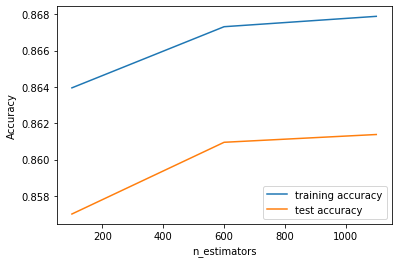

In [421]:
# plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


<hr>

### Tuning max_features

Let's see how the model performance varies with ```max_features```, which is the maximum numbre of features considered for splitting at a node.

In [422]:

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_features': [4, 8, 14, 20, 24]}

# instantiate the model
rf = RandomForestClassifier(max_depth=4,class_weight='balanced',random_state=100)


# fit tree on training data
rf = GridSearchCV(rf, parameters, verbose = 1,cv=n_folds, 
                   scoring="accuracy",n_jobs = -1, return_train_score = True)
rf.fit(X_train_pca, y_train)

print(rf.best_score_)
print(rf.best_params_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  2.1min finished


0.8619523809523809
{'max_features': 4}


In [423]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       8.006256      0.284950         0.141442        0.008434   
1      11.961369      1.234385         0.106029        0.004517   
2      17.010584      0.267120         0.112233        0.007653   
3      24.554879      0.761779         0.103829        0.003656   
4      27.698983      1.766829         0.099430        0.010464   

  param_max_features                params  split0_test_score  \
0                  4   {'max_features': 4}           0.856429   
1                  8   {'max_features': 8}           0.852381   
2                 14  {'max_features': 14}           0.853095   
3                 20  {'max_features': 20}           0.847381   
4                 24  {'max_features': 24}           0.852857   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.862381           0.870952           0.859762           0.860238   
1           0.854048           0.866190           0.851190           0.852381   
2           0.860952           0.865238           0.848333           0.848810   
3           0.855476           0.860238           0.844762           0.846905   
4           0.853095           0.856190           0.838810           0.843810   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.861952        0.004887                1            0.869821   
1         0.855238        0.005551                3            0.863810   
2         0.855286        0.006727                2            0.865357   
3         0.850952        0.005902                4            0.859762   
4         0.848952        0.006544                5            0.862024   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.866964            0.867083            0.866845   
1            0.861905            0.857500            0.863095   
2            0.864940            0.860476            0.862500   
3            0.858929            0.855357            0.855179   
4            0.854940            0.849702            0.853214   

   split4_train_score  mean_train_score  std_train_score  
0            0.866369          0.867417         0.001227  
1            0.858869          0.861036         0.002445  
2            0.859821          0.862619         0.002250  
3            0.855952          0.857036         0.001921  
4            0.851250          0.854226         0.004282

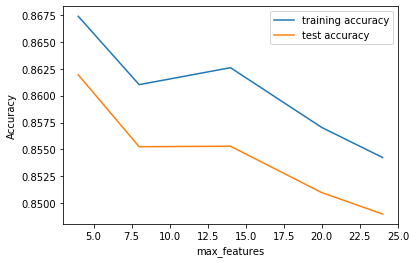

In [424]:
# plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


The training and test scores *both* seem to increase as we increase max_features, and the model doesn't seem to overfit more with increasing max_features. 

### Tuning min_samples_leaf

The hyperparameter **min_samples_leaf** is the minimum number of samples required to be at a leaf node:
- If int, then consider min_samples_leaf as the minimum number.
- If float, then min_samples_leaf is a percentage and ceil(min_samples_leaf * n_samples) are the minimum number of samples for each node.

Let's now check the optimum value for min samples leaf in our case.

In [425]:

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(100, 400, 50)}

# instantiate the model
rf = RandomForestClassifier(class_weight ='balanced',random_state=100)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",verbose =1, return_train_score = True, n_jobs = -1)
rf.fit(X_train_pca, y_train)
print(rf.best_score_)
print(rf.best_params_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  2.4min finished


0.8762857142857141
{'min_samples_leaf': 100}


In [426]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      20.886685      0.164607         0.200859        0.020977   
1      19.253221      0.503156         0.164448        0.005044   
2      17.307870      0.282142         0.162447        0.004925   
3      17.305225      0.692958         0.168248        0.020110   
4      16.131889      0.497085         0.152245        0.002482   

  param_min_samples_leaf                     params  split0_test_score  \
0                    100  {'min_samples_leaf': 100}           0.872381   
1                    150  {'min_samples_leaf': 150}           0.865000   
2                    200  {'min_samples_leaf': 200}           0.859524   
3                    250  {'min_samples_leaf': 250}           0.859048   
4                    300  {'min_samples_leaf': 300}           0.852619   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.879048           0.886190           0.868571           0.875238   
1           0.870238           0.875476           0.857143           0.871190   
2           0.863810           0.873333           0.854524           0.856190   
3           0.862381           0.867143           0.853333           0.855476   
4           0.857381           0.866429           0.847857           0.856190   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.876286        0.006026                1            0.889048   
1         0.867810        0.006289                2            0.878274   
2         0.861476        0.006725                3            0.872262   
3         0.859476        0.004922                4            0.870952   
4         0.856095        0.006138                5            0.864643   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.889524            0.887202            0.884524   
1            0.881786            0.877738            0.873631   
2            0.870833            0.868690            0.869167   
3            0.865893            0.862976            0.866488   
4            0.864107            0.862917            0.862679   

   split4_train_score  mean_train_score  std_train_score  
0            0.885476          0.887155         0.001946  
1            0.876429          0.877571         0.002650  
2            0.868274          0.869845         0.001489  
3            0.864702          0.866202         0.002661  
4            0.860298          0.862929         0.001504

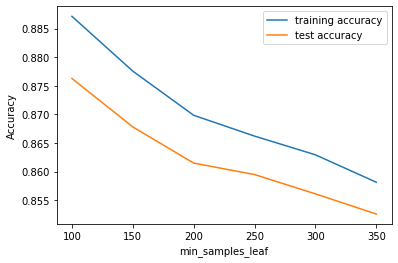

In [427]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

We can see that the model starts of overfit as you decrease the value of min_samples_leaf. 

### Tuning min_samples_split

Let's now look at the performance of the ensemble as we vary min_samples_split.

In [428]:

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(200, 500, 50)}

# instantiate the model
rf = RandomForestClassifier(class_weight = 'balanced',random_state=100)


# fit tree on training data
rf = GridSearchCV(rf, parameters, verbose = 1,
                    cv=n_folds, 
                   scoring="accuracy",n_jobs =-1, return_train_score = True)
rf.fit(X_train_pca, y_train)

print(rf.best_score_)
print(rf.best_params_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  2.3min finished


0.900952380952381
{'min_samples_split': 200}


In [429]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      20.637145      1.679530         0.137840        0.004751   
1      17.165176      0.782470         0.133240        0.004167   
2      17.057342      0.378555         0.136239        0.003546   
3      16.088879      0.202770         0.132839        0.004307   
4      16.527599      0.286201         0.133839        0.006113   

  param_min_samples_split                      params  split0_test_score  \
0                     200  {'min_samples_split': 200}           0.896429   
1                     250  {'min_samples_split': 250}           0.888333   
2                     300  {'min_samples_split': 300}           0.881190   
3                     350  {'min_samples_split': 350}           0.881667   
4                     400  {'min_samples_split': 400}           0.874524   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.901667           0.911190           0.897143           0.898333   
1           0.893333           0.905476           0.889286           0.896190   
2           0.888571           0.901667           0.882857           0.888333   
3           0.884048           0.895000           0.880000           0.882381   
4           0.878095           0.889762           0.876429           0.879762   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.900952        0.005425                1            0.922381   
1         0.894524        0.006163                2            0.911310   
2         0.888524        0.007193                3            0.902976   
3         0.884619        0.005351                4            0.901964   
4         0.879714        0.005316                5            0.895060   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.921607            0.919821            0.918155   
1            0.914762            0.911548            0.911964   
2            0.906786            0.906190            0.903750   
3            0.899226            0.896071            0.895179   
4            0.894762            0.892262            0.890476   

   split4_train_score  mean_train_score  std_train_score  
0            0.919643          0.920321         0.001503  
1            0.911488          0.912214         0.001292  
2            0.902202          0.904381         0.001799  
3            0.896012          0.897690         0.002545  
4            0.891786          0.892869         0.001769

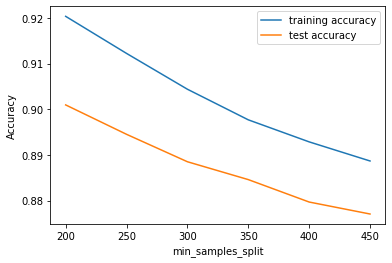

In [430]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

<hr>

## Grid Search to Find Optimal Hyperparameters

We can now find the optimal hyperparameters using GridSearchCV.

- ### <a> ****Note: The Below GridSearch Step will take almost 30-35 mins to run.****

In [431]:
# Create the parameter grid based on the results of random search  
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [5, 10]}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

In [432]:
# Fit the grid search to the data
grid_search.fit(X_train_pca, y_train)


Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 20.0min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed: 23.8min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [433]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.9193333333333333 using {'max_depth': 10, 'max_features': 10, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 100}


In [434]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,class_weight = 'balanced',
                             max_depth=grid_search.best_params_['max_depth'],
                             min_samples_split=grid_search.best_params_['min_samples_split'],
                             max_features=grid_search.best_params_['max_features'],n_estimators =grid_search.best_params_['n_estimators'], random_state=100)

In [435]:
# fit
rfc.fit(X_train_pca,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=10, max_features=10,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=200,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=100,
                       verbose=0, warm_start=False)

In [436]:
# predict
predictions = rfc.predict(X_test_pca)

In [437]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.97      0.90      0.93      8269
           1       0.39      0.73      0.50       732

    accuracy                           0.88      9001
   macro avg       0.68      0.81      0.72      9001
weighted avg       0.93      0.88      0.90      9001



In [438]:
#create confusion matrix
cm = confusion_matrix(y_test,predictions)
print("confusoin matrix \t\n",cm)

#checking sesitivity 
print("sensitivity \t", (cm[1,1]/(cm[1,0]+cm[1,1])).round(2))


#checking  specificity
print("specificity \t", (cm[0,0]/(cm[0,0]+cm[0,1])).round(2))

# check area under curve
y_pred_prob = rfc.predict_proba(X_test_pca)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2)) 

confusoin matrix 	
 [[7423  846]
 [ 199  533]]
sensitivity 	 0.73
specificity 	 0.9
AUC:    	 0.9


### 8) Final Choice of Model
Recall is the most important business metric for the telecom churn problem. The company would like to identify most customers at risk of churning, even if there are many customers that are misclassified as churn. The cost to the company of churning is much higher than having a few false positives.

##### $Model/Metricity$

#### a) Logistic Regression
    - Sensitivity/Recall  - .83
    - Specificity         - .83
    - Roc AUC Score       - .90 
    
#### b) SMV
    - Sensitivity/Recall  - .82
    - Specificity         - .85
    - Roc AUC Score       - .90 
    
    
#### c) Random Forest
    - Sensitivity/Recall  - .73
    - Specificity         - .90
    - Roc AUC Score       - .90    
 

<a> **INFERENCE:**<br>    

We choose logistic regression from all the above models as it has less time complexity and take less memory compared to all above models. Morevover, its sensitivity is very good which is our prime requirement in this case study.

## `PART 2: -  Interpretable models` 

Let us now build models to identify the churn indicators. Identification of these churn indicators will help in retaining customers that are likely to churn.

In [439]:
# create a copy of dataset
high_df = high_val.copy()
high_df.head()

cust_id    arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
0      4919   197.385   214.816   213.803   265.618262    272.70047   
7      4919  1069.180  1261.272  1255.019    57.840000     54.68000   
8      4919   378.721   492.223   137.362   413.690000    351.03000   
21     4919   514.453   597.753   637.760   102.410000    132.11000   
23     4919   112.510   193.897   366.966    48.960000     50.66000   

    onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
0          0.00    380.608111    384.994337          0.86      16.408431   
7         52.29    453.430000    567.160000        325.91      16.230000   
8         35.08     94.660000     80.630000        136.48       0.000000   
21        85.14    757.930000    896.680000        983.39       0.000000   
23        33.58     85.410000     89.360000        205.89       0.000000   

    roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0       12.872921           0.00      27.063178       20.51937           0.00   
7       33.490000          31.64      23.740000       12.59000          38.06   
8        0.000000           0.00       0.000000        0.00000           0.00   
21       0.000000           0.00       0.000000        0.00000           0.00   
23       0.000000           0.00       0.000000        0.00000           0.00   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0               0.00              0.00              0.00              0.00   
7              51.39             31.38             40.28            308.63   
8             297.13            217.59             12.49             80.96   
21              4.48              6.16             23.34             91.81   
23             48.96             50.66             33.58             82.94   

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0               0.00              0.00              0.00              0.00   
7             447.38            162.28             30.43             31.13   
8              70.58             50.54              0.00              0.00   
21             87.93            104.81              0.75              0.00   
23             83.01            148.56              0.00              0.00   

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0               0.00               0.0               0.0              0.00   
7              28.39               0.0               0.0              0.00   
8               0.00               0.0               0.0              7.15   
21              1.58               0.0               0.0              0.00   
23              0.00               0.0               0.0              9.38   

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0           0.00          0.00          0.00              0.00   
7         422.16        533.91        255.79              4.30   
8         378.09        288.18         63.04            116.56   
21         97.04         94.09        129.74             97.93   
23        131.91        133.68        182.14              0.00   

    std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0               0.00              0.00              0.00              0.00   
7              23.29             12.01             49.89             31.76   
8             133.43             22.58             13.69             10.04   
21            125.94             61.79            665.36            808.74   
23              0.00              0.00              2.36              6.35   

    std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0               0.00              0.00              0.00              0.00   
7              49.14              6.66              6.68              5.93   
8              75.69              0.00              0.00              0.00   
21            842.83              0.00          

## 1) Data Preparation

### a) Let us drop highly correlated features

a) 2G data recharge in the month of june

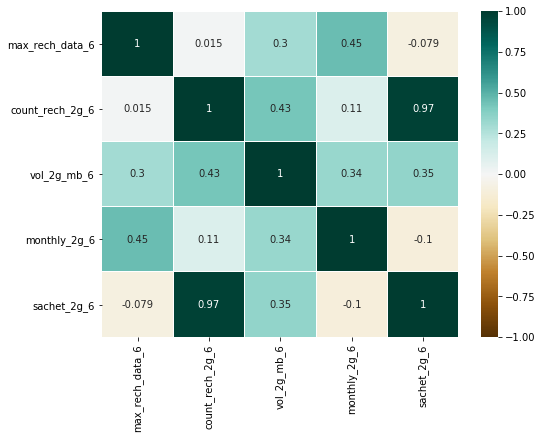

In [440]:
col_2g_6 = ['max_rech_data_6','count_rech_2g_6','vol_2g_mb_6','monthly_2g_6','sachet_2g_6']
plt.figure(figsize=[8,6])
sns.heatmap(high_df[col_2g_6].corr(), annot=True,cmap="BrBG" , robust=True,linewidth=0.1, vmin=-1)

<A> We observe that count_rech_2g_6 has high correlation with other features. Let us drop count_rech_2g_6 to avoid multicollinearity.

In [441]:
high_df.drop('count_rech_2g_6',1,inplace = True)

b) 2G data recharge in the month of july

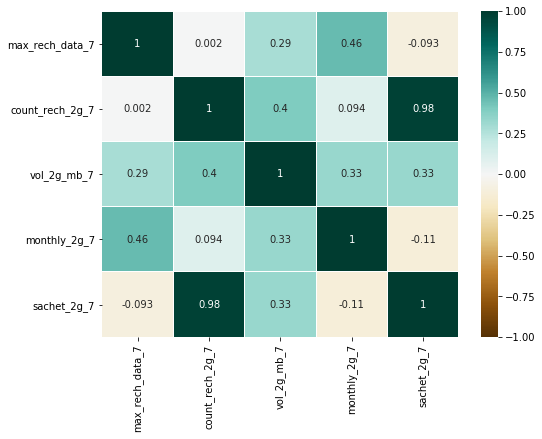

In [442]:
col_2g_7 = ['max_rech_data_7','count_rech_2g_7','vol_2g_mb_7','monthly_2g_7','sachet_2g_7']
plt.figure(figsize=[8,6])
sns.heatmap(high_df[col_2g_7].corr(), annot=True,cmap="BrBG" , robust=True,linewidth=0.1, vmin=-1)

<A> We observe that `count_rech_2g_7` has high correlation with other features. Let us drop count_rech_2g_6 to avoid multicollinearity.

In [443]:
high_df.drop('count_rech_2g_7',1,inplace = True)

c) 2G data recharge in the month of August

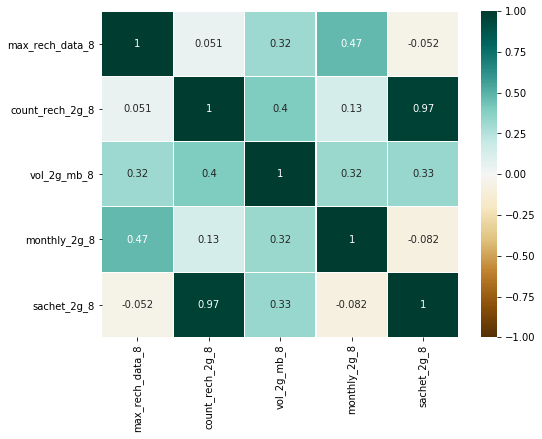

In [444]:
col_2g_8 = ['max_rech_data_8','count_rech_2g_8','vol_2g_mb_8','monthly_2g_8','sachet_2g_8']
plt.figure(figsize=[8,6])
sns.heatmap(high_df[col_2g_8].corr(), annot=True,cmap="BrBG" , robust=True,linewidth=0.1, vmin=-1)

<A> We observe that `count_rech_2g_8` has high correlation with other features. Let us drop count_rech_2g_6 to avoid multicollinearity.

In [445]:
high_df.drop('count_rech_2g_8',1,inplace = True)

d) 3G data recharge in the month of june

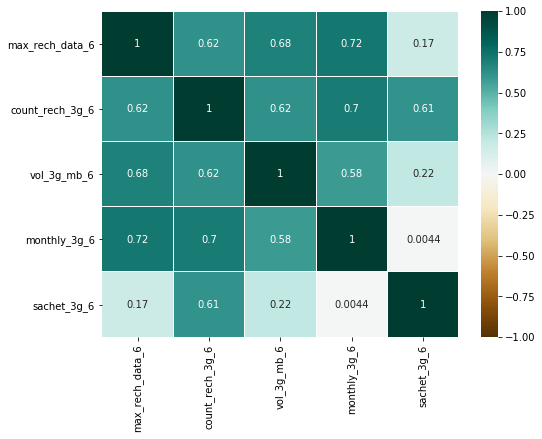

In [446]:
col_3g_6 = ['max_rech_data_6','count_rech_3g_6','vol_3g_mb_6','monthly_3g_6','sachet_3g_6']
plt.figure(figsize=[8,6])
sns.heatmap(high_df[col_3g_6].corr(), annot=True,cmap="BrBG" , robust=True,linewidth=0.1, vmin=-1)

<A> We observe that count_rech_3g_6 has high correlation with other features. Let us drop count_rech_2g_6 to avoid multicollinearity.

In [447]:
high_df.drop('count_rech_3g_6',1,inplace = True)

e) 3G data recharge in the month of july

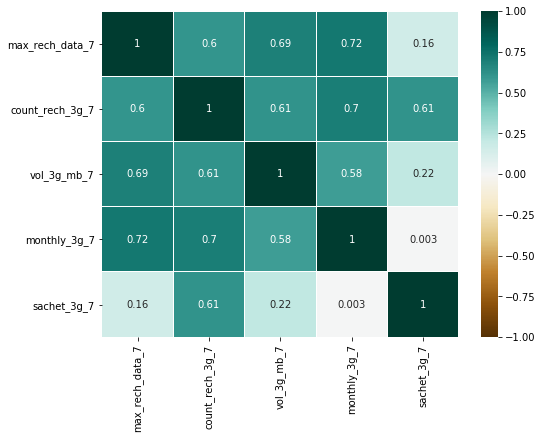

In [448]:
col_3g_7 = ['max_rech_data_7','count_rech_3g_7','vol_3g_mb_7','monthly_3g_7','sachet_3g_7']
plt.figure(figsize=[8,6])
sns.heatmap(high_df[col_3g_7].corr(), annot=True,cmap="BrBG" , robust=True,linewidth=0.1, vmin=-1)

<A> We observe that `count_rech_3g_7` has high correlation with other features. Let us drop count_rech_2g_6 to avoid multicollinearity.

In [449]:
high_df.drop('count_rech_3g_7',1,inplace = True)

f) 3G data recharge in the month of August

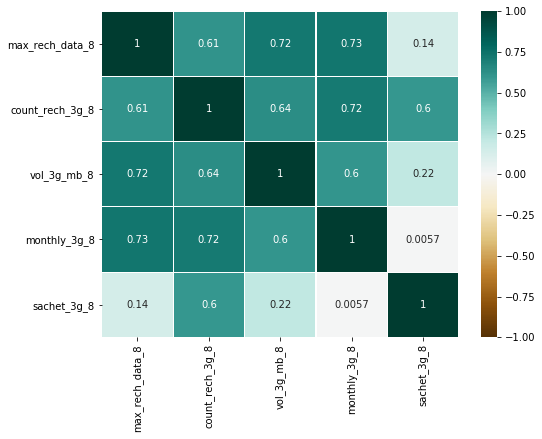

In [450]:
col_3g_8 = ['max_rech_data_8','count_rech_3g_8','vol_3g_mb_8','monthly_3g_8','sachet_3g_8']
plt.figure(figsize=[8,6])
sns.heatmap(high_df[col_3g_8].corr(), annot=True,cmap="BrBG" , robust=True,linewidth=0.1, vmin=-1)

<A> We observe that `count_rech_3g_8` has high correlation with other features. Let us drop count_rech_2g_6 to avoid multicollinearity.

In [451]:
high_df.drop('count_rech_3g_8',1,inplace = True)

g) Total outgoing calls made in the month of june

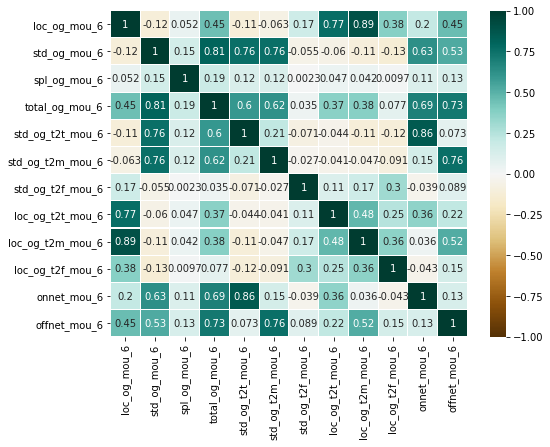

In [452]:
og_col_6 = ['loc_og_mou_6','std_og_mou_6','spl_og_mou_6','total_og_mou_6','std_og_t2t_mou_6','std_og_t2m_mou_6','std_og_t2f_mou_6','loc_og_t2t_mou_6','loc_og_t2m_mou_6','loc_og_t2f_mou_6','onnet_mou_6','offnet_mou_6']
plt.figure(figsize=[8,6])
sns.heatmap(high_df[og_col_6].corr(), annot=True,cmap="BrBG" , robust=True,linewidth=0.1, vmin=-1)

<a> We observe that loc_og_mou_6, std_og_mou_6 tot, l_og_mou_6, onnet_7 & offnet_6 have strong correlation with other features. These features should be taken care of to handle multicollinearity.

In [453]:
high_df.drop(['loc_og_mou_6', 'std_og_mou_6','total_og_mou_6','offnet_mou_6','onnet_mou_6'],1,inplace=True)

h) Total outgoing calls made in the month of july

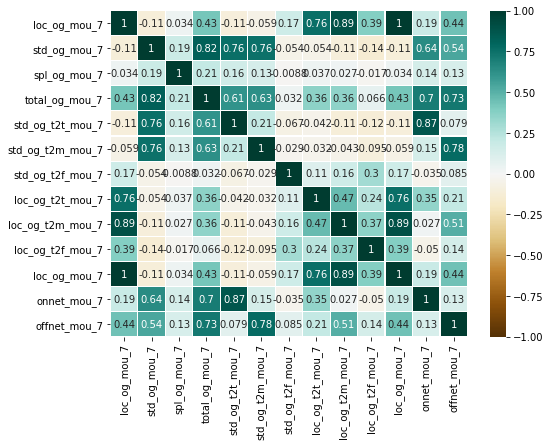

In [454]:
og_col_7 = ['loc_og_mou_7','std_og_mou_7','spl_og_mou_7','total_og_mou_7','std_og_t2t_mou_7','std_og_t2m_mou_7','std_og_t2f_mou_7','loc_og_t2t_mou_7','loc_og_t2m_mou_7','loc_og_t2f_mou_7','loc_og_mou_7','onnet_mou_7','offnet_mou_7']
plt.figure(figsize=[8,6])
sns.heatmap(high_df[og_col_7].corr(), annot=True,cmap="BrBG" , robust=True,linewidth=0.1, vmin=-1)

<a> We observe that loc_og_mou_7, std_og_mou_7 and total_og_mou_7 have strong correlation with other features. These features should be taken care of to handle multicollinearity.

In [455]:
high_df.drop(['loc_og_mou_7', 'std_og_mou_7','total_og_mou_7','onnet_mou_7','offnet_mou_7'],1,inplace=True)

i) Total outgoing calls made in the month of August

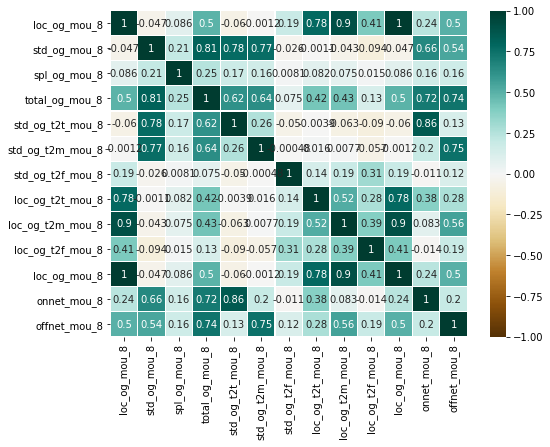

In [456]:
og_col_8 = ['loc_og_mou_8','std_og_mou_8','spl_og_mou_8','total_og_mou_8','std_og_t2t_mou_8','std_og_t2m_mou_8','std_og_t2f_mou_8','loc_og_t2t_mou_8','loc_og_t2m_mou_8','loc_og_t2f_mou_8','loc_og_mou_8','onnet_mou_8','offnet_mou_8']
plt.figure(figsize=[8,6])
sns.heatmap(high_df[og_col_8].corr(), annot=True,cmap="BrBG" , robust=True,linewidth=0.1, vmin=-1)

<a> We observe that loc_og_mou_8, std_og_mou_8 and total_og_mou_8 have strong correlation with other features. These features should be taken care of to handle multicollinearity.

In [457]:
high_df.drop(['loc_og_mou_8', 'std_og_mou_8','total_og_mou_8','onnet_mou_8','offnet_mou_8'],1,inplace=True)

j) Total incoming calls made in the month of june

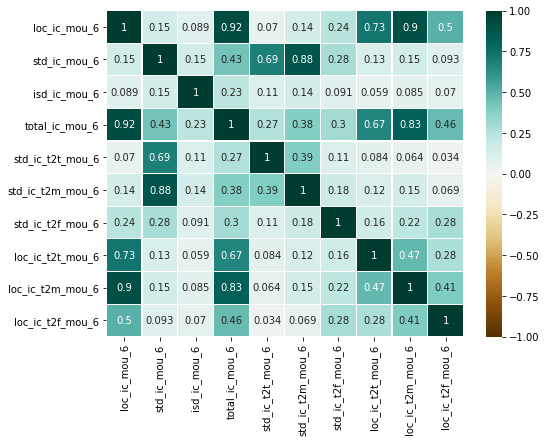

In [458]:
ic_col_6 = ['loc_ic_mou_6','std_ic_mou_6','isd_ic_mou_6','total_ic_mou_6','std_ic_t2t_mou_6','std_ic_t2m_mou_6','std_ic_t2f_mou_6','loc_ic_t2t_mou_6','loc_ic_t2m_mou_6','loc_ic_t2f_mou_6']
plt.figure(figsize=[8,6])
sns.heatmap(high_df[ic_col_6].corr(), annot=True,cmap="BrBG" , robust=True,linewidth=0.1, vmin=-1)

<a> We observe that loc_ic_mou_6, std_ic_mou_6 and total_ic_mou_6 have strong correlation with other features. These features should be taken care of to handle multicollinearity.

In [459]:
high_df.drop(['loc_ic_mou_6', 'std_ic_mou_6','total_ic_mou_6'],1,inplace=True)

k) Total incoming calls made in the month of july

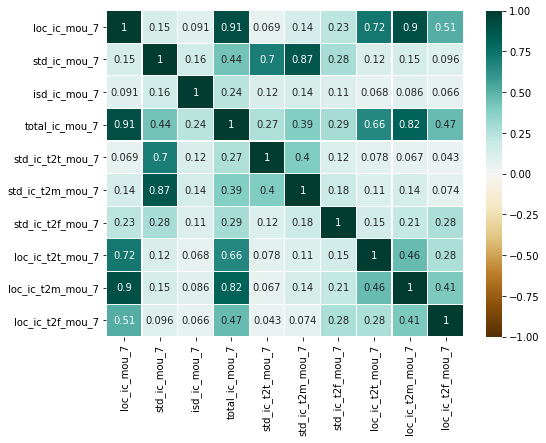

In [460]:
ic_col_7 = ['loc_ic_mou_7','std_ic_mou_7','isd_ic_mou_7','total_ic_mou_7','std_ic_t2t_mou_7','std_ic_t2m_mou_7','std_ic_t2f_mou_7','loc_ic_t2t_mou_7','loc_ic_t2m_mou_7','loc_ic_t2f_mou_7']
plt.figure(figsize=[8,6])
sns.heatmap(high_df[ic_col_7].corr(), annot=True,cmap="BrBG" , robust=True,linewidth=0.1, vmin=-1)

<a> We observe that loc_ic_mou_7, std_ic_mou_7 and total_ic_mou_7 have strong correlation with other features. These features should be taken care of to handle multicollinearity.

In [461]:
high_df.drop(['loc_ic_mou_7', 'std_ic_mou_7','total_ic_mou_7'],1,inplace=True)

l) Total incoming calls made in the month of August

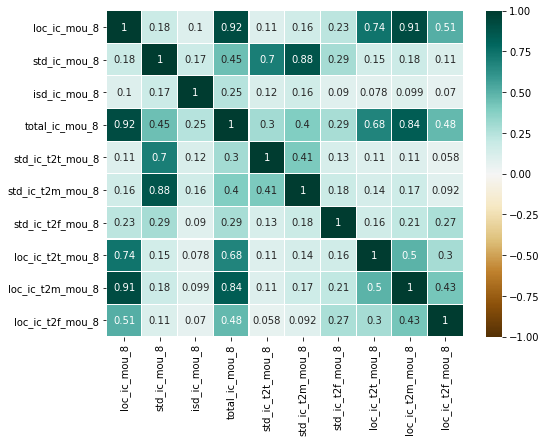

In [462]:
ic_col_8 = ['loc_ic_mou_8','std_ic_mou_8','isd_ic_mou_8','total_ic_mou_8','std_ic_t2t_mou_8','std_ic_t2m_mou_8','std_ic_t2f_mou_8','loc_ic_t2t_mou_8','loc_ic_t2m_mou_8','loc_ic_t2f_mou_8']
plt.figure(figsize=[8,6])
sns.heatmap(high_df[ic_col_8].corr(), annot=True,cmap="BrBG" , robust=True,linewidth=0.1, vmin=-1)

<a> We observe that loc_ic_mou_8, std_ic_mou_8 and total_ic_mou_8 have strong correlation with other features. These features should be taken care of to handle multicollinearity.

In [463]:
high_df.drop(['loc_ic_mou_8', 'std_ic_mou_8','total_ic_mou_8'],1,inplace=True)

In [464]:
# Let us also drop age_group from our dataset as aon_year & age_group are highly correlated.
high_df.drop('age_group',1,inplace=True)

In [465]:
# The shape of final dataset

print("The shape of final dataset is :",high_df.shape)

The shape of final dataset is : (30001, 107)


In [466]:
high_df.head()

cust_id    arpu_6    arpu_7    arpu_8  roam_ic_mou_6  roam_ic_mou_7  \
0      4919   197.385   214.816   213.803      16.408431      12.872921   
7      4919  1069.180  1261.272  1255.019      16.230000      33.490000   
8      4919   378.721   492.223   137.362       0.000000       0.000000   
21     4919   514.453   597.753   637.760       0.000000       0.000000   
23     4919   112.510   193.897   366.966       0.000000       0.000000   

    roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0            0.00      27.063178       20.51937           0.00   
7           31.64      23.740000       12.59000          38.06   
8            0.00       0.000000        0.00000           0.00   
21           0.00       0.000000        0.00000           0.00   
23           0.00       0.000000        0.00000           0.00   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0               0.00              0.00              0.00              0.00   
7              51.39             31.38             40.28            308.63   
8             297.13            217.59             12.49             80.96   
21              4.48              6.16             23.34             91.81   
23             48.96             50.66             33.58             82.94   

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0               0.00              0.00              0.00              0.00   
7             447.38            162.28             30.43             31.13   
8              70.58             50.54              0.00              0.00   
21             87.93            104.81              0.75              0.00   
23             83.01            148.56              0.00              0.00   

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0               0.00               0.0               0.0              0.00   
7              28.39               0.0               0.0              0.00   
8               0.00               0.0               0.0              7.15   
21              1.58               0.0               0.0              0.00   
23              0.00               0.0               0.0              9.38   

    std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  \
0               0.00              0.00              0.00              0.00   
7               4.30             23.29             12.01             49.89   
8             116.56            133.43             22.58             13.69   
21             97.93            125.94             61.79            665.36   
23              0.00              0.00              0.00              2.36   

    std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  \
0               0.00              0.00              0.00              0.00   
7              31.76             49.14              6.66              6.68   
8              10.04             75.69              0.00              0.00   
21            808.74            842.83              0.00              0.00   
23              6.35             39.61              0.00              0.00   

    std_og_t2f_mou_8  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  \
0               0.00           0.0           0.0          0.00   
7               5.93           4.5           0.0          6.50   
8               0.00           0.0           0.0         10.23   
21              0.00           0.0           0.0          0.00   
23              0.00           0.1           0.0         17.71   

    loc_ic_t2t_mou_6  loc_ic_t2t_mou_7  loc_ic_t2t_mou_8  loc_ic_t2m_mou_6  \
0               0.00              0.00              0.16              0.00   
7              58.14             32.26             27.31            217.56   
8              23.84              9.84              0.31             57.58   
21              2.48             10.19             19.54            118.23   
23             20.71    

### b) Encoding categorical variables

In [467]:
# encode categorical variables using Label Encoder

# select all categorical variables
df_categorical = high_df.select_dtypes(include=['object'])
df_categorical.drop('churn',1).head()

night_pck_user_6 night_pck_user_7 night_pck_user_8 fb_user_6 fb_user_7  \
0               0.0              0.0              0.0       1.0       1.0   
7              -1.0             -1.0             -1.0      -1.0      -1.0   
8              -1.0              0.0              0.0      -1.0       1.0   
21             -1.0             -1.0             -1.0      -1.0      -1.0   
23             -1.0              0.0              0.0      -1.0       1.0   

   fb_user_8  
0        1.0  
7       -1.0  
8        1.0  
21      -1.0  
23       1.0

In [468]:
from sklearn import preprocessing
# apply Label encoder to df_categorical
le = preprocessing.LabelEncoder()
df_categorical = df_categorical.apply(le.fit_transform)
df_categorical.head()

night_pck_user_6  night_pck_user_7  night_pck_user_8  fb_user_6  \
0                  1                 1                 1          2   
7                  0                 0                 0          0   
8                  0                 1                 1          0   
21                 0                 0                 0          0   
23                 0                 1                 1          0   

    fb_user_7  fb_user_8  churn  
0           2          2      1  
7           0          0      1  
8           2          2      0  
21          0          0      0  
23          2          2      0

In [469]:
# concat df_categorical with original df
high_df = high_df.drop(df_categorical.columns, axis=1)

high_df = pd.concat([high_df, df_categorical], axis=1)
high_df.head()

cust_id    arpu_6    arpu_7    arpu_8  roam_ic_mou_6  roam_ic_mou_7  \
0      4919   197.385   214.816   213.803      16.408431      12.872921   
7      4919  1069.180  1261.272  1255.019      16.230000      33.490000   
8      4919   378.721   492.223   137.362       0.000000       0.000000   
21     4919   514.453   597.753   637.760       0.000000       0.000000   
23     4919   112.510   193.897   366.966       0.000000       0.000000   

    roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0            0.00      27.063178       20.51937           0.00   
7           31.64      23.740000       12.59000          38.06   
8            0.00       0.000000        0.00000           0.00   
21           0.00       0.000000        0.00000           0.00   
23           0.00       0.000000        0.00000           0.00   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0               0.00              0.00              0.00              0.00   
7              51.39             31.38             40.28            308.63   
8             297.13            217.59             12.49             80.96   
21              4.48              6.16             23.34             91.81   
23             48.96             50.66             33.58             82.94   

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0               0.00              0.00              0.00              0.00   
7             447.38            162.28             30.43             31.13   
8              70.58             50.54              0.00              0.00   
21             87.93            104.81              0.75              0.00   
23             83.01            148.56              0.00              0.00   

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0               0.00               0.0               0.0              0.00   
7              28.39               0.0               0.0              0.00   
8               0.00               0.0               0.0              7.15   
21              1.58               0.0               0.0              0.00   
23              0.00               0.0               0.0              9.38   

    std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  \
0               0.00              0.00              0.00              0.00   
7               4.30             23.29             12.01             49.89   
8             116.56            133.43             22.58             13.69   
21             97.93            125.94             61.79            665.36   
23              0.00              0.00              0.00              2.36   

    std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  \
0               0.00              0.00              0.00              0.00   
7              31.76             49.14              6.66              6.68   
8              10.04             75.69              0.00              0.00   
21            808.74            842.83              0.00              0.00   
23              6.35             39.61              0.00              0.00   

    std_og_t2f_mou_8  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  \
0               0.00           0.0           0.0          0.00   
7               5.93           4.5           0.0          6.50   
8               0.00           0.0           0.0         10.23   
21              0.00           0.0           0.0          0.00   
23              0.00           0.1           0.0         17.71   

    loc_ic_t2t_mou_6  loc_ic_t2t_mou_7  loc_ic_t2t_mou_8  loc_ic_t2m_mou_6  \
0               0.00              0.00              0.16              0.00   
7              58.14             32.26             27.31            217.56   
8              23.84              9.84              0.31             57.58   
21              2.48             10.19             19.54            118.23   
23             20.71    

## 3) Model building

The main objective behind building these models  is identifying important predictor attributes which help the business understand indicators of churn.

### MODEL 1 -  Tree Model Regression

In [470]:
high_tree = high_df.copy()

In [471]:
# Putting response variable to y
y = high_tree.pop('churn')

# Putting feature variables to X
X = high_tree

In [472]:
print("Size of Feature variables dataset is:",X.shape)
print("Size of response variable dataset is:",y.shape)

Size of Feature variables dataset is: (30001, 106)
Size of response variable dataset is: (30001,)


In [473]:
# splitting the data into train & test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.3, random_state=100, stratify = y)
X_train.head()

cust_id   arpu_6   arpu_7   arpu_8  roam_ic_mou_6  roam_ic_mou_7  \
81898    81899  271.831  199.033  393.619           0.00            0.0   
33489    33490  337.141  348.726  285.105          52.16            0.0   
21296    21297  569.597  837.682  668.214           0.00            0.0   
85765    85766  512.213  587.604  329.858           0.00            0.0   
51152    51153  285.673  161.771  176.107           0.00            0.0   

       roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
81898           0.00           0.00            0.0           0.00   
33489           0.00          45.79            0.0           0.00   
21296           0.00           0.00            0.0           0.00   
85765          34.04           0.00            0.0          31.44   
51152           0.00           0.00            0.0           0.00   

       loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
81898              2.09              2.03              3.63            110.28   
33489              6.04             40.09             83.24              6.99   
21296            279.24            314.94            298.78            431.99   
85765             58.76             80.03              8.66            319.78   
51152              7.73              3.13              4.04             26.33   

       loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
81898             41.83            107.13              0.00              7.23   
33489             41.51             70.38              0.00              1.35   
21296            351.38            473.18             16.23             22.06   
85765            170.66             88.61              0.00              0.00   
51152             28.13             30.34              0.00              0.00   

       loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
81898              4.51              0.00              4.36               0.0   
33489              2.03              0.00             10.19               0.0   
21296             13.81              0.00              0.00               0.0   
85765              0.90              0.00              0.00               0.0   
51152              0.00              8.88              0.31               0.0   

       std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  \
81898              0.00              0.00              0.00              0.00   
33489             87.28            244.01             61.04             29.13   
21296             21.11              8.26              1.58             36.71   
85765              0.48              0.00              4.51            469.78   
51152              0.00              0.00              0.00              0.00   

       std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  \
81898              0.00              1.13              1.11              0.00   
33489             64.48             61.96              0.00              0.00   
21296             28.79             67.08              0.00              2.08   
85765            716.39            322.56              6.83              6.68   
51152              0.00              0.00              0.00              0.00   

       std_og_t2f_mou_8  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  \
81898              2.68          0.00          4.36          0.00   
33489              0.00          1.36         22.36          1.19   
21296              0.00          0.50          0.00          0.00   
85765              5.93          0.00          0.00          6.25   
51152              0.00         10.04          1.89          0.00   

       loc_ic_t2t_mou_6  loc_ic_t2t_mou_7  loc_ic_t2t_mou_8  loc_ic_t2m_mou_6  \
81898              8.39              0.71             11.04            165.34   
33489             12.94             44.38             18.59             16.71   
21296            234.18            208.98       

**Decision tree with default parameters**

In [474]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier

# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
dt_default = DecisionTreeClassifier(random_state = 100, class_weight='balanced')
dt_default.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

In [475]:
# Let's check the evaluation metrics of our default model

# Making predictions
y_pred_default = dt_default.predict(X_test)

# Printing classification report
print(classification_report(y_test, y_pred_default))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      8269
           1       0.48      0.48      0.48       732

    accuracy                           0.92      9001
   macro avg       0.72      0.71      0.72      9001
weighted avg       0.91      0.92      0.92      9001



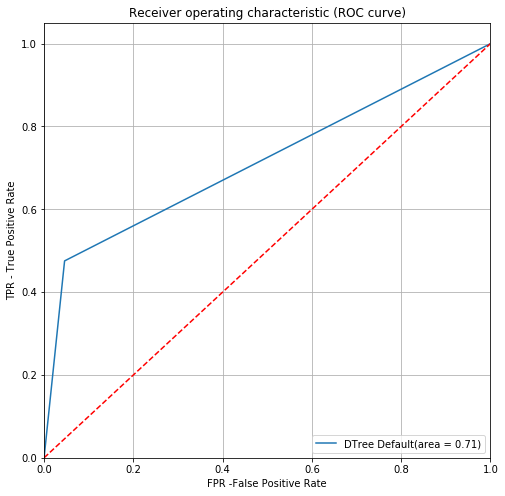

Area under curve is: 0.71
Recall for our model is: 0.48
Accuracy on test set is: 0.92
Confusion matrix for our model is: [[7889  380]
 [ 384  348]]


In [476]:
import sklearn.metrics as metrics 

# Plotting AUC curve
logit_roc_auc = metrics.roc_auc_score(y_test, y_pred_default)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_default, drop_intermediate =True)
plt.figure(figsize=(8,8))
plt.plot(fpr, tpr, label='DTree Default(area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR -False Positive Rate')
plt.ylabel('TPR - True Positive Rate')
plt.title('Receiver operating characteristic (ROC curve)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

print("Area under curve is:", round(metrics.roc_auc_score(y_test, y_pred_default),2))
print("Recall for our model is:" , round(metrics.recall_score(y_test, y_pred_default),2))
print("Accuracy on test set is:" , round(metrics.accuracy_score(y_test, y_pred_default),2))
print("Confusion matrix for our model is:" , metrics.confusion_matrix(y_test, y_pred_default))

**Hyperparameter Tuning**

The results of default tree are quite poor, and we need to improve it by tuning the hyperparameters.

`Tuning max_depth`

In [477]:

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(1, 10,1)}

# instantiate the model
dtree = DecisionTreeClassifier(random_state = 100, class_weight='balanced')

# fit tree on training data
tree = GridSearchCV(dtree, parameters,cv=n_folds,scoring="recall",return_train_score=True, n_jobs=-1, 
                    error_score = 'raise',verbose = 1)
tree.fit(X_train, y_train)
print(tree.best_score_)
print(tree.best_params_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:   19.2s finished


0.8104199893673577
{'max_depth': 5}


In [478]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()



mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.513334      0.048795         0.030011        0.012364   
1       1.177113      0.077415         0.037411        0.014681   
2       1.584818      0.287120         0.039211        0.022307   
3       1.399970      0.081743         0.027007        0.006844   
4       1.318945      0.077713         0.016805        0.000981   

  param_max_depth            params  split0_test_score  split1_test_score  \
0               1  {'max_depth': 1}           0.633431           0.675439   
1               2  {'max_depth': 2}           0.774194           0.780702   
2               3  {'max_depth': 3}           0.706745           0.795322   
3               4  {'max_depth': 4}           0.744868           0.804094   
4               5  {'max_depth': 5}           0.818182           0.792398   

   split2_test_score  split3_test_score  split4_test_score  mean_test_score  \
0           0.666667           0.654971           0.719298         0.669961   
1           0.766082           0.757310           0.804094         0.776476   
2           0.789474           0.833333           0.868421         0.798659   
3           0.792398           0.801170           0.801170         0.788740   
4           0.830409           0.777778           0.833333         0.810420   

   std_test_score  rank_test_score  split0_train_score  split1_train_score  \
0        0.028405                9            0.679094            0.670812   
1        0.015882                5            0.784357            0.782004   
2        0.054061                3            0.763158            0.796635   
3        0.022284                4            0.804825            0.803950   
4        0.021795                1            0.855994            0.840527   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.673007            0.674470            0.657644   
1            0.790783            0.779810            0.780541   
2            0.809802            0.866862            0.878566   
3            0.837601            0.837601            0.803219   
4            0.874177            0.865399            0.898317   

   mean_train_score  std_train_score  
0          0.671005         0.007211  
1          0.783499         0.003959  
2          0.823005         0.043501  
3          0.817439         0.016470  
4          0.866883         0.019270

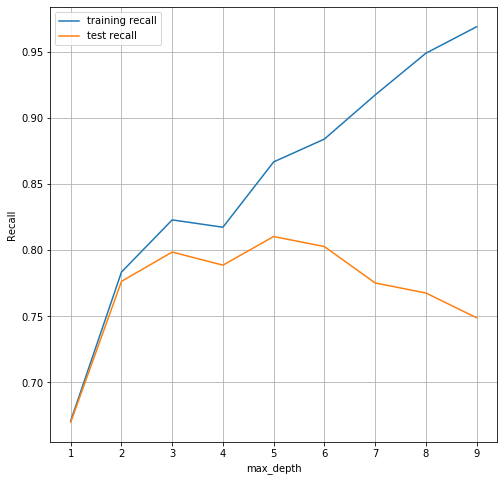

In [479]:
# plotting accuracies with max_depth
plt.figure(figsize=(8,8))
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training recall")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test recall")
plt.xlabel("max_depth")
plt.ylabel("Recall")
plt.legend()
plt.grid(True)
plt.show()


<a> The model perfroms the best at max_depth = 5 and after that the increase in depth drops the accuracy on the test dataset.

`Tuning min_samples_leaf`

In [480]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(5, 200, 5)}

# instantiate the model
dtree = DecisionTreeClassifier(random_state = 100, class_weight='balanced')

# fit tree on training data
tree = GridSearchCV(dtree, parameters,cv=n_folds, 
                   scoring="recall", n_jobs = -1,return_train_score=True, verbose = 1)
tree.fit(X_train, y_train)
print(tree.best_score_)
print(tree.best_params_)


Fitting 5 folds for each of 39 candidates, totalling 195 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   27.6s
[Parallel(n_jobs=-1)]: Done 195 out of 195 | elapsed:  1.6min finished


0.8250295827545402
{'min_samples_leaf': 120}


In [481]:
scores = tree.cv_results_
pd.DataFrame(scores).head()


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       2.651504      0.286585         0.016804        0.001939   
1       2.705917      0.342022         0.019807        0.005268   
2       2.087550      0.043498         0.019015        0.001273   
3       2.353622      0.097784         0.022609        0.009268   
4       2.461854      0.199820         0.019207        0.003430   

  param_min_samples_leaf                    params  split0_test_score  \
0                      5   {'min_samples_leaf': 5}           0.651026   
1                     10  {'min_samples_leaf': 10}           0.703812   
2                     15  {'min_samples_leaf': 15}           0.730205   
3                     20  {'min_samples_leaf': 20}           0.771261   
4                     25  {'min_samples_leaf': 25}           0.741935   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.625731           0.640351           0.616959           0.637427   
1           0.730994           0.698830           0.687135           0.707602   
2           0.757310           0.754386           0.730994           0.710526   
3           0.760234           0.769006           0.736842           0.763158   
4           0.786550           0.795322           0.754386           0.754386   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.634299        0.011835               39            1.000000   
1         0.705675        0.014414               38            0.989035   
2         0.736684        0.017305               37            0.973684   
3         0.760100        0.012282               36            0.972222   
4         0.766516        0.020638               35            0.941520   

   split1_train_score  split2_train_score  split3_train_score  \
0            1.000000            1.000000            1.000000   
1            0.994148            0.991953            0.991222   
2            0.974396            0.968544            0.976591   
3            0.969276            0.967813            0.972933   
4            0.954645            0.954645            0.953914   

   split4_train_score  mean_train_score  std_train_score  
0            1.000000          1.000000         0.000000  
1            0.991953          0.991662         0.001640  
2            0.978054          0.974254         0.003251  
3            0.975128          0.971474         0.002618  
4            0.950988          0.951142         0.004996

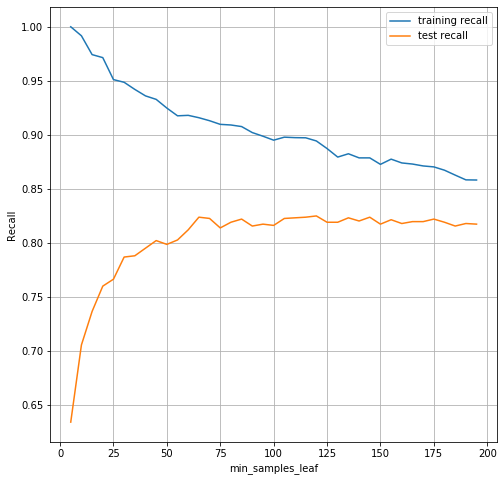

In [482]:
# plotting accuracies with min_samples_leaf
plt.figure(figsize = (8,8))
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training recall")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test recall")
plt.xlabel("min_samples_leaf")
plt.ylabel("Recall")
plt.legend()
plt.grid(True)
plt.show()

As seen from the above plot, accuracy of the model increases as min_samples_leaf increases. A steep increase from 0 to 115 and it kind of flattens rest of the way. 

`Tuning min_samples_split`

In [483]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(300,450,5)}

# instantiate the model
dtree = DecisionTreeClassifier(random_state = 100, class_weight='balanced')

# fit tree on training data
tree = GridSearchCV(dtree, parameters, return_train_score=True,
                    cv=n_folds, verbose=1,
                   scoring="recall",n_jobs=-1)
tree.fit(X_train, y_train)
print(tree.best_score_)
print(tree.best_params_)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   30.7s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  1.8min finished


0.8191936341342114
{'min_samples_split': 395}


In [484]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       3.163841      0.098032         0.029810        0.009930   
1       2.751732      0.220325         0.020605        0.001855   
2       2.532873      0.188710         0.023808        0.003545   
3       3.233259      0.321115         0.023208        0.003188   
4       2.452450      0.096146         0.020805        0.000748   

  param_min_samples_split                      params  split0_test_score  \
0                     300  {'min_samples_split': 300}           0.797654   
1                     305  {'min_samples_split': 305}           0.803519   
2                     310  {'min_samples_split': 310}           0.803519   
3                     315  {'min_samples_split': 315}           0.803519   
4                     320  {'min_samples_split': 320}           0.806452   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.856725           0.812865           0.780702           0.815789   
1           0.856725           0.812865           0.786550           0.815789   
2           0.862573           0.812865           0.786550           0.815789   
3           0.845029           0.812865           0.786550           0.815789   
4           0.845029           0.812865           0.792398           0.807018   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.812747        0.025290               24            0.871345   
1         0.815090        0.023183               13            0.872807   
2         0.816259        0.025305                7            0.872807   
3         0.812751        0.019094               23            0.872807   
4         0.812752        0.017485               18            0.872807   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.911485            0.910753            0.910753   
1            0.911485            0.910753            0.912217   
2            0.916606            0.910753            0.912217   
3            0.899049            0.910753            0.912217   
4            0.899049            0.911485            0.912217   

   split4_train_score  mean_train_score  std_train_score  
0            0.907827          0.902433         0.015595  
1            0.907827          0.903018         0.015179  
2            0.907827          0.904042         0.015872  
3            0.907827          0.900531         0.014595  
4            0.896123          0.898336         0.014302

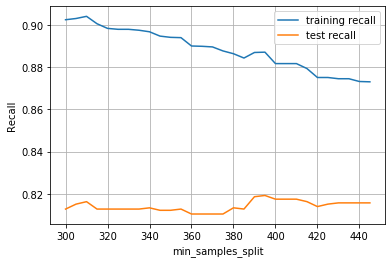

In [485]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training recall")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test recall")
plt.xlabel("min_samples_split")
plt.ylabel("Recall")
plt.legend()
plt.grid(True)
plt.show()


<a> The test accuracy of the model increases as the min_samples_split increases.

#### Grid Search to Find Optimal Hyperparameters

We can now use GridSearchCV to find multiple optimal hyperparameters together. Note that this time, we'll also specify the criterion (gini/entropy or IG).

In [486]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(3,10, 2),
    'min_samples_leaf': range(100, 125, 5),
    'min_samples_split': range(380,400,5),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier(random_state = 100, class_weight='balanced')
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train,y_train)


Fitting 5 folds for each of 160 candidates, totalling 800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   16.9s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 800 out of 800 | elapsed:  5.6min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=100,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'cri

In [487]:
print(grid_search.best_score_)
print(grid_search.best_params_)

0.8519523809523809
{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 100, 'min_samples_split': 380}


In [488]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0         1.653837      0.067340         0.021607    7.966123e-03   
1         1.483793      0.098695         0.021205    7.679996e-03   
2         1.557413      0.096043         0.024208    9.704837e-03   
3         1.494197      0.068967         0.033208    1.602049e-02   
4         1.685447      0.030318         0.022206    7.655843e-03   
5         1.514402      0.177030         0.026208    6.400850e-03   
6         1.221523      0.070779         0.022208    7.441202e-03   
7         1.320550      0.083281         0.017605    1.357633e-03   
8         1.197117      0.135012         0.019606    4.759728e-03   
9         1.456986      0.058956         0.018608    4.320191e-03   
10        1.231122      0.128007         0.017406    1.356699e-03   
11        1.116696      0.005818         0.017405    1.200692e-03   
12        1.122496      0.022944         0.018806    2.230649e-03   
13        1.183114      0.016097         0.017806    2.228114e-03   
14        1.141503      0.025598         0.019406    3.827506e-03   
15        1.117696      0.009266         0.020607    4.031433e-03   
16        1.178313      0.129839         0.019205    4.708723e-03   
17        1.527203      0.043256         0.031008    1.023995e-02   
18        1.356959      0.175167         0.019006    4.051506e-03   
19        1.124498      0.013707         0.020206    7.468106e-03   
20        2.054945      0.152533         0.017406    2.245622e-03   
21        1.772669      0.024702         0.017206    1.601452e-03   
22        1.898903      0.100800         0.022005    7.295808e-03   
23        2.068548      0.096067         0.016406    1.019518e-03   
24        1.773271      0.017921         0.016606    8.000380e-04   
25        1.788275      0.039963         0.024207    1.170444e-02   
26        1.959718      0.102825         0.016206    9.800382e-04   
27        2.481055      0.426033         0.021007    5.329432e-03   
28        2.454846      0.276577         0.018405    2.059209e-03   
29        1.797876      0.042395         0.023008    8.649898e-03   
30        1.788472      0.019714         0.016606    1.355496e-03   
31        1.751265      0.025192         0.017205    1.167645e-03   
32        1.763667      0.021431         0.016806    1.164921e-03   
33        1.742862      0.014267         0.017405    1.199540e-03   
34        1.759667      0.020891         0.016406    1.018309e-03   
35        1.745664      0.013794         0.016805    7.488149e-04   
36        1.749661      0.022698         0.016405    1.019778e-03   
37        1.753464      0.011612         0.017405    2.333071e-03   
38        1.897301      0.113198         0.017202    2.133033e-03   
39        1.814277      0.114810         0.017406    2.333950e-03   
40        2.355023      0.050790         0.016606    1.198793e-03   
41        2.255597      0.023763         0.015803    3.998286e-04   
42        2.287601      0.080427         0.016005    2.203793e-06   
43        2.862157      0.220329         0.020606    4.964219e-03   
44        2.788939      0.185383         0.021206    6.047733e-03   
45        2.872156      0.066016         0.023007    7.564424e-03   
46        2.711115      0.197596         0.025607    1.315753e-02   
47        3.081810      0.098320         0.022407    4.760113e-03   
48        2.766330      0.313768         0.017404    1.853782e-03   
49        2.281405      0.035682         0.016606    7.992390e-04   
50        1.862492      0.214053         0.013005    1.096106e-03   
51        1.563613      0.015201         0.012806    7.490301e-04   
52        1.713853      0.045141         0.013607    1.357950e-03   
53        1.599423      0.027736         0.012602    4.892464e-04   
54        1.581618      0.021845         0.013406    8.003260e-04   
55        1.727255      0.153350         0.013805    9.818476e-04   
56        1.937307      0.091533         0.016206    2.786418e-03   
57 

**Running the model with best parameters obtained from grid search.**

In [489]:
# model with optimal hyperparameters
clf_gini = DecisionTreeClassifier(criterion = "entropy", 
                                  random_state = 100,
                                  max_depth=grid_search.best_params_['max_depth'],
                                  min_samples_leaf=grid_search.best_params_['min_samples_leaf'],
                                  min_samples_split=grid_search.best_params_['min_samples_split'], class_weight='balanced')
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=5, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=100,
                       min_samples_split=380, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=100, splitter='best')

In [490]:
# accuracy score
clf_gini.score(X_train,y_train)

0.8254285714285714

<a>The accuracy of the Decision Tree model on the train dataset is around 82%, which is really good for a model to be classified as a good model.

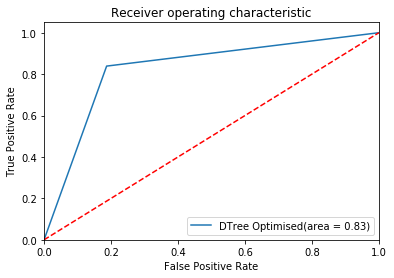

Area under curve is: 0.83
Recall for our model is: 0.84
Accuracy on test set is: 0.82
Confusion matrix for our model is: [[6724 1545]
 [ 118  614]]


In [491]:
# classification metrics

y_pred = clf_gini.predict(X_test)

logit_roc_auc = metrics.roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
plt.figure()
plt.plot(fpr, tpr, label='DTree Optimised(area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

print("Area under curve is:", round(metrics.roc_auc_score(y_test, y_pred),2))
print("Recall for our model is:" , round(metrics.recall_score(y_test, y_pred),2))
print("Accuracy on test set is:" , round(metrics.accuracy_score(y_test, y_pred),2))
print("Confusion matrix for our model is:" , metrics.confusion_matrix(y_test, y_pred))

In [492]:
# accuracy score on training set

y_train_pred = clf_gini.predict(X_train)
y_train_pred = y_train_pred.reshape(-1,1)
print("Accuracy on train set is:" , round(metrics.accuracy_score(y_test, y_pred),2))

Accuracy on train set is: 0.82


In [493]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.81      0.89      8269
           1       0.28      0.84      0.42       732

    accuracy                           0.82      9001
   macro avg       0.63      0.83      0.66      9001
weighted avg       0.93      0.82      0.85      9001



In [494]:
# confusion matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[6724 1545]
 [ 118  614]]


In [495]:
speci = round((cm[0,0]/(cm[0,0]+cm[0,1])),2)
sensi = round((cm[1,1]/(cm[1,0]+cm[1,1])),2)

print('The specificity is:',speci)
print('The sensitivity is:',sensi)

The specificity is: 0.81
The sensitivity is: 0.84


 **<a>INFERENCE**<br>
<a> 
 - The accuracy of the Decision Tree model on the TEST dataset is 83% and train set is 82% , which is pretty good.<br>
 - The RECALL score for both Churn and Non-Churns is around 80%.<br>
 - specificity obtained is : 81%
 - sensitivity obtained is: 84%

From the above metrics, we can conclude that the above is a decent one.

<hr>

### MODEL 2 -  Random Forest

In [496]:
high_rf = high_df.copy()

In [497]:
# Putting response variable to y
y = high_rf.pop('churn')

# Putting feature variables to X
X = high_rf

In [498]:
print("Size of Feature variables dataset is:",X.shape)
print("Size of response variable dataset is:",y.shape)

Size of Feature variables dataset is: (30001, 106)
Size of response variable dataset is: (30001,)


In [499]:
# splitting the data into train & test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.3, random_state=100, stratify = y)
X_train.head()

cust_id   arpu_6   arpu_7   arpu_8  roam_ic_mou_6  roam_ic_mou_7  \
81898    81899  271.831  199.033  393.619           0.00            0.0   
33489    33490  337.141  348.726  285.105          52.16            0.0   
21296    21297  569.597  837.682  668.214           0.00            0.0   
85765    85766  512.213  587.604  329.858           0.00            0.0   
51152    51153  285.673  161.771  176.107           0.00            0.0   

       roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
81898           0.00           0.00            0.0           0.00   
33489           0.00          45.79            0.0           0.00   
21296           0.00           0.00            0.0           0.00   
85765          34.04           0.00            0.0          31.44   
51152           0.00           0.00            0.0           0.00   

       loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
81898              2.09              2.03              3.63            110.28   
33489              6.04             40.09             83.24              6.99   
21296            279.24            314.94            298.78            431.99   
85765             58.76             80.03              8.66            319.78   
51152              7.73              3.13              4.04             26.33   

       loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
81898             41.83            107.13              0.00              7.23   
33489             41.51             70.38              0.00              1.35   
21296            351.38            473.18             16.23             22.06   
85765            170.66             88.61              0.00              0.00   
51152             28.13             30.34              0.00              0.00   

       loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
81898              4.51              0.00              4.36               0.0   
33489              2.03              0.00             10.19               0.0   
21296             13.81              0.00              0.00               0.0   
85765              0.90              0.00              0.00               0.0   
51152              0.00              8.88              0.31               0.0   

       std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  \
81898              0.00              0.00              0.00              0.00   
33489             87.28            244.01             61.04             29.13   
21296             21.11              8.26              1.58             36.71   
85765              0.48              0.00              4.51            469.78   
51152              0.00              0.00              0.00              0.00   

       std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  \
81898              0.00              1.13              1.11              0.00   
33489             64.48             61.96              0.00              0.00   
21296             28.79             67.08              0.00              2.08   
85765            716.39            322.56              6.83              6.68   
51152              0.00              0.00              0.00              0.00   

       std_og_t2f_mou_8  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  \
81898              2.68          0.00          4.36          0.00   
33489              0.00          1.36         22.36          1.19   
21296              0.00          0.50          0.00          0.00   
85765              5.93          0.00          0.00          6.25   
51152              0.00         10.04          1.89          0.00   

       loc_ic_t2t_mou_6  loc_ic_t2t_mou_7  loc_ic_t2t_mou_8  loc_ic_t2m_mou_6  \
81898              8.39              0.71             11.04            165.34   
33489             12.94             44.38             18.59             16.71   
21296            234.18            208.98       



#### Default Hyperparameters
Let's first fit a random forest model with default hyperparameters.

In [500]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters
rfc = RandomForestClassifier(class_weight = 'balanced',random_state=100,n_jobs = -1)

# fit
rfc.fit(X_train,y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=100, verbose=0,
                       warm_start=False)

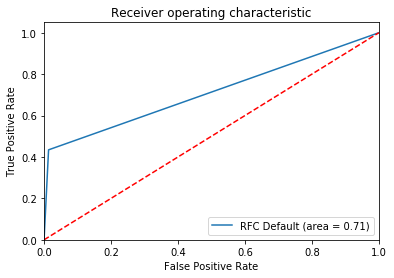

Area under curve is: 0.71
Recall for our model is: 0.43
Accuracy on test set is: 0.94
Confusion matrix for our model is: [[8158  111]
 [ 414  318]]


In [501]:
# Making Predictions
y_pred_default = rfc.predict(X_test)


logit_roc_auc = metrics.roc_auc_score(y_test, y_pred_default )
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_default )
plt.figure()
plt.plot(fpr, tpr, label='RFC Default (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

print("Area under curve is:", round(metrics.roc_auc_score(y_test, y_pred_default),2))
print("Recall for our model is:" , round(metrics.recall_score(y_test, y_pred_default),2))
print("Accuracy on test set is:" , round(metrics.accuracy_score(y_test, y_pred_default),2))
print("Confusion matrix for our model is:" , metrics.confusion_matrix(y_test, y_pred_default))

In [502]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

# Let's check the report of our default model
print(classification_report(y_test,y_pred_default))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      8269
           1       0.74      0.43      0.55       732

    accuracy                           0.94      9001
   macro avg       0.85      0.71      0.76      9001
weighted avg       0.93      0.94      0.93      9001



In [503]:
# Printing confusion matrix
cm = confusion_matrix(y_test,y_pred_default)
print(cm)

[[8158  111]
 [ 414  318]]


In [504]:
speci = round((cm[0,0]/(cm[0,0]+cm[0,1])),2)
sensi = round((cm[1,1]/(cm[1,0]+cm[1,1])),2)

print('The specificity is:',speci)
print('The sensitivity is:',sensi)

The specificity is: 0.99
The sensitivity is: 0.43


In [505]:
print(accuracy_score(y_test,y_pred_default))

0.9416731474280635


The model does not do good. let's now look at the list of hyperparameters which we can tune to improve model performance.

**Hyperparameter Tuning**

The results of default tree are poor, and we need to improve it by tuning the hyperparameters.

`Tuning max_depth`

In [506]:
# parameters to build the model on
parameters = {'max_depth': range(2, 15, 1)}

# number of folds
n_folds = 5

# instantiate the model
rf = RandomForestClassifier(class_weight = 'balanced',random_state=0)


# fit tree on training data
rf = GridSearchCV(rf, parameters, return_train_score=True,cv=n_folds, n_jobs=-1,
                   scoring="recall",verbose = 1)
rf.fit(X_train, y_train)
print(rf.best_score_)
print(rf.best_params_)

Fitting 5 folds for each of 13 candidates, totalling 65 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done  65 out of  65 | elapsed:  4.0min finished


0.7577335322666393
{'max_depth': 5}


In [507]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       5.565269      0.030258         0.119033        0.004245   
1       6.669568      0.534862         0.139037        0.013315   
2       8.100537      0.226857         0.183649        0.049579   
3      10.379936      0.492498         0.177247        0.024870   
4      14.106324      0.395678         0.266073        0.061059   

  param_max_depth            params  split0_test_score  split1_test_score  \
0               2  {'max_depth': 2}           0.665689           0.719298   
1               3  {'max_depth': 3}           0.703812           0.769006   
2               4  {'max_depth': 4}           0.706745           0.789474   
3               5  {'max_depth': 5}           0.724340           0.786550   
4               6  {'max_depth': 6}           0.736070           0.774854   

   split2_test_score  split3_test_score  split4_test_score  mean_test_score  \
0           0.695906           0.687135           0.733918         0.700389   
1           0.716374           0.713450           0.760234         0.732575   
2           0.736842           0.739766           0.786550         0.751875   
3           0.751462           0.736842           0.789474         0.757734   
4           0.730994           0.733918           0.783626         0.751892   

   std_test_score  rank_test_score  split0_train_score  split1_train_score  \
0        0.024007                6            0.711988            0.706657   
1        0.026637                4            0.745614            0.741039   
2        0.031703                3            0.780702            0.771763   
3        0.026187                1            0.807018            0.794440   
4        0.022558                2            0.818713            0.818581   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.717630            0.711046            0.707388   
1            0.752012            0.734455            0.747623   
2            0.785662            0.771763            0.775421   
3            0.811266            0.799561            0.805413   
4            0.826628            0.825165            0.828822   

   mean_train_score  std_train_score  
0          0.710942         0.003920  
1          0.744148         0.005995  
2          0.777062         0.005405  
3          0.803540         0.005898  
4          0.823582         0.004194

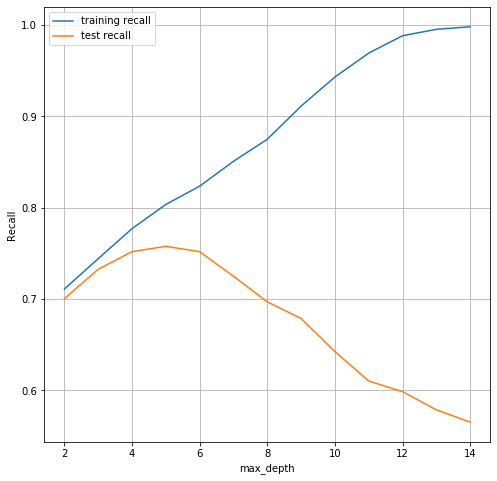

In [508]:
# plotting accuracies with max_depth
plt.figure(figsize=(8,8))
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training recall")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test recall")
plt.xlabel("max_depth")
plt.ylabel("Recall")
plt.grid(True)
plt.legend()
plt.show()


<a> We observe that with increase in the value of max_depth, both train and test scores increase till a point, but after that test score starts to decrease. The ensemble tries to overfit as we increase the max_depth. The model perfroms the best at max_depth = 5 and after that the increase in depth drops the accuracy on the test dataset.

`Tuning n_estimators`

Let's try to find the optimum values for n_estimators and understand how the value of n_estimators impacts the overall accuracy. We'll specify an appropriately low value of max_depth, so that the trees do not overfit.
<br>


In [509]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': [10,25,50,75,100]}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(random_state = 100,class_weight='balanced')


# fit tree on training data
rf = GridSearchCV(rf, parameters,cv=n_folds, verbose=1,scoring="recall",return_train_score = True, 
                  n_jobs=-1)
rf.fit(X_train, y_train)
print(rf.best_score_)
print(rf.best_params_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  1.3min finished


0.43767042239028653
{'n_estimators': 75}


In [510]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       2.018326      0.187467         0.049414        0.005537   
1       5.567063      0.348053         0.099427        0.022955   
2       9.846394      1.091440         0.180447        0.024831   
3      16.156472      0.968896         0.225459        0.027969   
4      19.392324      0.207789         0.318684        0.052548   

  param_n_estimators                 params  split0_test_score  \
0                 10   {'n_estimators': 10}           0.390029   
1                 25   {'n_estimators': 25}           0.419355   
2                 50   {'n_estimators': 50}           0.416422   
3                 75   {'n_estimators': 75}           0.416422   
4                100  {'n_estimators': 100}           0.401760   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.421053           0.371345           0.403509           0.429825   
1           0.450292           0.412281           0.423977           0.479532   
2           0.444444           0.412281           0.421053           0.456140   
3           0.459064           0.421053           0.435673           0.456140   
4           0.467836           0.412281           0.429825           0.461988   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.403152        0.021052                5            0.913743   
1         0.437087        0.024810                2            0.991228   
2         0.430068        0.017148                4            0.997076   
3         0.437670        0.017496                1            0.998538   
4         0.434738        0.026284                3            0.999269   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.922458            0.920995            0.912217   
1            0.986832            0.988296            0.983906   
2            0.995611            0.995611            0.995611   
3            0.998537            0.998537            0.998537   
4            0.998537            0.998537            0.999268   

   split4_train_score  mean_train_score  std_train_score  
0            0.913680          0.916618     4.231702e-03  
1            0.983175          0.986687     2.942690e-03  
2            0.991953          0.995172     1.706681e-03  
3            0.998537          0.998537     4.277947e-07  
4            0.999268          0.998976     3.584619e-04

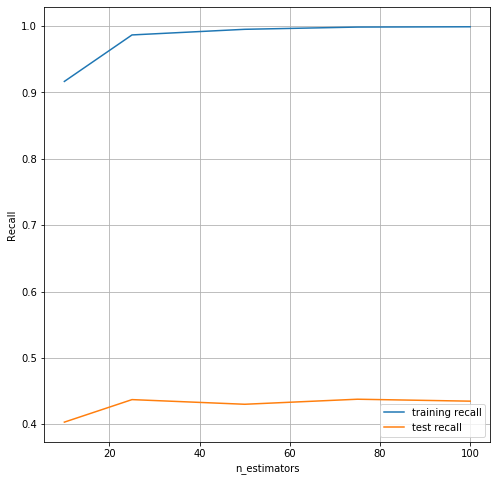

In [511]:
# plotting accuracies with n_estimators
plt.figure(figsize=(8,8))
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training recall")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test recall")
plt.xlabel("n_estimators")
plt.ylabel("Recall")
plt.legend()
plt.grid(True)
plt.show()


`Tuning min_samples_split`

Let's now look at the performance of the ensemble as we vary min_samples_split.

In [516]:
# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {"min_samples_split": range(100,200,10)}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(class_weight = 'balanced',random_state=0)

# fit tree on training data
rf = GridSearchCV(rf, parameters, n_jobs = -1,cv=n_folds, verbose = 1,
                   scoring="recall",return_train_score=True)
rf.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.9min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=0,
                             

In [517]:
print(rf.best_score_)
print(rf.best_params_)

0.7753039599584786
{'min_samples_split': 180}


In [518]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      10.318492      0.060880         0.386789        0.021257   
1      10.929356      0.481897         0.328768        0.054919   
2      10.988694      0.418213         0.282756        0.036274   
3      10.335465      0.094002         0.258413        0.003300   
4      11.126670      0.077286         0.418127        0.021931   

  param_min_samples_split                      params  split0_test_score  \
0                     100  {'min_samples_split': 100}           0.713533   
1                     110  {'min_samples_split': 110}           0.738137   
2                     120  {'min_samples_split': 120}           0.738137   
3                     130  {'min_samples_split': 130}           0.755712   
4                     140  {'min_samples_split': 140}           0.750439   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.722807           0.754386         0.730242        0.017487   
1           0.735088           0.766667         0.746630        0.014222   
2           0.736842           0.773684         0.749554        0.017070   
3           0.735088           0.771930         0.754243        0.015077   
4           0.740351           0.785965         0.758918        0.019563   

   rank_test_score  split0_train_score  split1_train_score  \
0               10            0.881579            0.879719   
1                9            0.879825            0.873573   
2                8            0.861404            0.870061   
3                7            0.868421            0.867428   
4                5            0.861404            0.867428   

   split2_train_score  mean_train_score  std_train_score  
0            0.873573          0.878290         0.003421  
1            0.873573          0.875657         0.002947  
2            0.872695          0.868053         0.004824  
3            0.868306          0.868051         0.000444  
4            0.866550          0.865127         0.002657

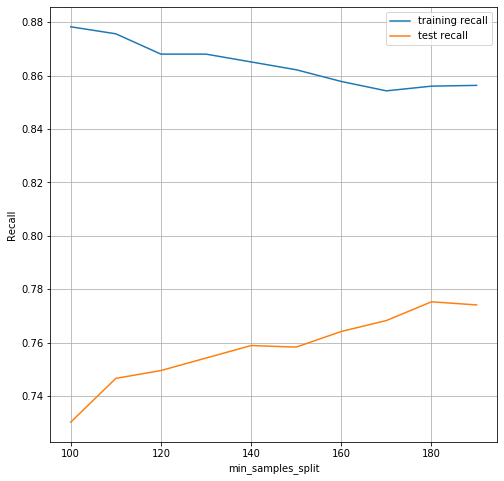

In [519]:
# plotting accuracies with min_samples_split
plt.figure(figsize=(8,8))
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training recall")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test recall")
plt.xlabel("min_samples_split")
plt.ylabel("Recall")
plt.legend()
plt.grid(True)
plt.show()

`Tuning min_samples_leaf`

In [520]:
# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {"min_samples_leaf": range(1,200,20)}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(class_weight = 'balanced',random_state=0)

# fit tree on training data
rf = GridSearchCV(rf, parameters, n_jobs = -1,cv=n_folds, verbose = 1,
                   scoring="recall",return_train_score=True)
rf.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.8min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=0,
                             

In [521]:
print(rf.best_score_)
print(rf.best_params_)

0.7922753574034677
{'min_samples_leaf': 181}


In [522]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      17.631953      0.164583         0.563504        0.006022   
1      17.320525      1.446232         0.448802        0.014435   
2      15.941778      1.561038         0.450804        0.022374   
3      13.111931      0.181956         0.435467        0.030693   
4      11.897235      0.072394         0.345771        0.032366   

  param_min_samples_leaf                    params  split0_test_score  \
0                      1   {'min_samples_leaf': 1}           0.439367   
1                     21  {'min_samples_leaf': 21}           0.710018   
2                     41  {'min_samples_leaf': 41}           0.764499   
3                     61  {'min_samples_leaf': 61}           0.773286   
4                     81  {'min_samples_leaf': 81}           0.787346   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.415789           0.461404         0.438853        0.018625   
1           0.707018           0.759649         0.725561        0.024135   
2           0.735088           0.784211         0.761266        0.020184   
3           0.757895           0.800000         0.777060        0.017395   
4           0.749123           0.794737         0.777069        0.019990   

   rank_test_score  split0_train_score  split1_train_score  \
0               10            1.000000            1.000000   
1                9            0.893860            0.884987   
2                8            0.863158            0.856014   
3                7            0.846491            0.845478   
4                6            0.840351            0.840211   

   split2_train_score  mean_train_score  std_train_score  
0            1.000000          1.000000         0.000000  
1            0.894644          0.891164         0.004379  
2            0.861282          0.860151         0.003024  
3            0.846356          0.846109         0.000449  
4            0.838455          0.839672         0.000863

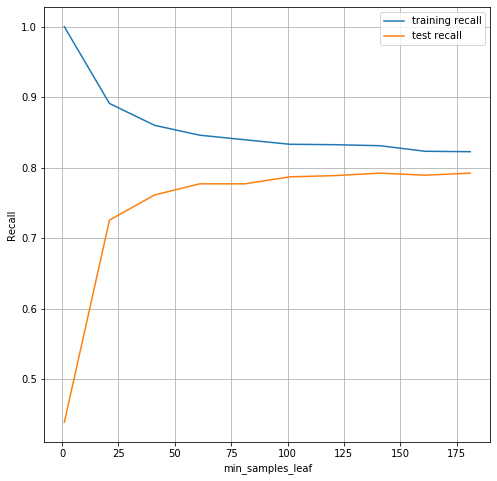

In [523]:
# plotting accuracies with min_samples_split
plt.figure(figsize=(8,8))
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training recall")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test recall")
plt.xlabel("min_samples_leaf")
plt.ylabel("Recall")
plt.legend()
plt.grid(True)
plt.show()

As seen from the above plot, recall of the model increases as min_samples_leaf increases. A steep increase is observed from 0 to 25. The curve flattens after min_samples_leaf = 125. So let us choose this as our Optimal minimum number of samples leaf.

`Tuning max_features`

Let's see how the model performance varies with `max_features`, which is the maximum number of features considered for splitting at a node.

In [524]:
# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'max_features': [25,50,75]}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=4, class_weight = 'balanced',random_state=100)

# fit tree on training data
rf = GridSearchCV(rf, parameters, n_jobs  = -1,cv=n_folds, verbose = 1,
                   scoring="recall",return_train_score=True)
rf.fit(X_train, y_train)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:   60.0s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=4,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=100,
                              

In [525]:
print(rf.best_score_)
print(rf.best_params_)

0.7975374875384125
{'max_features': 75}


In [526]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      11.811214      0.030303         0.205729        0.003775   
1      21.429092      0.116126         0.193063        0.010616   
2      28.047373      2.137758         0.139708        0.010213   

  param_max_features                params  split0_test_score  \
0                 25  {'max_features': 25}           0.759227   
1                 50  {'max_features': 50}           0.780316   
2                 75  {'max_features': 75}           0.789104   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.757895           0.810526         0.775883        0.024503   
1           0.782456           0.826316         0.796363        0.021198   
2           0.777193           0.826316         0.797537        0.020922   

   rank_test_score  split0_train_score  split1_train_score  \
0                3            0.793860            0.810360   
1                2            0.802632            0.842845   
2                1            0.814912            0.838455   

   split2_train_score  mean_train_score  std_train_score  
0            0.823529          0.809250         0.012138  
1            0.850746          0.832074         0.021067  
2            0.858648          0.837338         0.017872

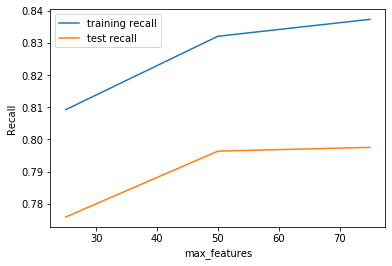

In [527]:
# plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training recall")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test recall")
plt.xlabel("max_features")
plt.ylabel("Recall")
plt.legend()
plt.show()


Apparently, the training and test scores *both* seem to increase as we increase max_features, and the model doesn't seem to overfit more with increasing max_features.

#### **Grid Search to Find Optimal Hyperparameters**

We can now find the optimal hyperparameters using GridSearchCV.

In [528]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [8,8,10],
    'min_samples_split': [170,190,200], 'min_samples_leaf': [120,130,140] }

# Create a based model
rf = RandomForestClassifier(class_weight = 'balanced',random_state=100)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1,return_train_score=True)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)
print(grid_search.best_score_)
print(grid_search.best_params_)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:  4.0min finished


0.8882857142857142
{'max_depth': 8, 'min_samples_leaf': 120, 'min_samples_split': 170}


In [529]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.8882857142857142 using {'max_depth': 8, 'min_samples_leaf': 120, 'min_samples_split': 170}


**Fitting the final model with the best parameters obtained from grid search.**

In [532]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,random_state=100,
                             max_depth=grid_search.best_params_['max_depth'],
                             min_samples_split=grid_search.best_params_['min_samples_split'],
                              class_weight='balanced')

In [533]:
# fit
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=170,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=100,
                       verbose=0, warm_start=False)

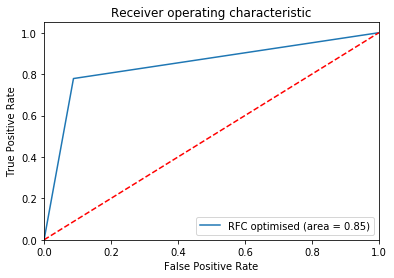

Area under curve is: 0.85
Recall for our model is: 0.78
Accuracy on test set is: 0.9
Confusion matrix for our model is: [[7543  726]
 [ 162  570]]


In [534]:
# predict
predictions = rfc.predict(X_test)

# Plotting ROC
logit_roc_auc = metrics.roc_auc_score(y_test, predictions)
fpr, tpr, thresholds = metrics.roc_curve(y_test, predictions)
plt.figure()
plt.plot(fpr, tpr, label='RFC optimised (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

print("Area under curve is:", round(metrics.roc_auc_score(y_test, predictions),2))
print("Recall for our model is:" , round(metrics.recall_score(y_test, predictions),2))
print("Accuracy on test set is:" , round(metrics.accuracy_score(y_test, predictions),2))
print("Confusion matrix for our model is:" , metrics.confusion_matrix(y_test, predictions))

In [535]:
# accuracy score on training set

y_train_pred = rfc.predict(X_train)
y_train_pred = y_train_pred.reshape(-1,1)
print("Accuracy on train set is:" , round(metrics.accuracy_score(y_test, y_pred),2))

Accuracy on train set is: 0.82


In [536]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      0.91      0.94      8269
           1       0.44      0.78      0.56       732

    accuracy                           0.90      9001
   macro avg       0.71      0.85      0.75      9001
weighted avg       0.94      0.90      0.91      9001



In [537]:
# confusion matrix
cm = confusion_matrix(y_test,predictions)
print(cm)

[[7543  726]
 [ 162  570]]


In [538]:
speci = cm[0,0]/(cm[0,0]+cm[0,1])
sensi = cm[1,1]/(cm[1,0]+cm[1,1])

print('The specificity is:',speci)
print('The sensitivity is:',sensi)

The specificity is: 0.9122022009916556
The sensitivity is: 0.7786885245901639


 **<a>INFERENCE**<br>
<a> 
 - The accuracy of the Random Forest Tree model on the TEST dataset is 85% % training dataset is 82%, which is pretty good for a model.<br>
 - The RECALL score for Churn is 78% and Non-Churns is around 91%.<br>
 - specificity obtained is : 91%
 - sensitivity obtained is: 78%

From the above metrics, we can conclude that the above model performs well.

--------------------------

## 3) MODEL SUMMARY

In our case study we have chosen `Recall` as the Performace measure because it is more important to predict the customers who are more likely to churn rather than accuracy.

In [540]:
model_stats = pd.DataFrame(
    {'model':['DTree - Default Param','DTree - Tuned Param','RFC - Default Param','RFC - Tuned Param'],
                      
    'Recall':       [0.48,0.84,0.43,0.78],
    'Test accuracy':     [0.92,0.82,0.94,0.85],
    'Roc_auc_score':[0.71,0.83,0.71,0.85],
    })

model_stats.sort_values(by=['Recall','Test accuracy','Roc_auc_score'],ascending=False)

model  Recall  Test accuracy  Roc_auc_score
1    DTree - Tuned Param    0.84           0.82           0.83
3      RFC - Tuned Param    0.78           0.85           0.85
0  DTree - Default Param    0.48           0.92           0.71
2    RFC - Default Param    0.43           0.94           0.71

<a> `Decision tree with tuned hyperparameters` outperforms all the other models in terms of `recall` and has a pretty `decent accuracy and AUC score`. Let us choose this model to find out the most important features affecting churn.

In [541]:
features = clf_gini.feature_importances_
cols = X.iloc[:,sorted(range(len(features)), key=lambda i: features[i])[-10:]].columns
cols


Index(['arpu_7', 'max_rech_amt_6', 'std_og_t2m_mou_8', 'loc_og_t2m_mou_8',
       'max_rech_data_8', 'last_day_rch_amt_8', 'total_data_rech_8',
       'total_amt_8', 'roam_og_mou_8', 'loc_ic_t2m_mou_8'],
      dtype='object')

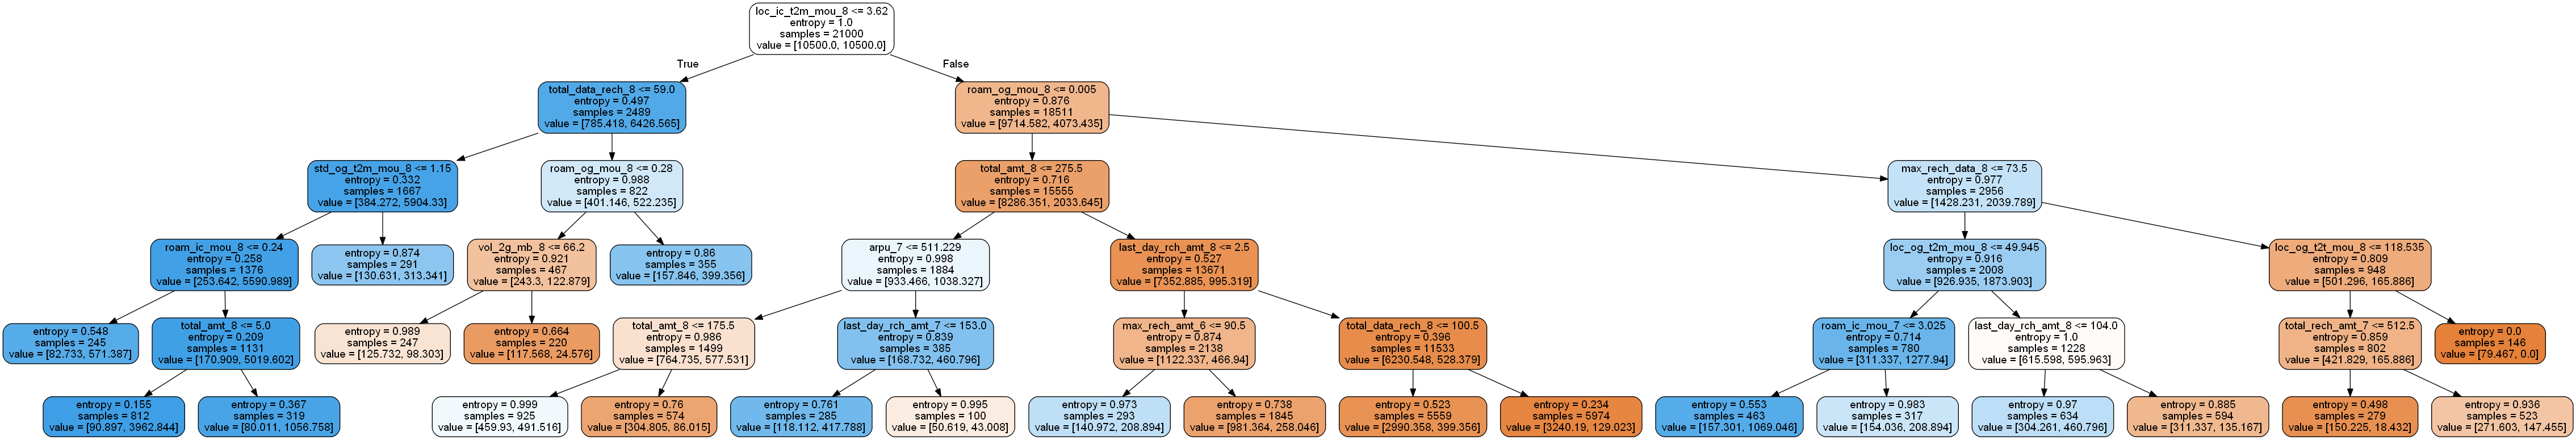

In [542]:
# plotting the tree
dot_data = StringIO()  
features = X.columns
export_graphviz(clf_gini, out_file=dot_data,
                feature_names=features, filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())

-----------------------------

# 4) **Strategies to be incorporated:**<br>
    
1. In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. <br>
2. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.<br>
3. In order to manage High Value Customer Churn, we have predicted customers that are more likely to churn and the factors that influence the high churn.<br>
4. From the exploratory analysis, we observed that there is considerable drop in recharge, call usage and data usage in the 8th month which is the  `Action Phase`. From the list of important predictors affecting the churn, this is again evident as follows:<br>
  - 'arpu_7', 
  - 'max_rech_amt_6', 
  - 'std_og_t2m_mou_8', 
  - 'loc_og_t2m_mou_8',
  - 'max_rech_data_8', 
  - 'last_day_rch_amt_8', 
  - 'total_data_rech_8',
  - 'total_amt_8', 
  - 'roam_og_mou_8', 
  - 'loc_ic_t2m_mou_8'
  <br>
  
5. Average revenue per user in the `7th month` plays a vital role in deciding churn. A sudden drop in it might indicate that the customer might be thinking about churning and appropriate actions should be taken.<br>
6. Local & STD Minutes of usage (incoming & outgoing) are the most affecting features on the customer churn.<br>
7. Lastday of recharge amount in the action phase also plays a crucial role in determing churn.
8. The maximum rcharge for calling data by a client in the 6th Month and 8th Month should be carefully focussed as the 6th month indicates the begining of the good phase and 8th month indicates the action phase.<br>
9. Last day of recharge in the 8th month, the total recharge for data done in the 8th month and the total amount spent on calls and data by clients in 8th month also play crucial role in indicating churn.
10. Outgoing roaming calls made by clients in the 8th month also play key role in indicating churn.

Following strategies can be incorporated :<br>

 - Sudden drop in Local & STD Minutes of usage might be because of the unsatisfactory customer service or because of poor network or unsuitable customer schemes/plans. Efforts shall be made to provide better network and focus on customer satisfaction.
 - Customised plans should be provided to such customers to stop them from churning.
 - Based on the usage / last recharge, routine feedback calls to understand the customer satisfaction regarding services can be made to understand their grievances & expectations. Appropriate action should be taken to avoid them rom churning.
 - Various attractive offers can be introduced to customers showing sudden drop in total amount spent on calls & data recharge in the action phase  to lure them.
 - Promotional offers can also be very helpful